In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import math
from sklearn.linear_model import LinearRegression

In [172]:
dados = pd.read_csv('dados.csv',sep=';')

date
2020-02-13    0.0
2020-02-14    1.0
2020-02-15    0.0
2020-02-16    0.0
2020-02-17    0.0
Name: new_cases, dtype: float64

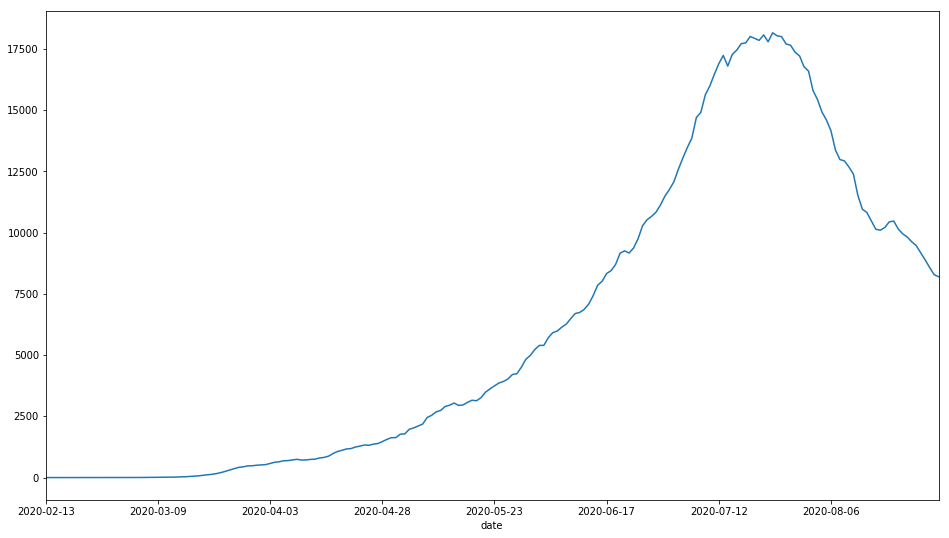

In [25]:
mundo = pd.read_csv('mundo.csv',sep=',')
italia = mundo[mundo['location']=='Africa']
italia = italia.set_index('date')

mItalia = italia['new_cases'].rolling(7).mean()
mItalia[:6] = italia['new_cases'].values[:6]
fig = plt.figure(figsize=(16,9))
mItalia[:200].plot()
mItalia.head()

In [60]:
dados.head(35)

regiao estado municipio  coduf  codmun  codRegiaoSaude nomeRegiaoSaude  \
0   Brasil    NaN       NaN     76     NaN             NaN             NaN   
1   Brasil    NaN       NaN     76     NaN             NaN             NaN   
2   Brasil    NaN       NaN     76     NaN             NaN             NaN   
3   Brasil    NaN       NaN     76     NaN             NaN             NaN   
4   Brasil    NaN       NaN     76     NaN             NaN             NaN   
5   Brasil    NaN       NaN     76     NaN             NaN             NaN   
6   Brasil    NaN       NaN     76     NaN             NaN             NaN   
7   Brasil    NaN       NaN     76     NaN             NaN             NaN   
8   Brasil    NaN       NaN     76     NaN             NaN             NaN   
9   Brasil    NaN       NaN     76     NaN             NaN             NaN   
10  Brasil    NaN       NaN     76     NaN             NaN             NaN   
11  Brasil    NaN       NaN     76     NaN             NaN             NaN   
12  Brasil    NaN       NaN     76     NaN             NaN             NaN   
13  Brasil    NaN       NaN     76     NaN             NaN             NaN   
14  Brasil    NaN       NaN     76     NaN             NaN             NaN   
15  Brasil    NaN       NaN     76     NaN             NaN             NaN   
16  Brasil    NaN       NaN     76     NaN             NaN             NaN   
17  Brasil    NaN       NaN     76     NaN             NaN             NaN   
18  Brasil    NaN       NaN     76     NaN             NaN             NaN   
19  Brasil    NaN       NaN     76     NaN             NaN             NaN   
20  Brasil    NaN       NaN     76     NaN             NaN             NaN   
21  Brasil    NaN       NaN     76     NaN             NaN             NaN   
22  Brasil    NaN       NaN     76     NaN             NaN             NaN   
23  Brasil    NaN       NaN     76     NaN             NaN             NaN   
24  Brasil    NaN       NaN     76     NaN             NaN             NaN   
25  Brasil    NaN       NaN     76     NaN             NaN             NaN   
26  Brasil    NaN       NaN     76     NaN             NaN             NaN   
27  Brasil    NaN       NaN     76     NaN             NaN             NaN   
28  Brasil    NaN       NaN     76     NaN             NaN             NaN   
29  Brasil    NaN       NaN     76     NaN             NaN             NaN   
30  Brasil    NaN       NaN     76     NaN             NaN             NaN   
31  Brasil    NaN       NaN     76     NaN             NaN             NaN   
32  Brasil    NaN       NaN     76     NaN             NaN             NaN   
33  Brasil    NaN       NaN     76     NaN             NaN             NaN   
34  Brasil    NaN       NaN     76     NaN             NaN             NaN   

          data  semanaEpi  populacaoTCU2019  casosAcumulado  casosNovos  \
0   2020-02-25          9       210147125.0               0           0   
1   2020-02-26          9       210147125.0               1           1   
2   2020-02-27          9       210147125.0               1           0   
3   2020-02-28          9       210147125.0               1           0   
4   2020-02-29          9       210147125.0               2           1   
5   2020-03-01         10       210147125.0               2           0   
6   2020-03-02         10       210147125.0               2           0   
7   2020-03-03         10       210147125.0               2           0   
8   2020-03-04         10       210147125.0               3           1   
9   2020-03-05         10       210147125.0               7           4   
10  2020-03-06         10       210147125.0              13           6   
11  2020-03-07         10       210147125.0              19           6   
12  2020-03-08         11       210147125.0              25           6   
13  2020-03-09         11       210147125.0              25           0   
14  2020-03-10         11       210147125.0              34           

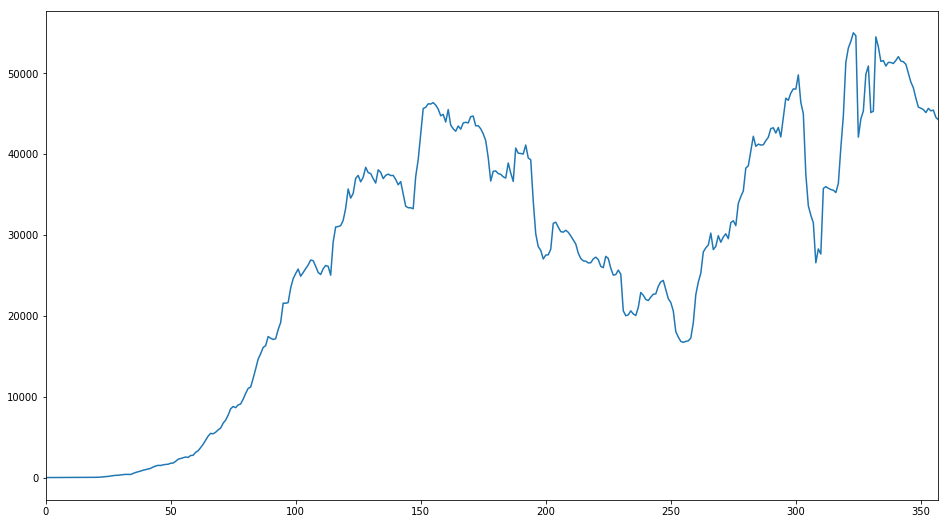

In [173]:
brasil = dados[dados['regiao'] == 'Brasil']
media = brasil['casosNovos'].rolling(7).mean()
media[:6] = brasil['casosNovos'].values[:6]
fig = plt.figure(figsize=(16,9))
media.plot()

In [174]:
dataX = dados['data']
x = ar(range(len(media)))
y = ar(media.values)

1483.2351648351648 1740.7630392521057 6118.428571428572
[9.32298317e+04 1.56667944e+02 3.99380477e+01]


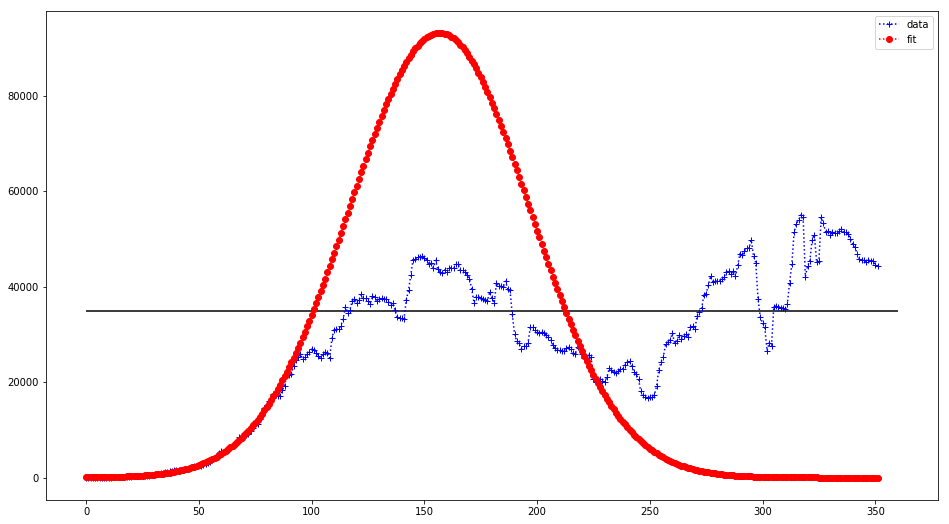

In [119]:
treinoX = x[:65]
treinoY = y[:65]


n = len(treinoX)
mean = treinoY.mean()
sigma = treinoY.std()

print(mean, sigma,max(treinoY))

def gauss(x, A, x0, sigma):
    #print(H,A,x0,sigma)
    return  A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def linear(x, a, b):
    return  a *x + b

def exponencial(x, a, b, c, d):
    return  a*np.cos(b*x)+c + d * x

tau = 0.045
def fourier(x, *a):
    ret = a[0] * np.cos(np.pi / tau * x)
    for deg in range(1, len(a)):
        ret += a[deg] * np.cos((deg+1) * np.pi / tau * x)
    return ret


#popt,pcov = curve_fit(fourier,treinoX,treinoY, [1.0] * 50)
popt,pcov = curve_fit(gauss,treinoX,treinoY,[1, 1, 10])

print(popt)

fig = plt.figure(figsize=(16,9))
plt.plot(x,y,'b+:',label='data')
plt.hlines(35000,0,360)
plt.plot(x,gauss(x,*popt),'ro:',label='fit')
plt.legend()

plt.show()

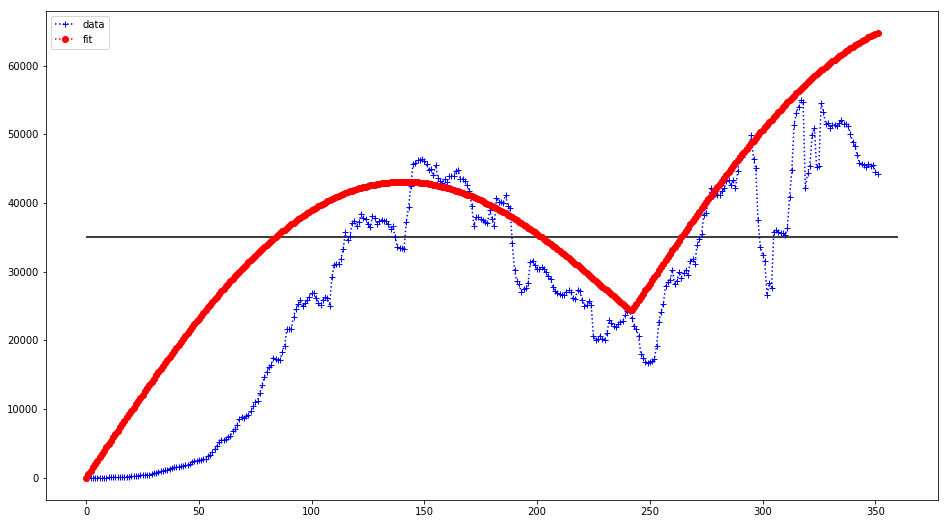

In [46]:
a = 30000 
b = 0.013
c = 0
d = 100
def funcao(x):
    return  a*np.abs(np.sin(b*x))+c + d*x

fig = plt.figure(figsize=(16,9))
plt.plot(x,y,'b+:',label='data')
plt.hlines(35000,0,360)
plt.plot(x,funcao(x),'ro:',label='fit')
plt.legend()

plt.show()

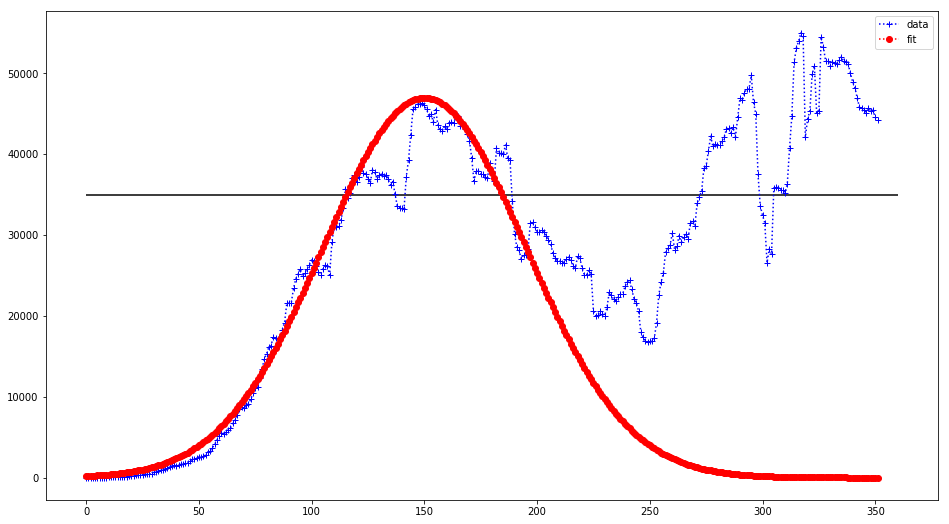

In [111]:
a = 47000 
b = 150
c = 45

def funcao(x):
    return  a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

fig = plt.figure(figsize=(16,9))
plt.plot(x,y,'b+:',label='data')
plt.hlines(35000,0,360)
plt.plot(x,funcao(x),'ro:',label='fit')
plt.legend()

plt.show()


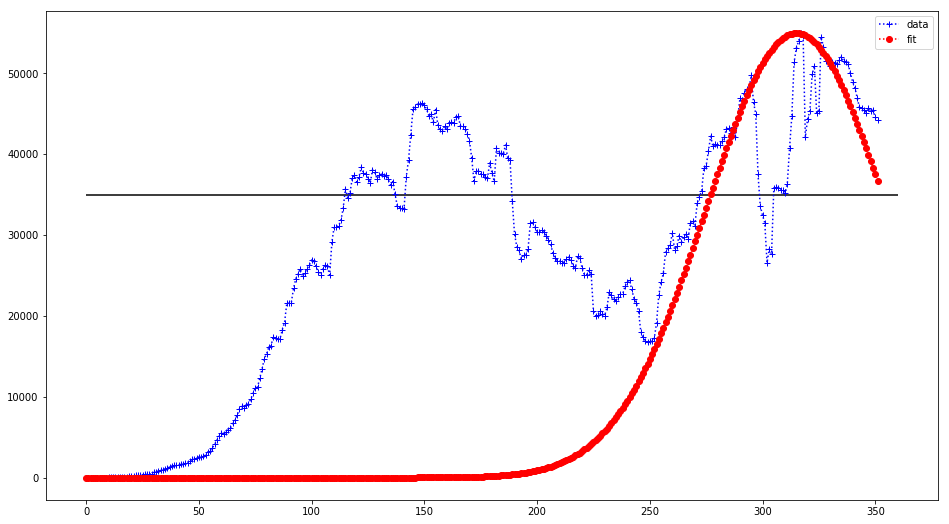

In [76]:
a = 55000 
b = 315
c = 40

def funcao(x):
    return  a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

fig = plt.figure(figsize=(16,9))
plt.plot(x,y,'b+:',label='data')
plt.hlines(35000,0,360)
plt.plot(x,funcao(x),'ro:',label='fit')
plt.legend()

plt.show()


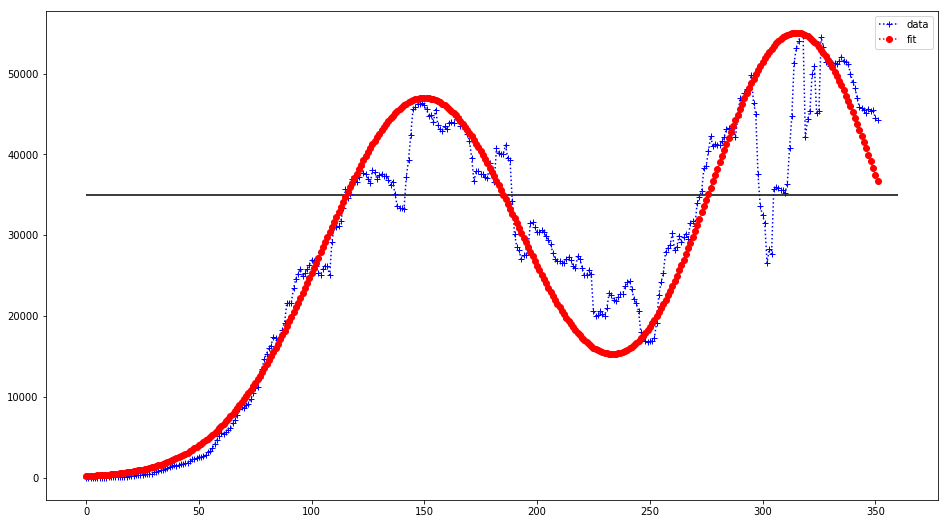

In [112]:
a = 55000 
b = 315
c = 40

a1 = 47000 
b1 = 150
c1 = 45

def funcao(x):
    return  a1 * np.exp(-(x - b1) ** 2 / (2 * c1 ** 2)) + a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

fig = plt.figure(figsize=(16,9))
plt.plot(x,y,'b+:',label='data')
plt.hlines(35000,0,360)
plt.plot(x,funcao(x),'ro:',label='fit')
plt.legend()

plt.show()


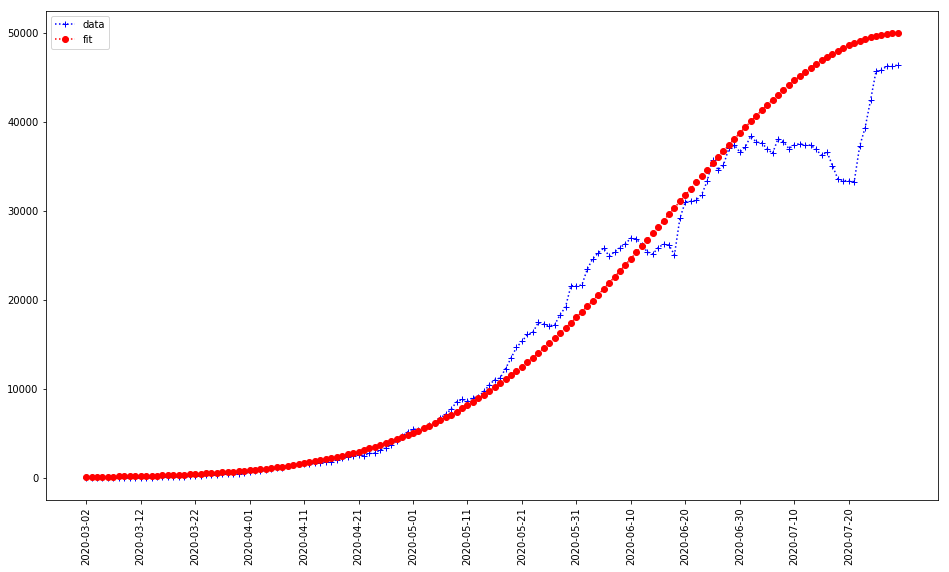

In [201]:
fim = 150
eixoX = dataX[:fim]
treinoX = x[:fim]
treinoY = y[:fim]

a = 50000 
b = 150
c = 42

def funcao(x):
    return  a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

idx = range(0,fim,10)


fig = plt.figure(figsize=(16,9))
plt.plot(eixoX,treinoY,'b+:',label='data')
plt.plot(eixoX,funcao(treinoX),'ro:',label='fit')
plt.xticks(eixoX[idx], eixoX[idx], rotation='vertical')

plt.legend()

plt.show()


[43402.19897625   151.95904489    47.85152715]


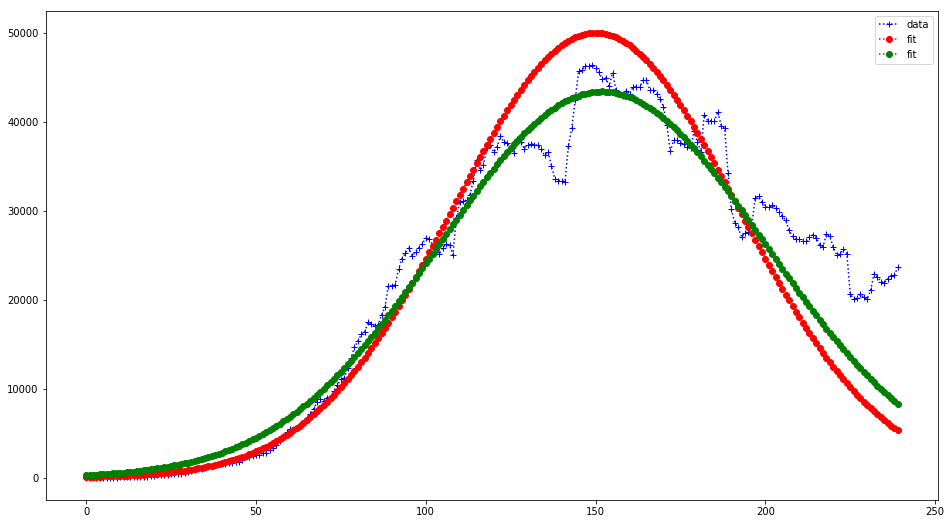

In [9]:
fim=180
treinoX = x[:fim]
treinoY = y[:fim]

plotX = x[:240]
plotY = y[:240]

a = 50000 
b = 150
c = 42

def funcao(x):
    return  a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

def gauss(x,a,b,c):
    return  a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

popt,pcov = curve_fit(gauss,treinoX,treinoY,[1, 1, 10])
print(popt)
fig = plt.figure(figsize=(16,9))
plt.plot(plotX,plotY,'b+:',label='data')
plt.plot(plotX,funcao(plotX),'ro:',label='fit')
plt.plot(plotX,gauss(plotX,*popt),'go:',label='fit')
plt.legend()

plt.show()


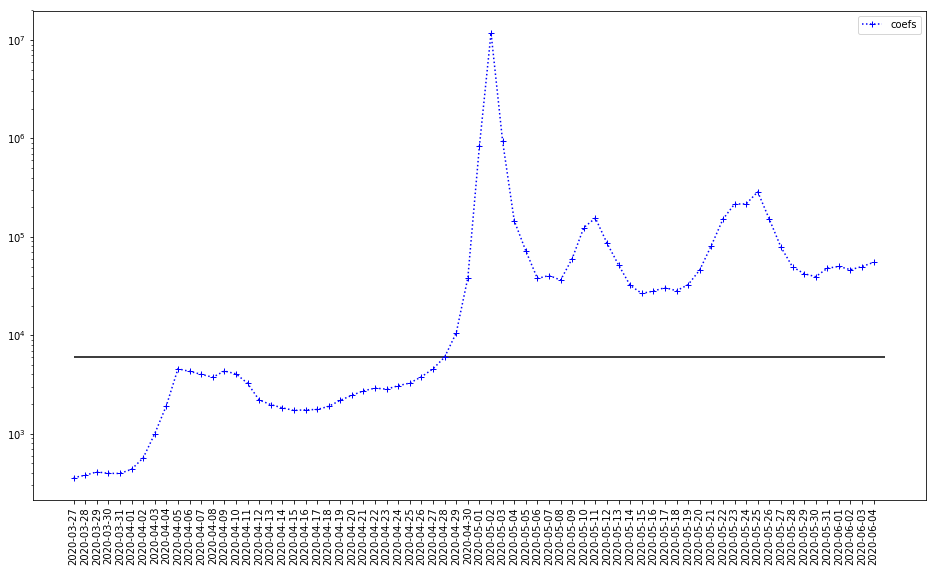

In [180]:
inicio = 30
fim=100

def gauss(x,a,b,c):
    return  a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

coefs = []
difs = []

for f in range(inicio,fim):
    treinoX = x[:f]
    treinoY = y[:f]
    popt,pcov = curve_fit(gauss,treinoX,treinoY,[1, 1, 10], maxfev=5000)
    coefs.append(popt[0])
    #print(f,popt)
    if(len(difs) > 0):
        difs.append(abs(popt[0]-coefs[-2]))
    else:
        difs.append(popt[0])
#print(coefs)
fig = plt.figure(figsize=(16,9))
plt.plot(dataX[inicio:fim],coefs,'b+:',label='coefs')
plt.yscale('log')
idx = range(inicio,fim,10)
plt.xticks(dataX[inicio:fim], dataX[inicio:fim], rotation='vertical')
plt.hlines(6000,0,fim-inicio)
plt.legend()

plt.show()

[143.96893544]


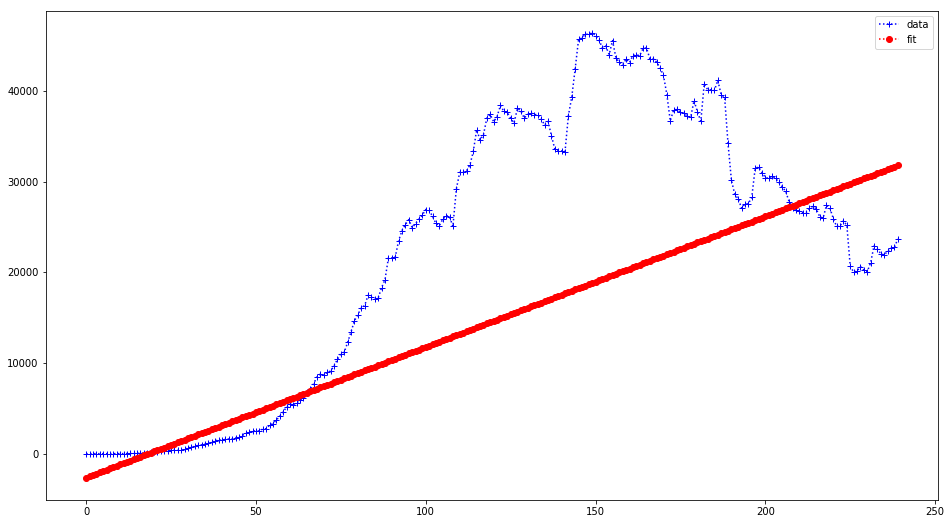

In [36]:
fim=80
treinoX = x[:fim].reshape((-1, 1))
treinoY = y[:fim]

plotX = x[:240]
plotY = y[:240]

model = LinearRegression()
model.fit(treinoX, treinoY)
print(model.coef_)
y_pred = model.predict(plotX.reshape((-1, 1)))
fig = plt.figure(figsize=(16,9))
plt.plot(plotX,plotY,'b+:',label='data')
plt.plot(plotX,y_pred,'ro:',label='fit')
plt.legend()

plt.show()


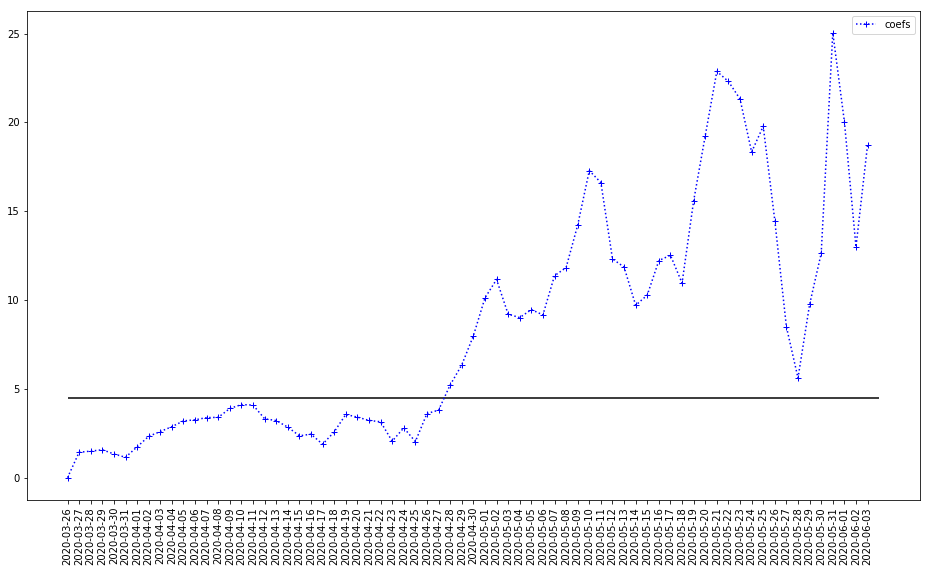

In [130]:
inicio = 30
fim=100

coefs = []
difs = []

for f in range(inicio,fim):
    treinoX = x[f-30:f].reshape(-1,1)
    treinoY = y[f-30:f]
    model = LinearRegression()
    model.fit(treinoX, treinoY)
    coefs.append(model.coef_[0])
    if(len(difs) > 0):
        difs.append(abs(model.coef_[0]-coefs[-2]))
    else:
        difs.append(0)

fig = plt.figure(figsize=(16,9))
plt.plot(dataX[inicio:fim],difs,'b+:',label='coefs')
#plt.yscale('log')
idx = range(inicio,fim,10)
plt.xticks(dataX[inicio:fim], dataX[inicio:fim], rotation='vertical')
plt.hlines(4.5,0,fim-inicio)
plt.legend()

plt.show()

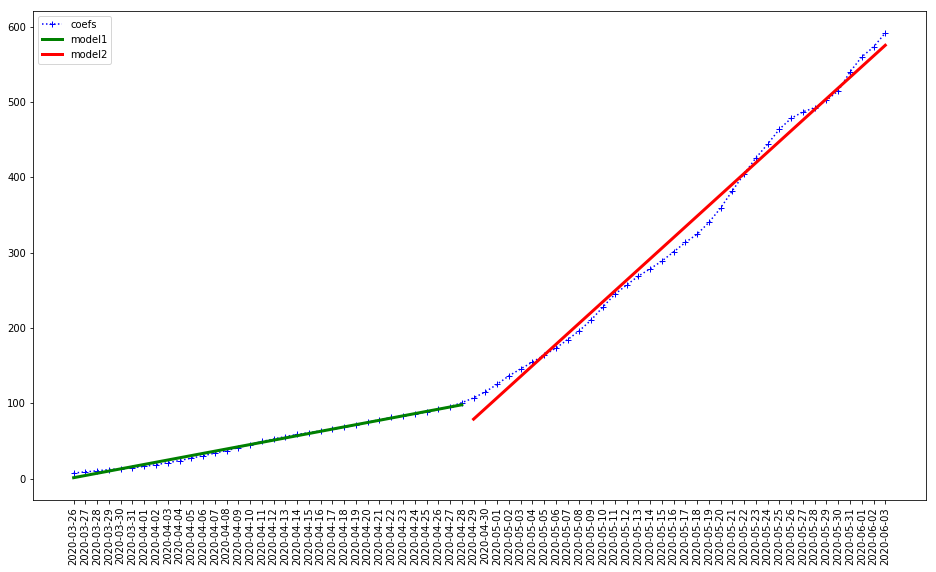

In [132]:
inicio = 30
fim=100

regre = 34

coefs = []

for f in range(inicio,fim):
    treinoX = x[f-30:f].reshape(-1,1)
    treinoY = y[f-30:f]
    model = LinearRegression()
    model.fit(treinoX, treinoY)
    coefs.append(model.coef_[0])

model1 = LinearRegression()
model1.fit(x[:regre].reshape(-1,1), coefs[:regre])
y_pred1 = model1.predict(x[:regre].reshape(-1, 1))


model2 = LinearRegression()
model2.fit(x[regre:len(coefs)].reshape(-1,1), coefs[regre:])
y_pred2 = model2.predict(x[regre:len(coefs)].reshape(-1, 1))

fig = plt.figure(figsize=(16,9))
plt.plot(dataX[inicio:fim],coefs,'b+:',label='coefs')

plt.plot(dataX[inicio:inicio+regre],y_pred1,color='green',label='model1',linewidth=3)
plt.plot(dataX[inicio+regre:inicio+regre+len(coefs[regre:])],y_pred2,color='red',label='model2',linewidth=3)

idx = range(inicio,fim,10)
plt.xticks(dataX[inicio:fim], dataX[inicio:fim], rotation='vertical')

#plt.hlines(4.5,0,fim-inicio)
plt.legend()

plt.show()

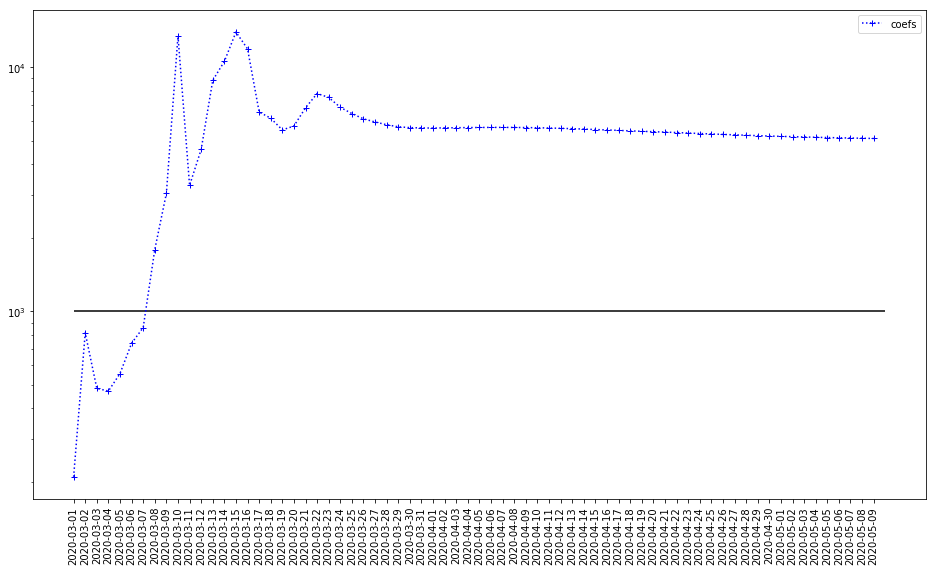

In [163]:
inicio = 30
fim=100

dataItaliaX = italia['date']
xItalia = ar(range(len(mItalia)))
yItalia = ar(mItalia.values)

def gauss(x,a,b,c):
    return  a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

coefs = []
difs = []

for f in range(inicio,fim):
    treinoX = xItalia[:f]
    treinoY = yItalia[:f]
    popt,pcov = curve_fit(gauss,treinoX,treinoY,[1, 1, 10])
    coefs.append(popt[0])
    #print(f,popt)
    if(len(difs) > 0):
        difs.append(abs(popt[0]-coefs[-2]))
    else:
        difs.append(popt[0])
#print(coefs)
fig = plt.figure(figsize=(16,9))
plt.plot(dataItaliaX[inicio:fim],coefs,'b+:',label='coefs')
plt.yscale('log')
idx = range(inicio,fim,10)
plt.xticks(dataItaliaX[inicio:fim], dataItaliaX[inicio:fim], rotation='vertical')
plt.hlines(1000,0,fim-inicio)
plt.legend()

plt.show()

Afghanistan
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Africa
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Albania
[0, 10, 20, 30, 40, 50, 60, 70, 80]
Algeria
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Andorra
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Angola
[0, 10, 20, 30, 40]
Anguilla
[]


/home/raphael/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Antigua and Barbuda
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Argentina
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Armenia
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
Asia
[0, 10, 20, 30, 40, 50, 60, 70, 80]
Australia
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Austria
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Azerbaijan
[0, 10, 20, 30, 40, 50, 60, 70, 80]
Bahamas
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Bahrain
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
Bangladesh
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Barbados
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Belarus
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Belgium
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Belize


/home/raphael/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[0, 10, 20, 30, 40, 50, 60, 70, 80]
Benin
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Bermuda
[0]


/home/raphael/.local/lib/python3.6/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


Bhutan
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Bolivia
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Bosnia and Herzegovina
[0, 10, 20, 30, 40, 50, 60, 70, 80]
Botswana
[0, 10, 20, 30, 40, 50, 60, 70, 80]
Brazil
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Brunei
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Bulgaria
[0, 10, 20, 30, 40, 50, 60]
Burkina Faso
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Burundi
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
Cambodia
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Cameroon
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Canada
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Cape Verde
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Cayman Islands
[0, 10]
Central African Republic
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Chad
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Chile
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
China
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Colombia
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Comoros
[

Suriname
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Sweden
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Switzerland
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Syria
[0, 10, 20, 30, 40, 50]
Taiwan
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Tajikistan
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Tanzania
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Thailand
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Timor
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Togo
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Trinidad and Tobago
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Tunisia
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Turkey
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
Turks and Caicos Islands
[]
Uganda
[0, 10, 20, 30, 40, 50, 60, 70, 80]
Ukraine
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
United Arab Emirates
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
United Kingdom
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
United Sta

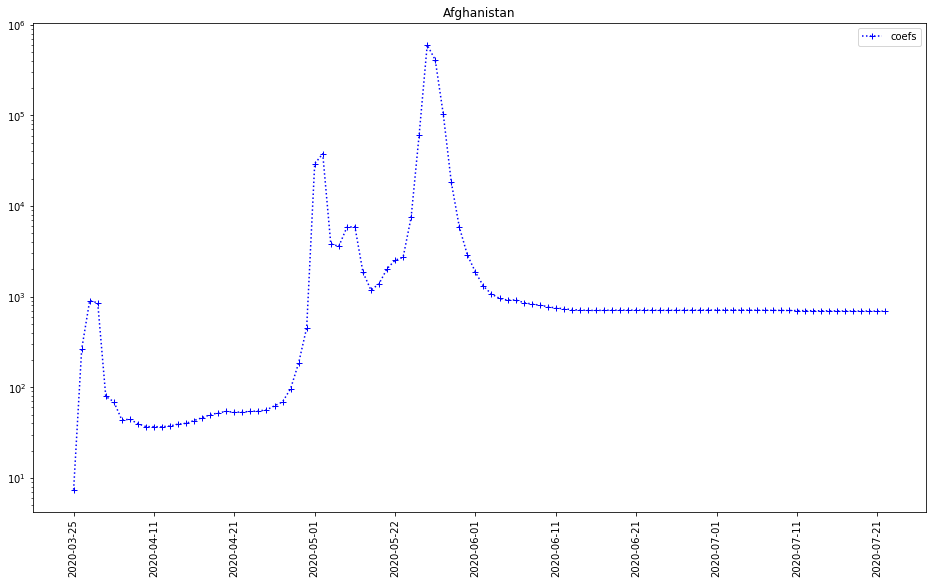

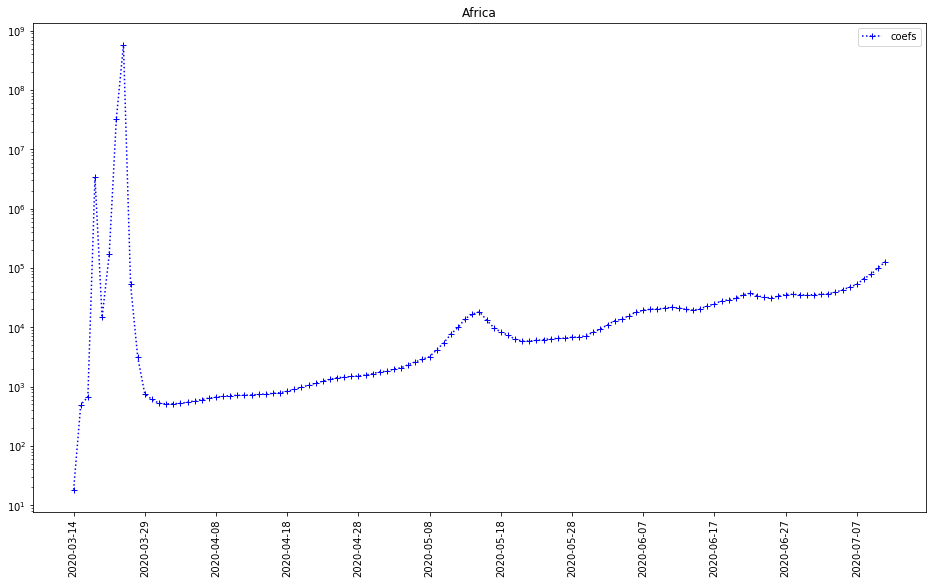

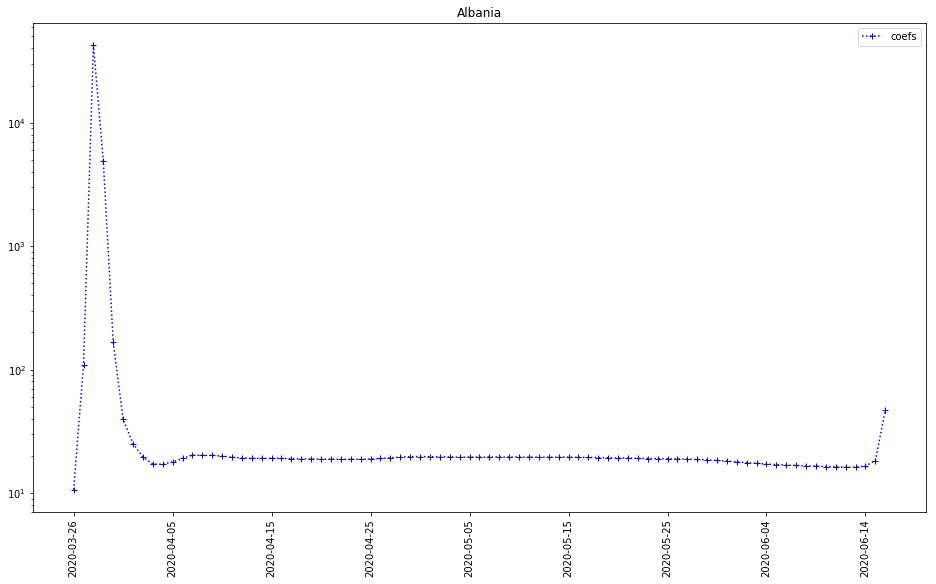

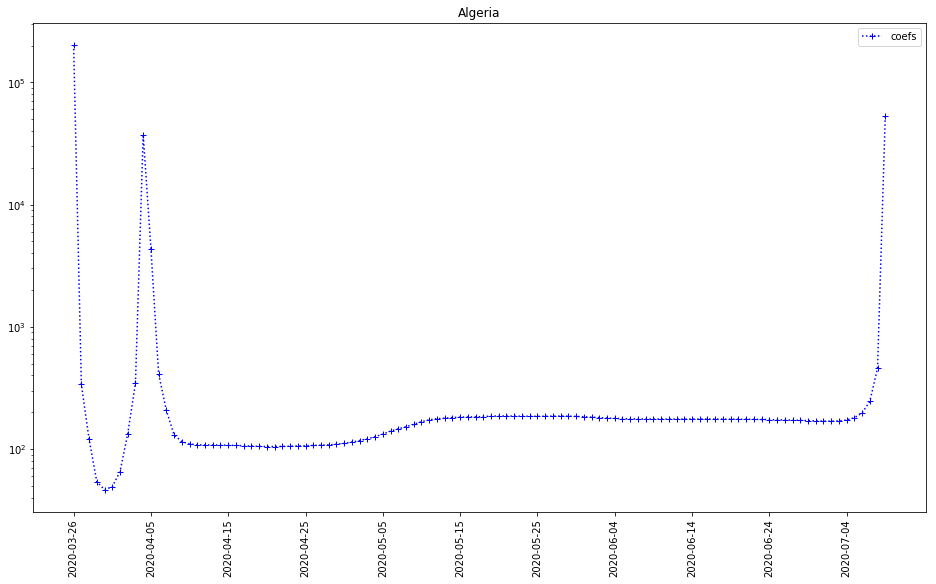

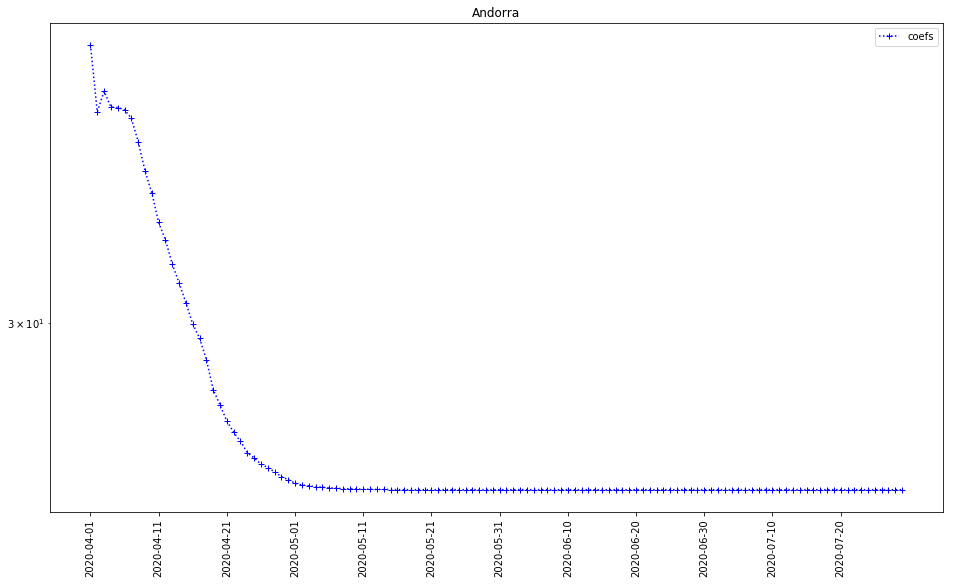

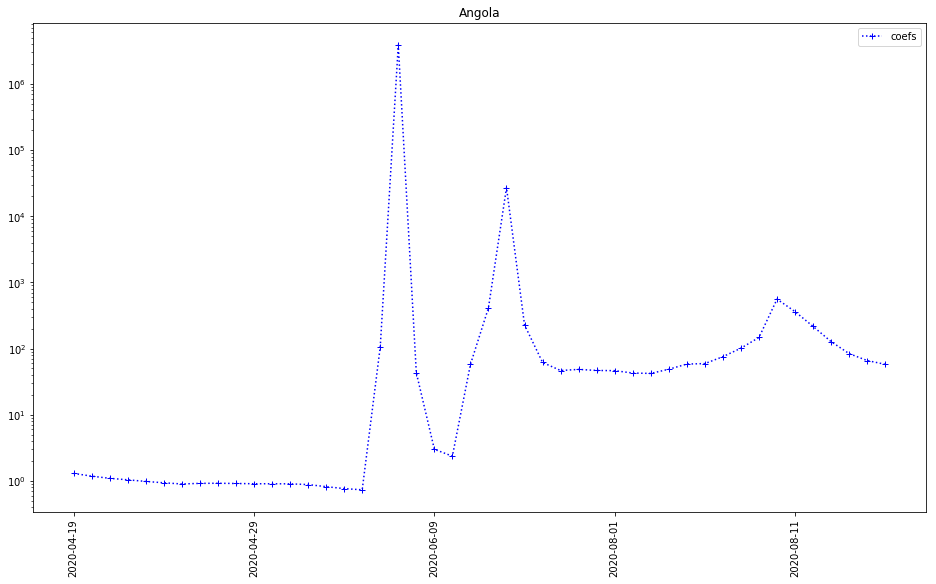

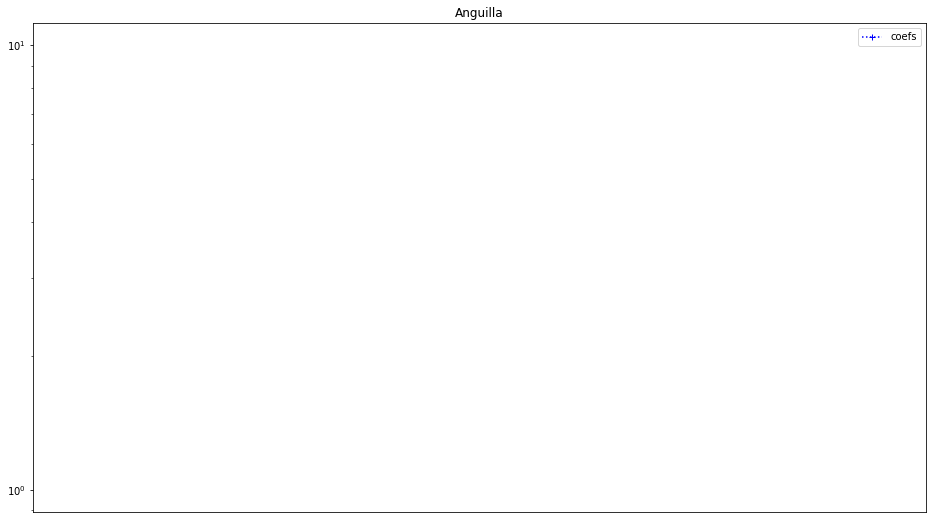

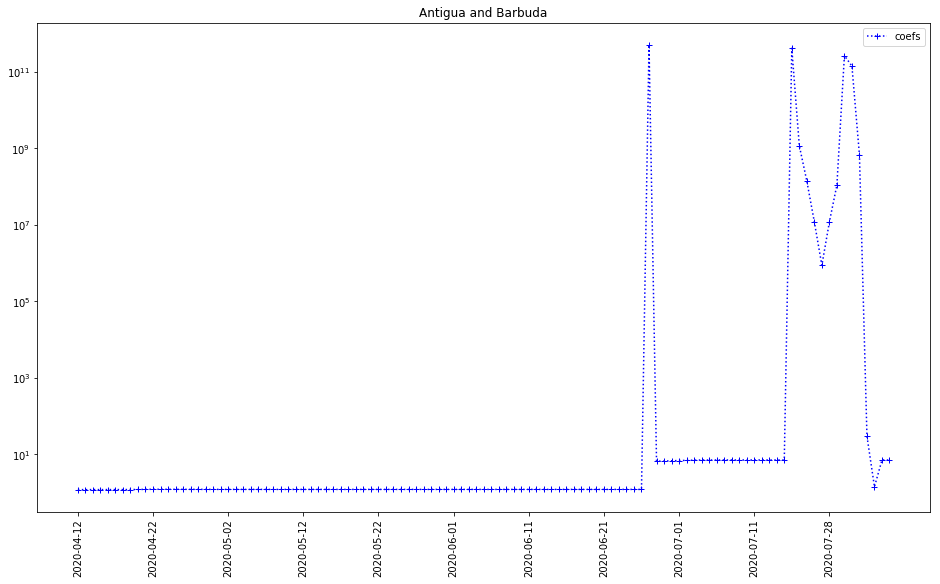

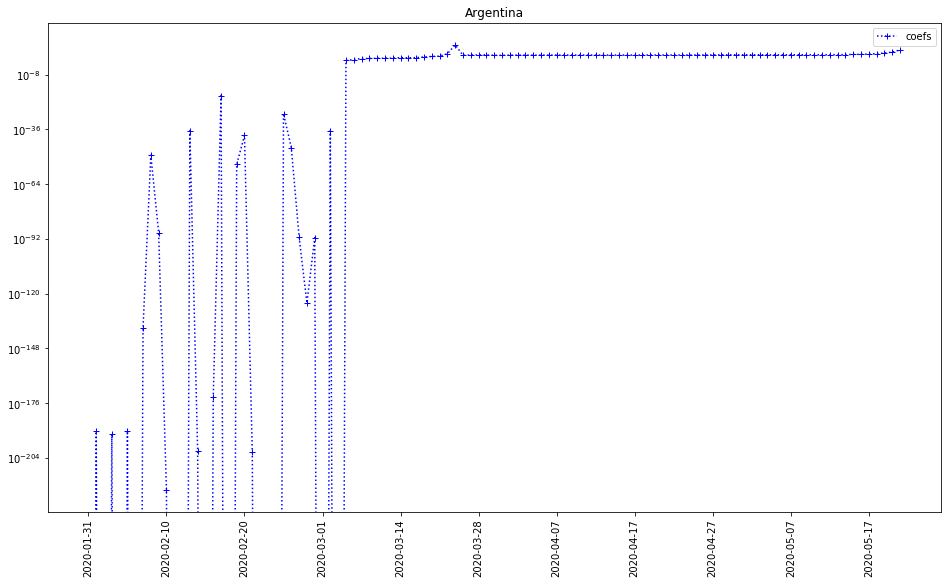

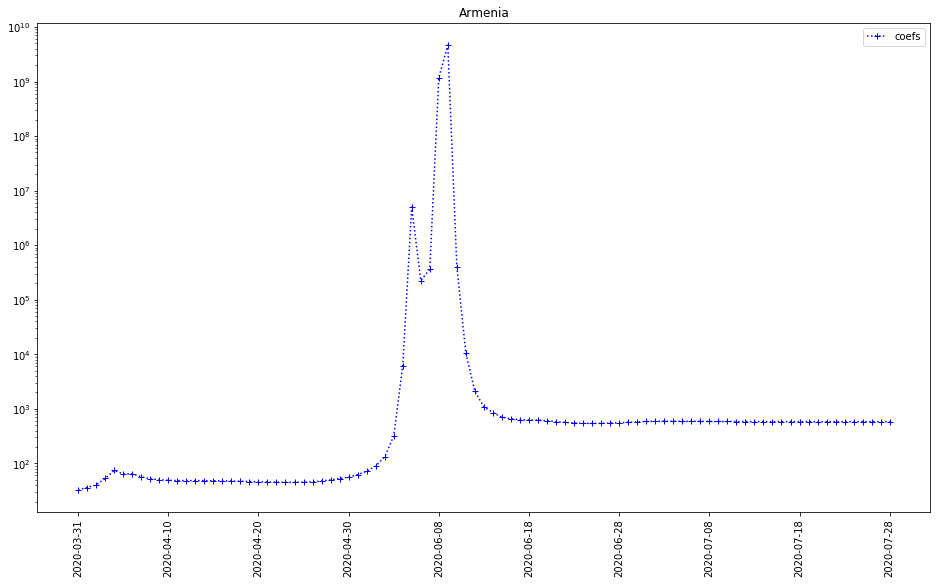

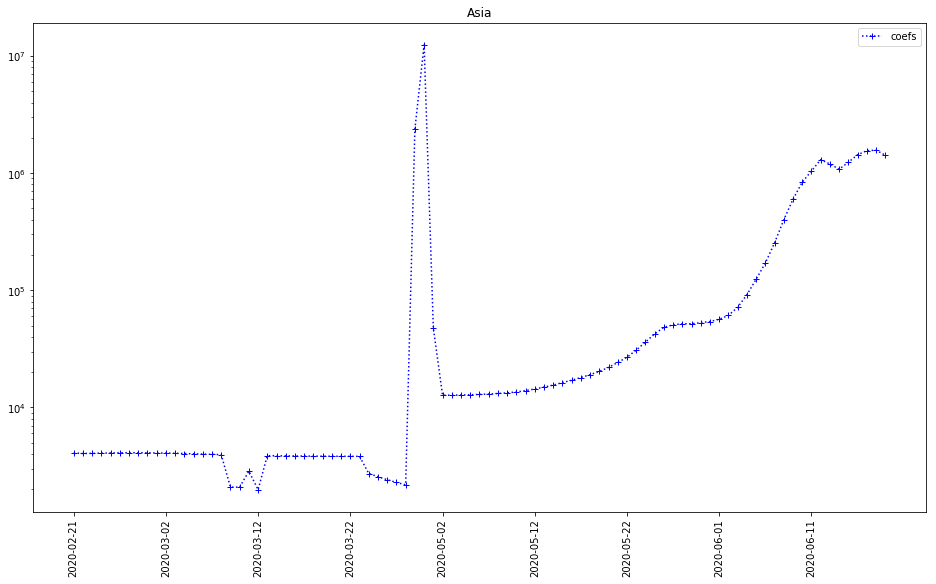

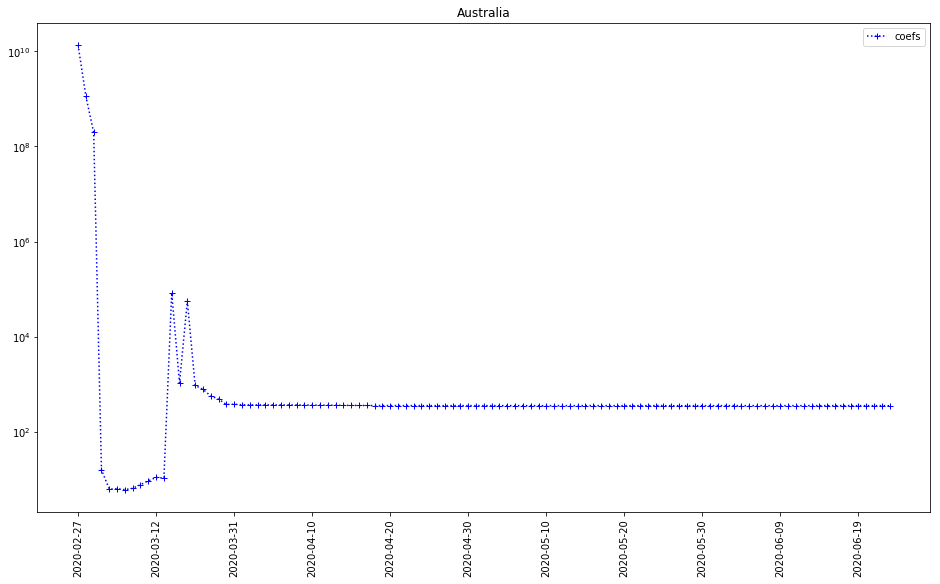

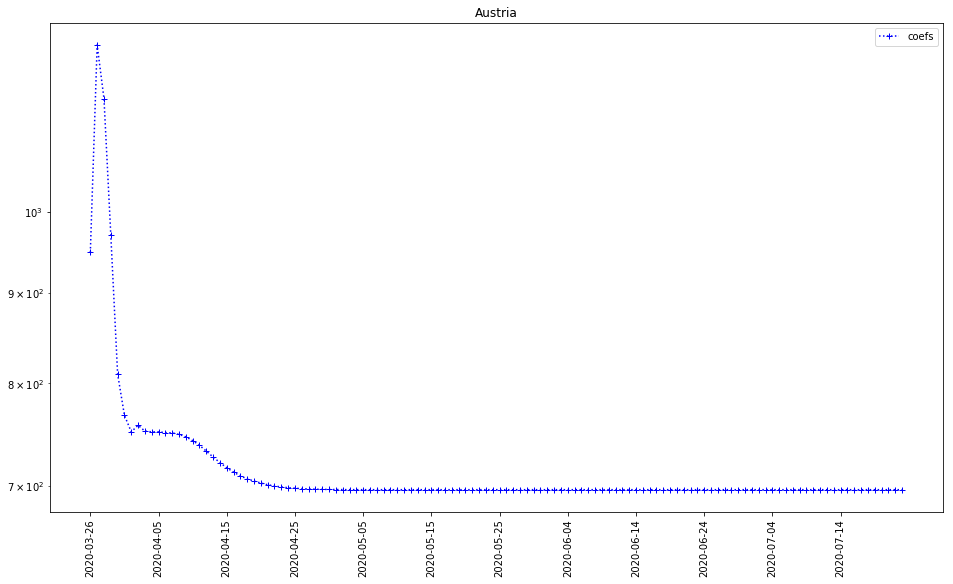

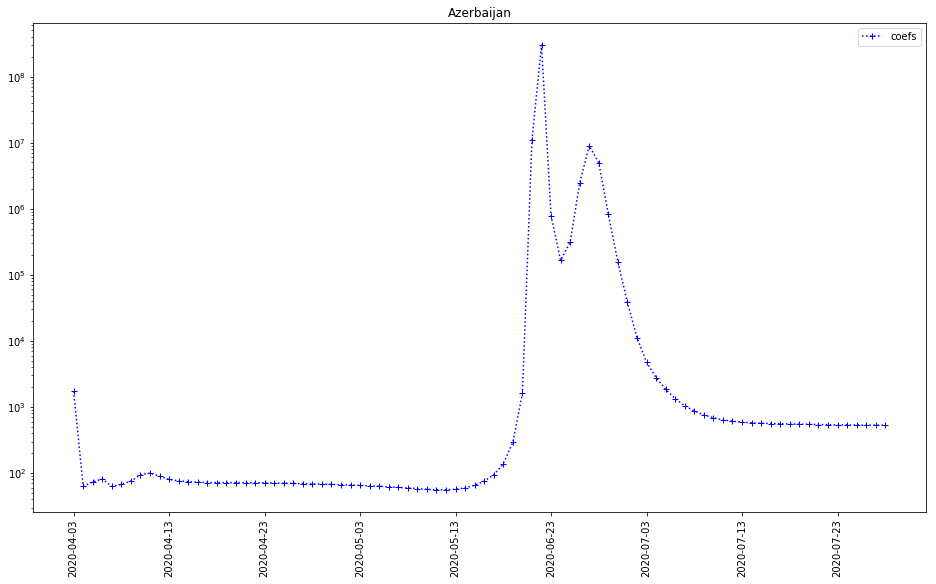

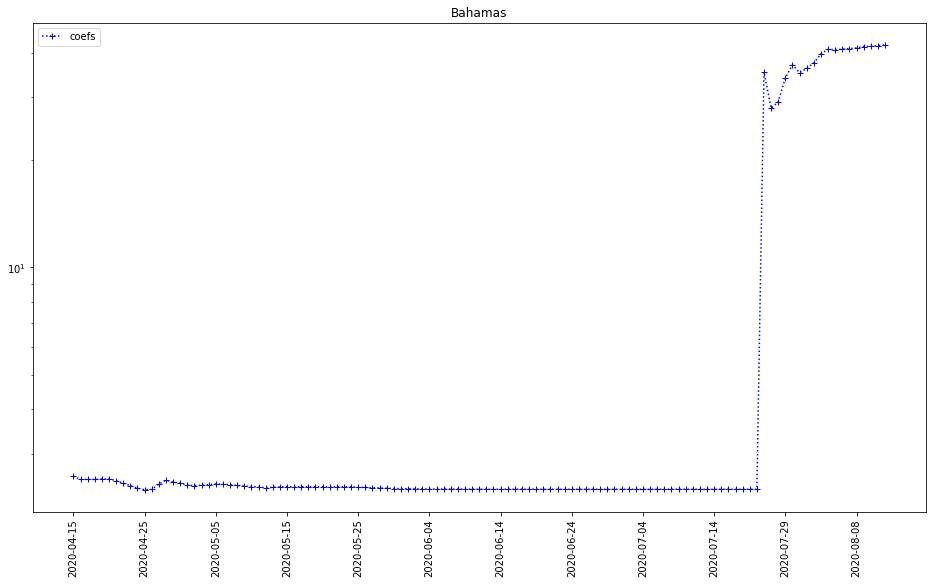

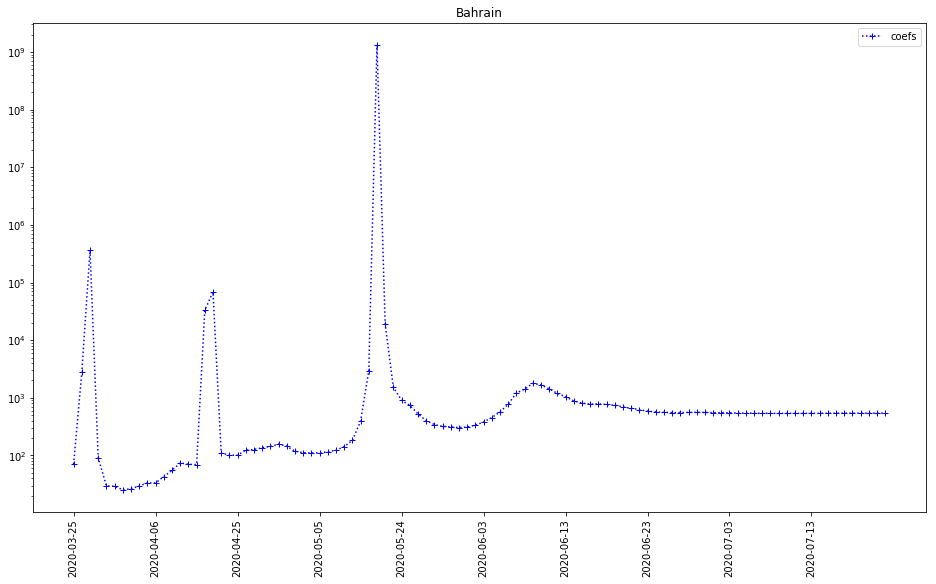

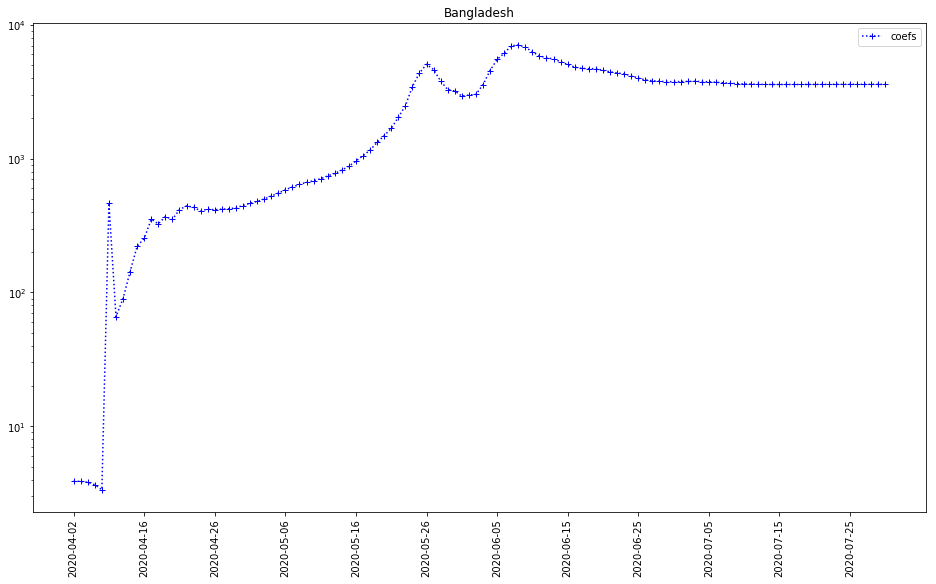

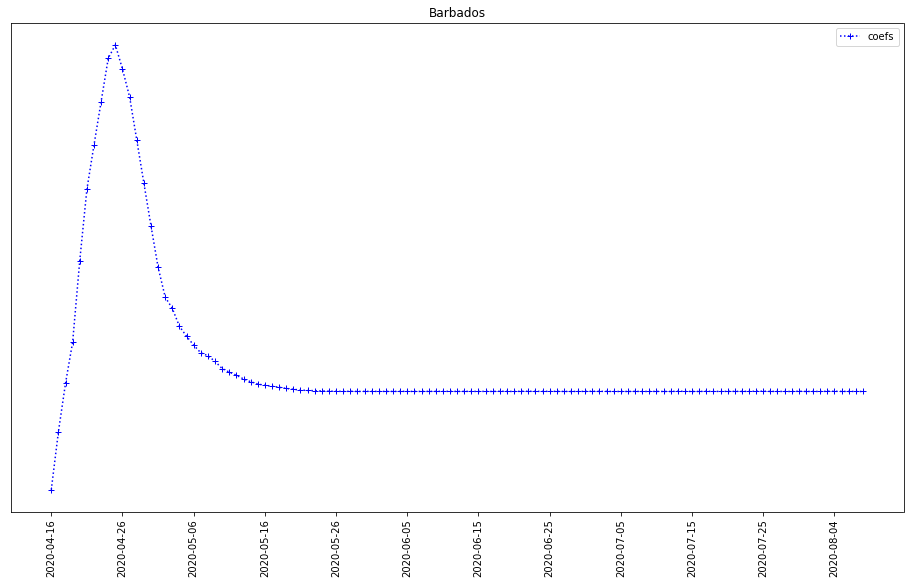

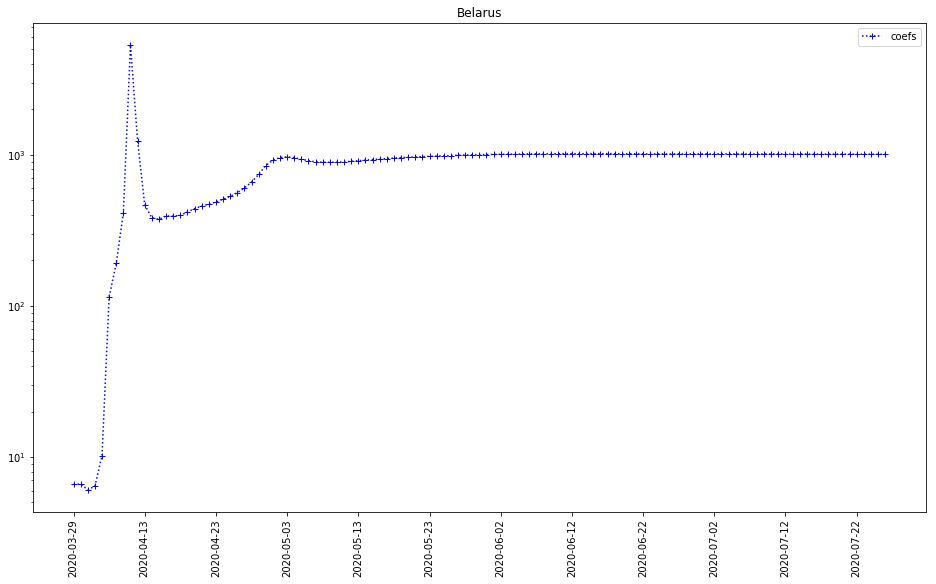

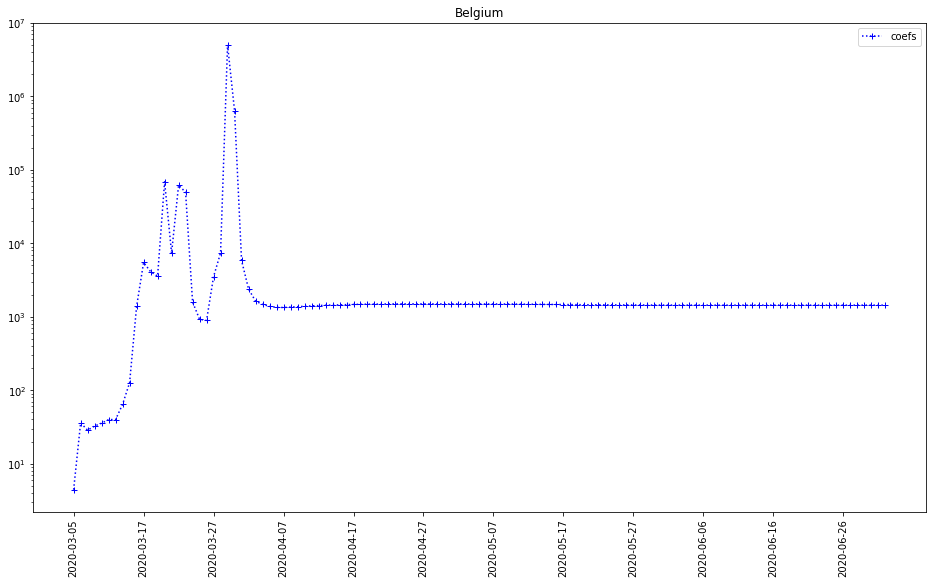

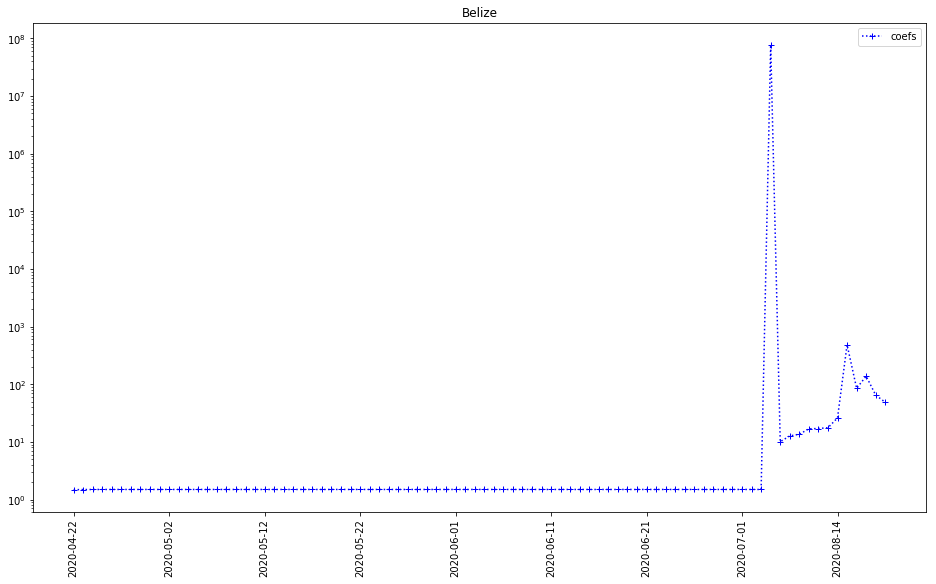

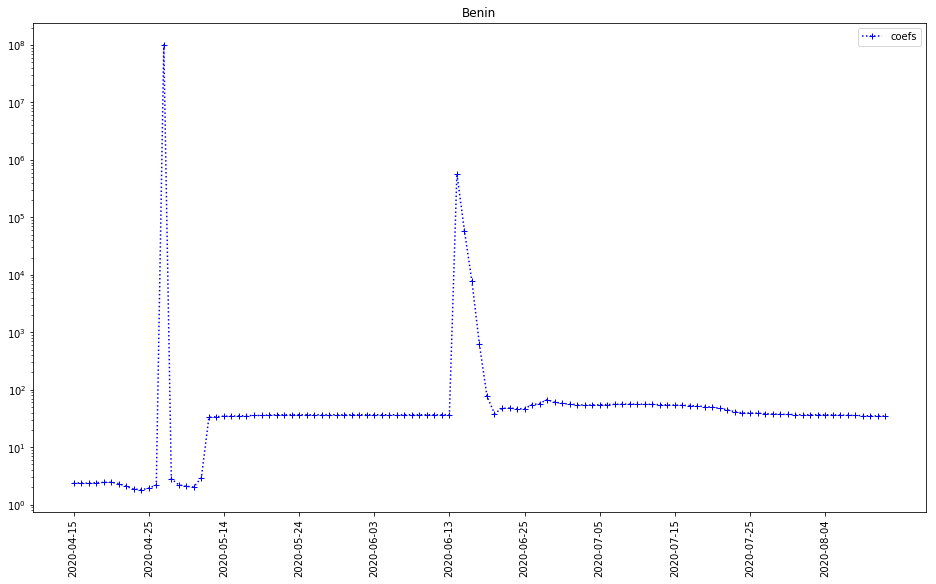

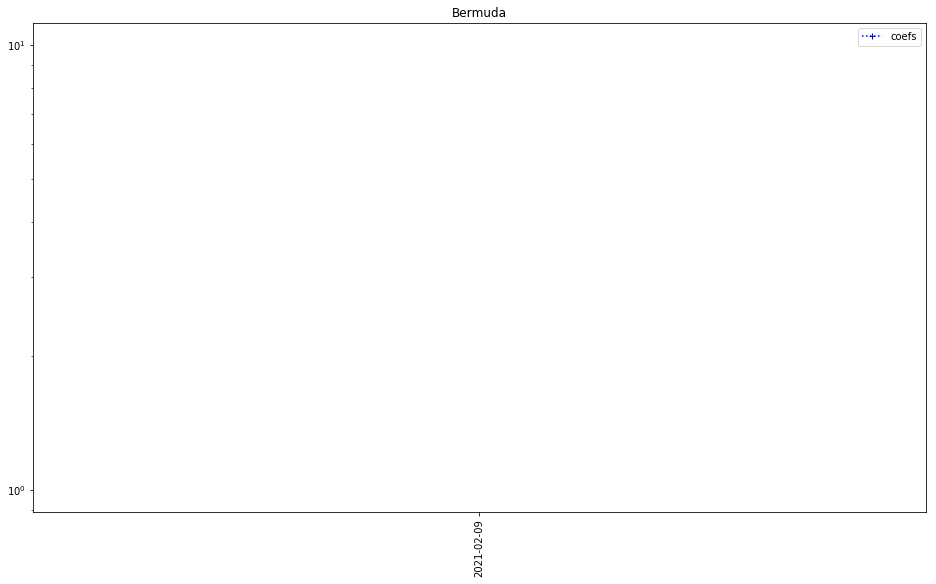

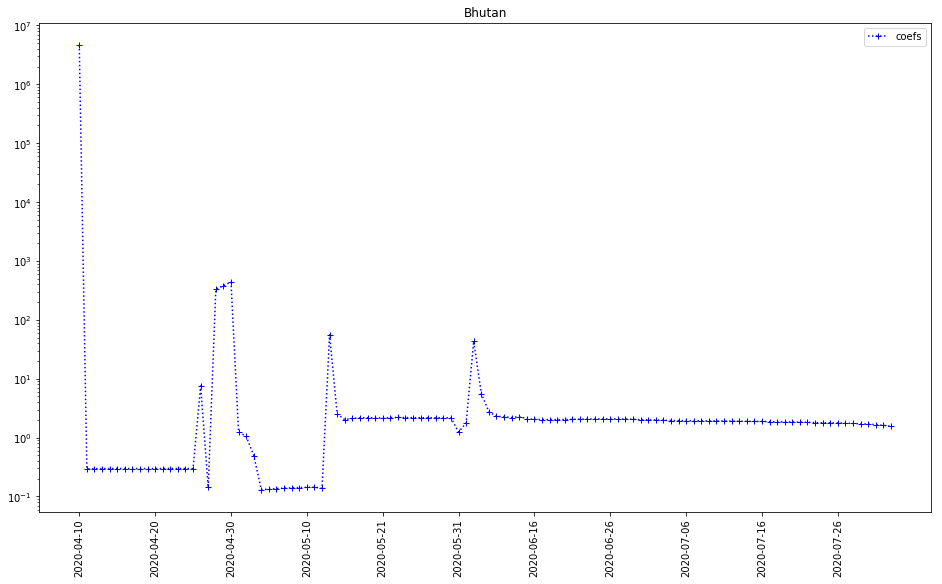

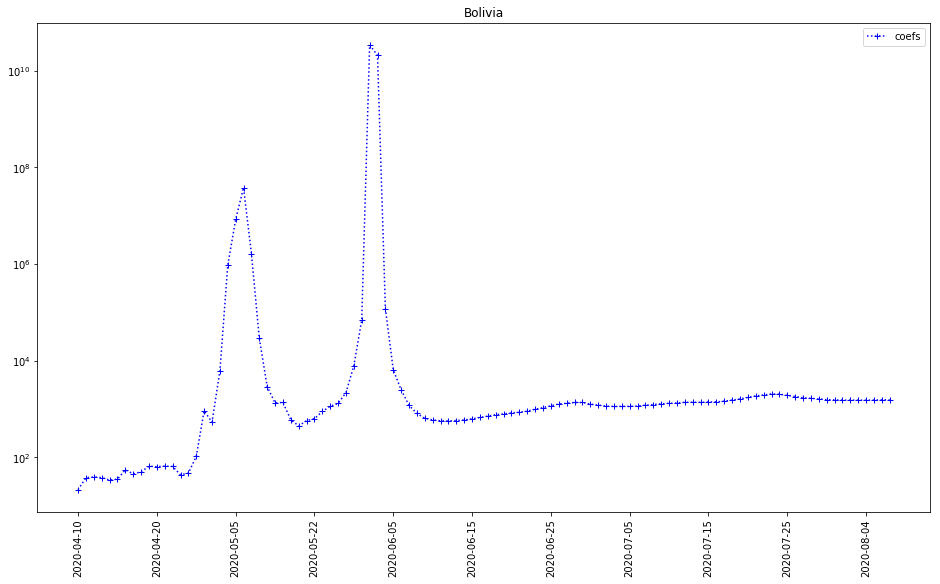

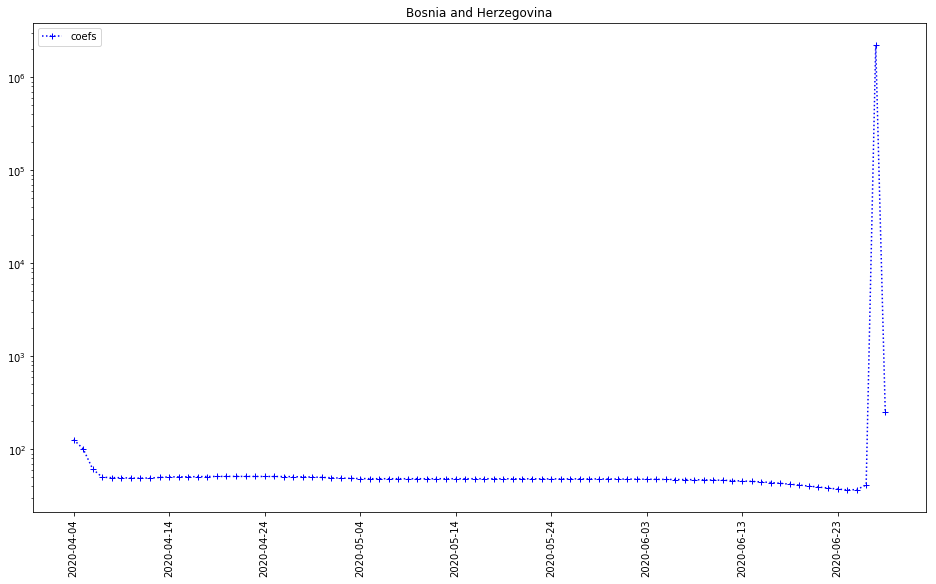

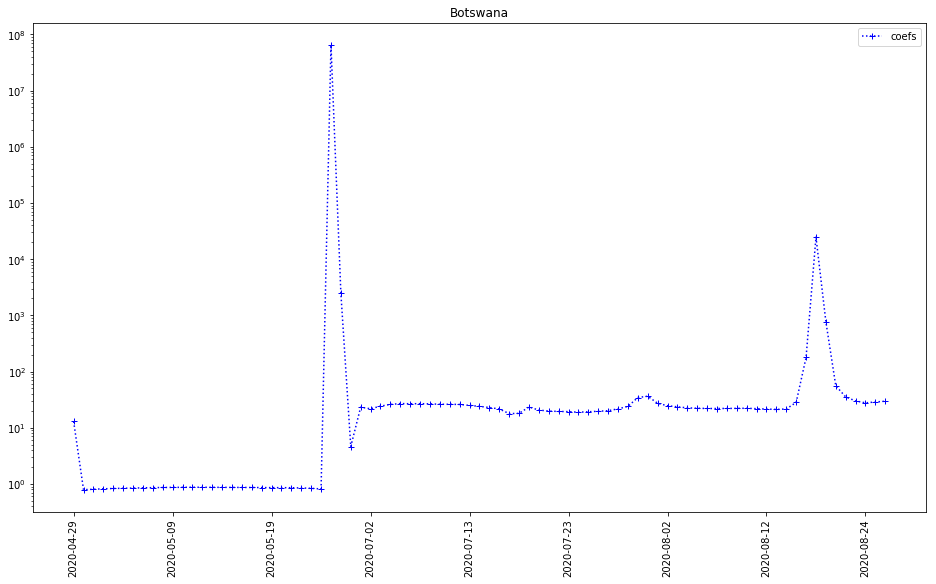

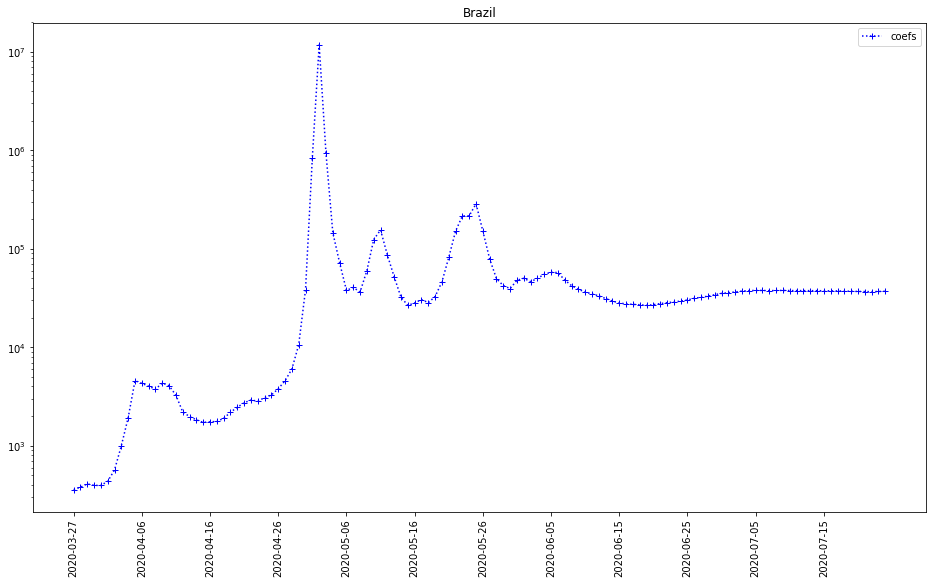

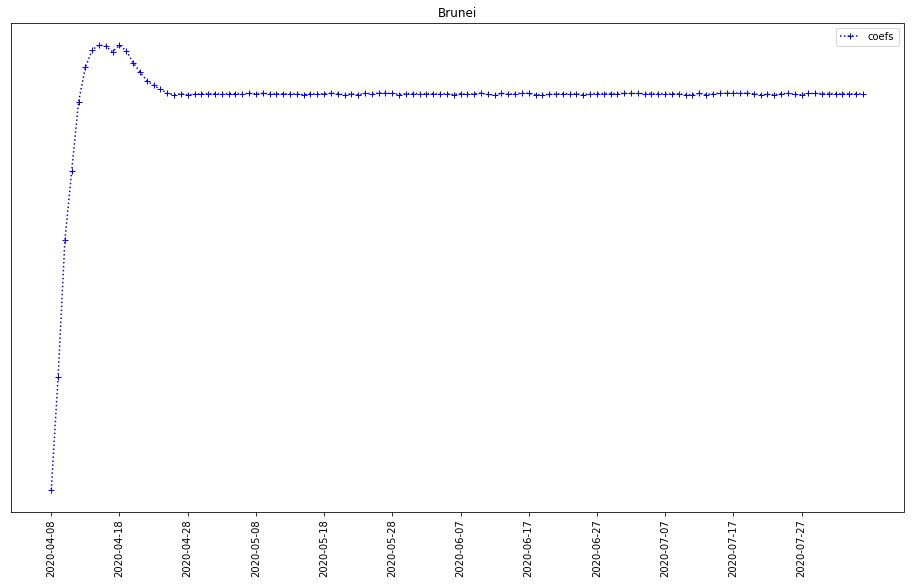

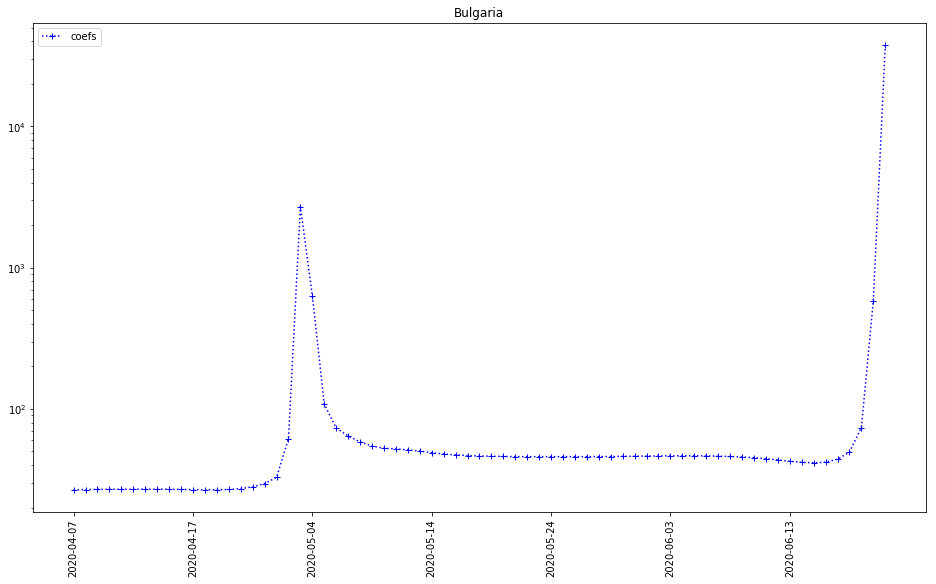

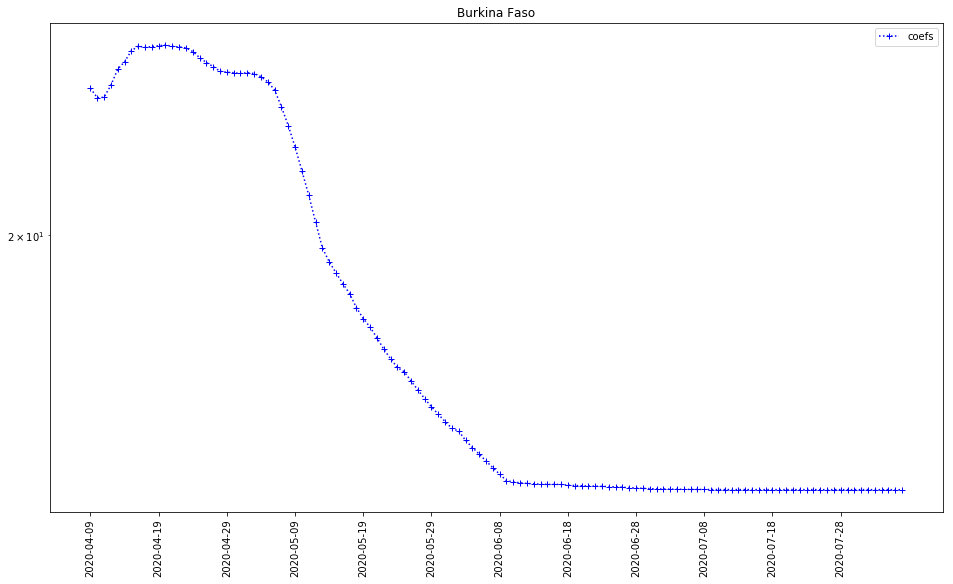

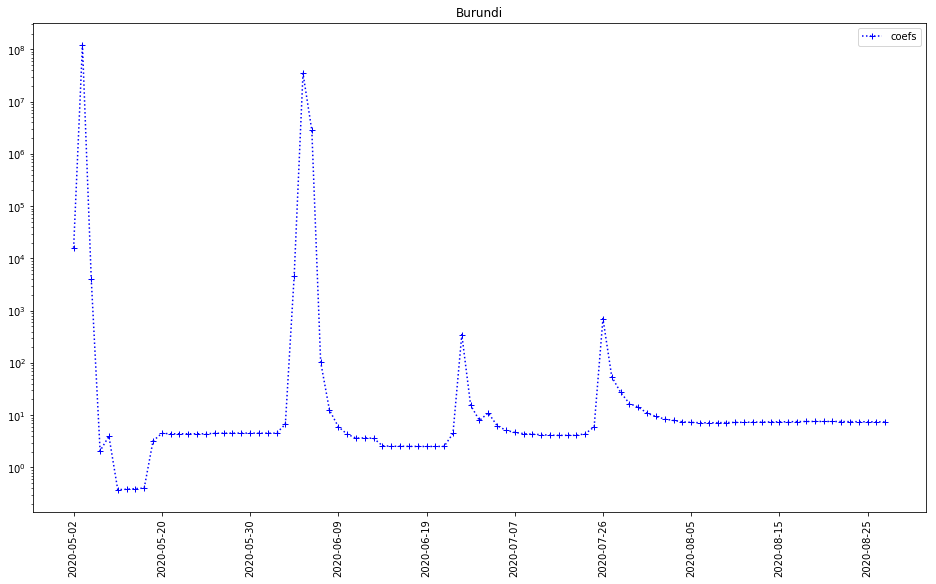

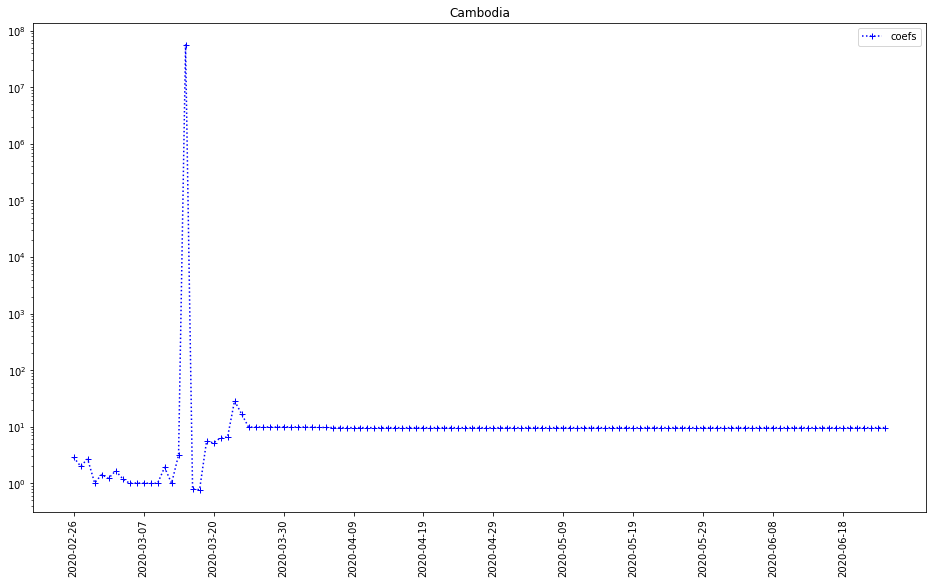

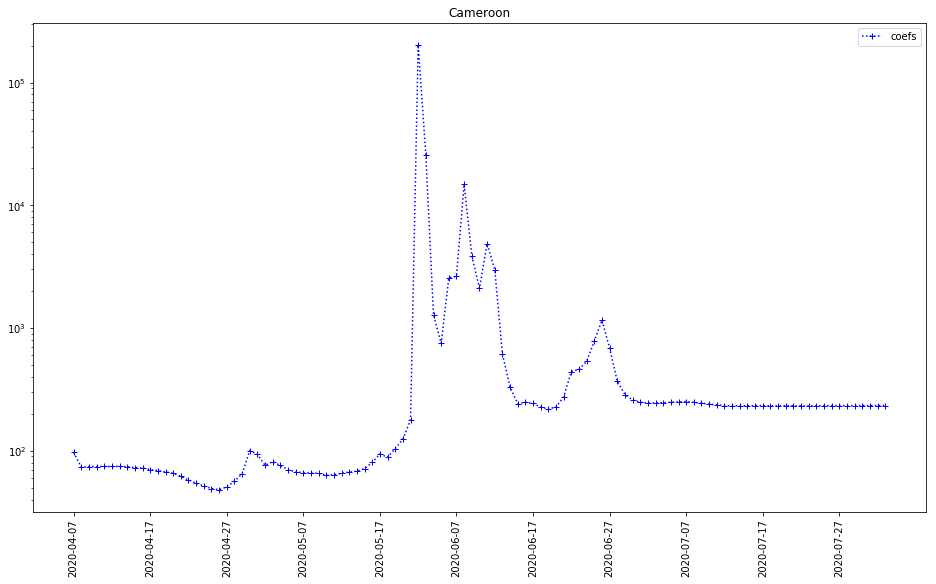

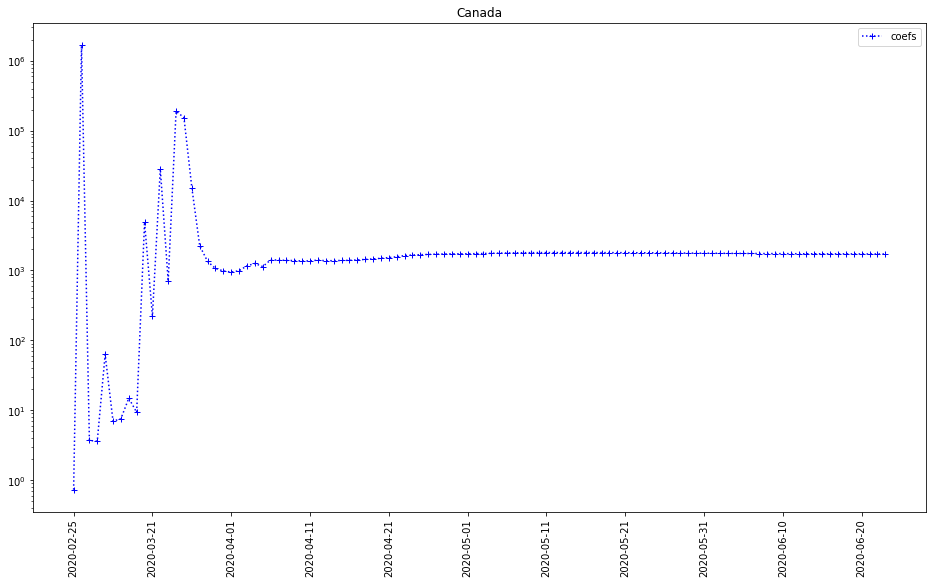

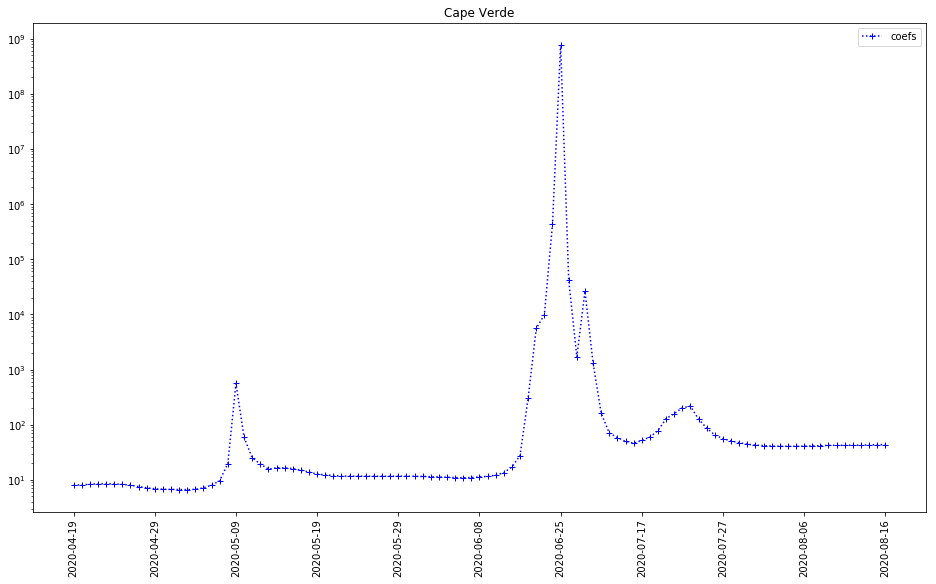

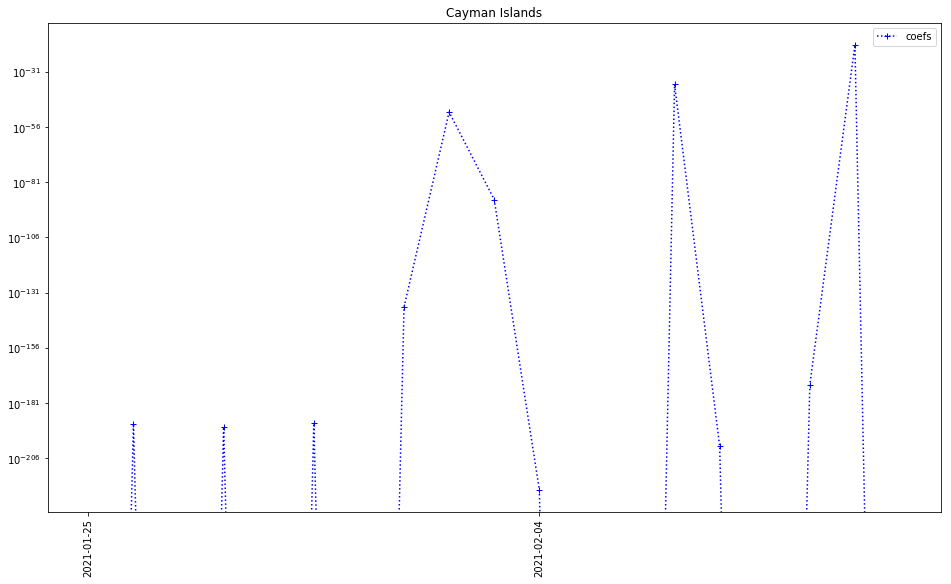

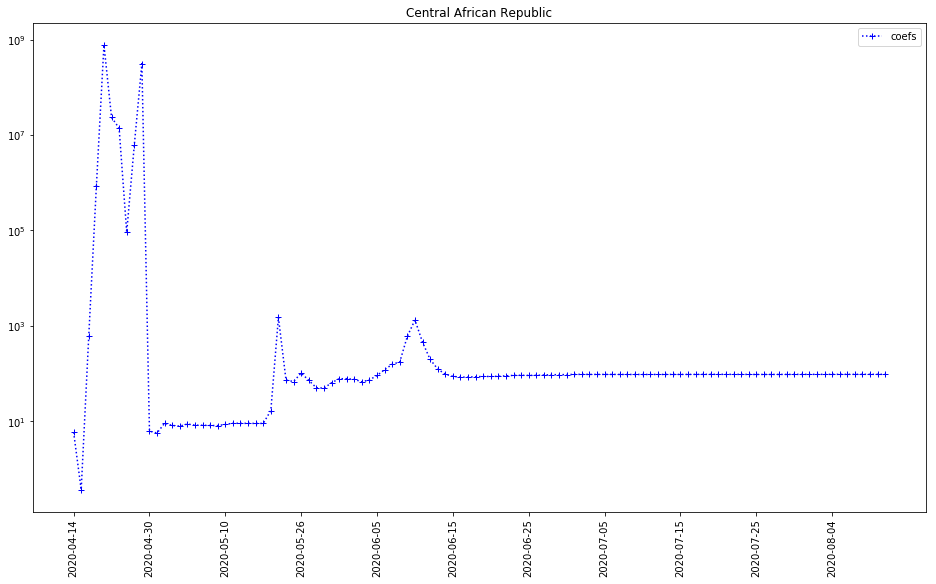

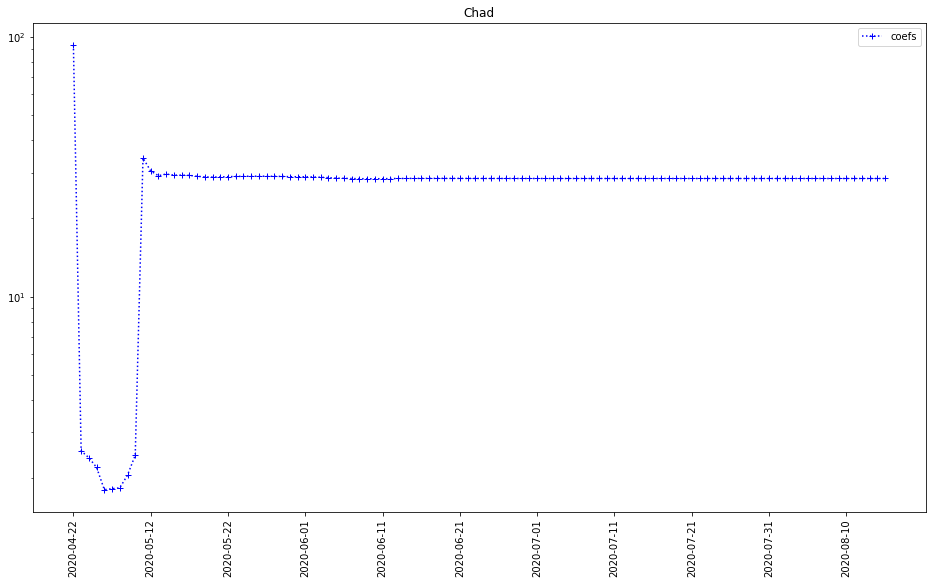

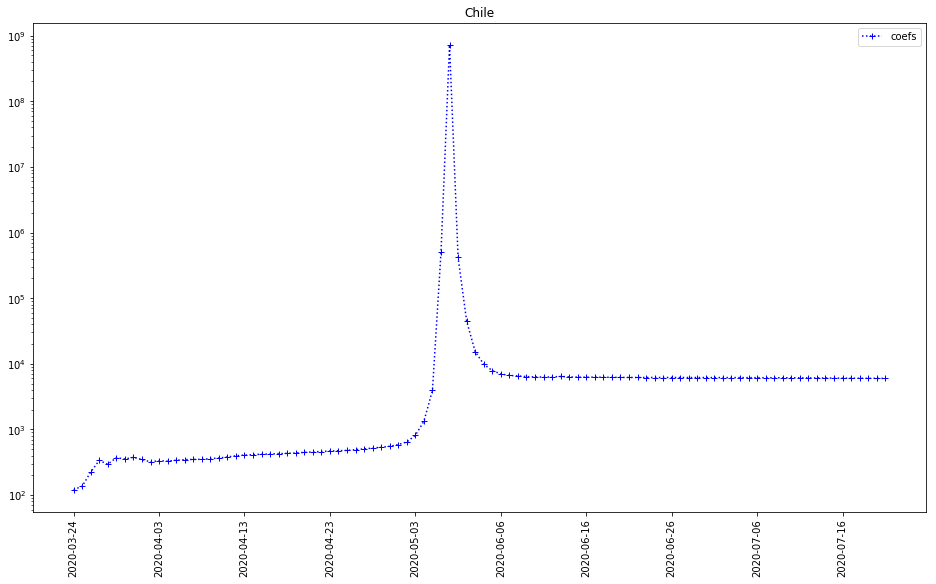

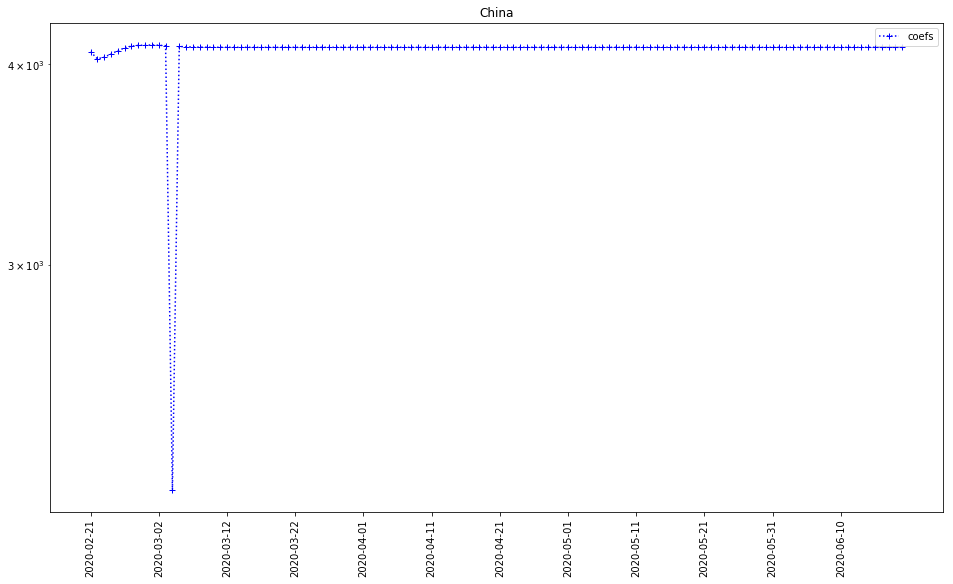

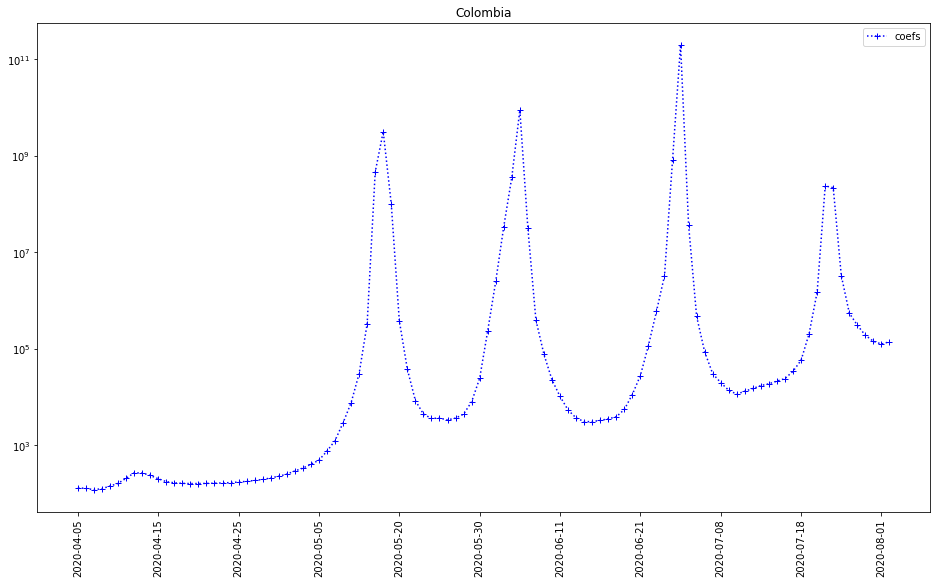

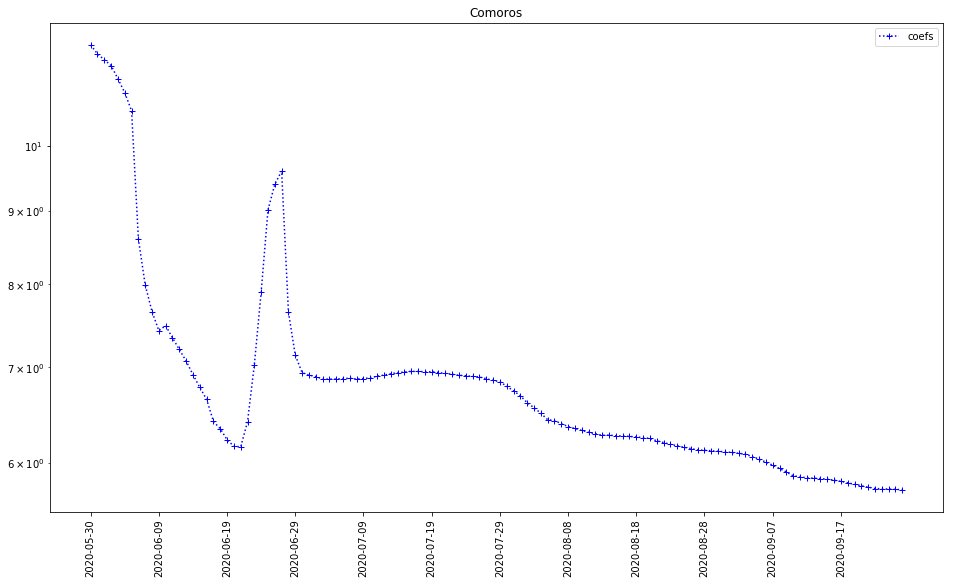

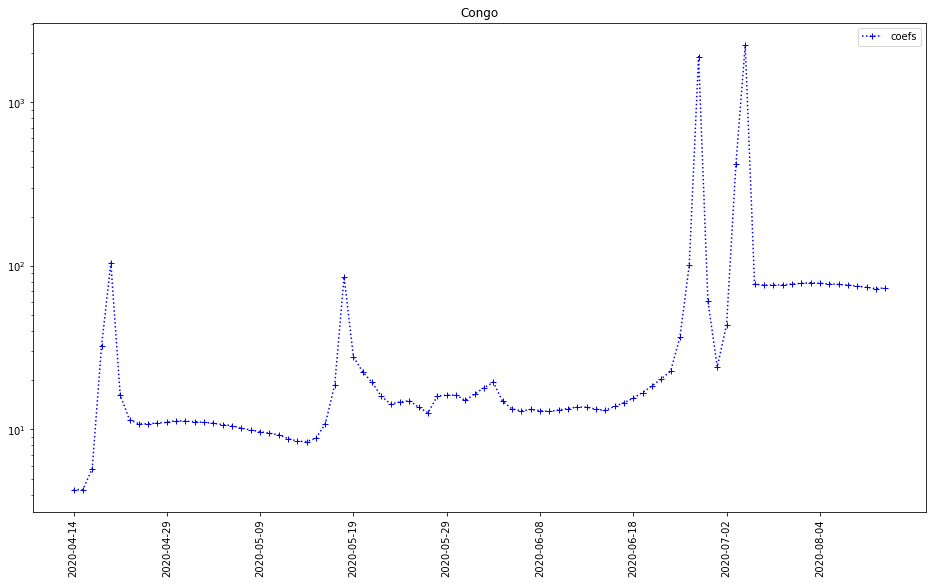

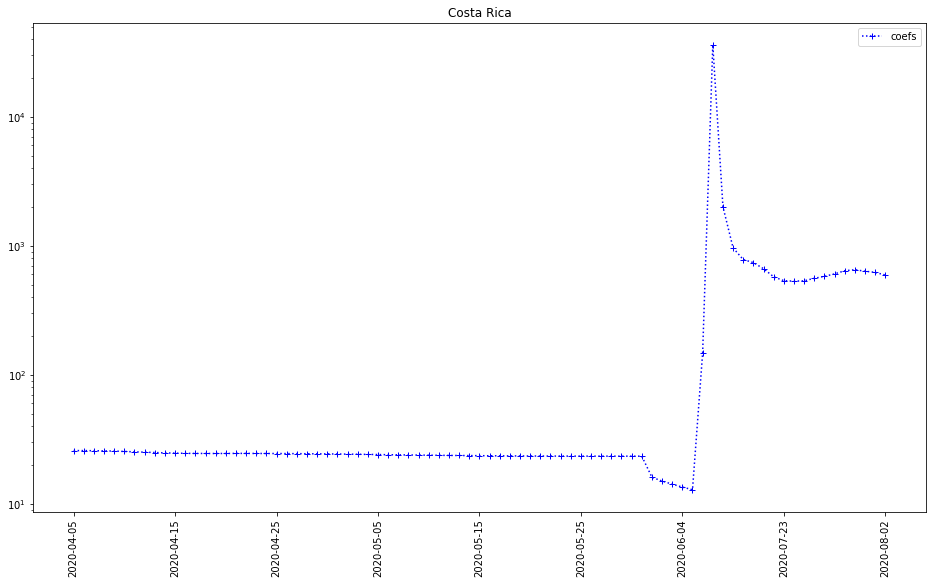

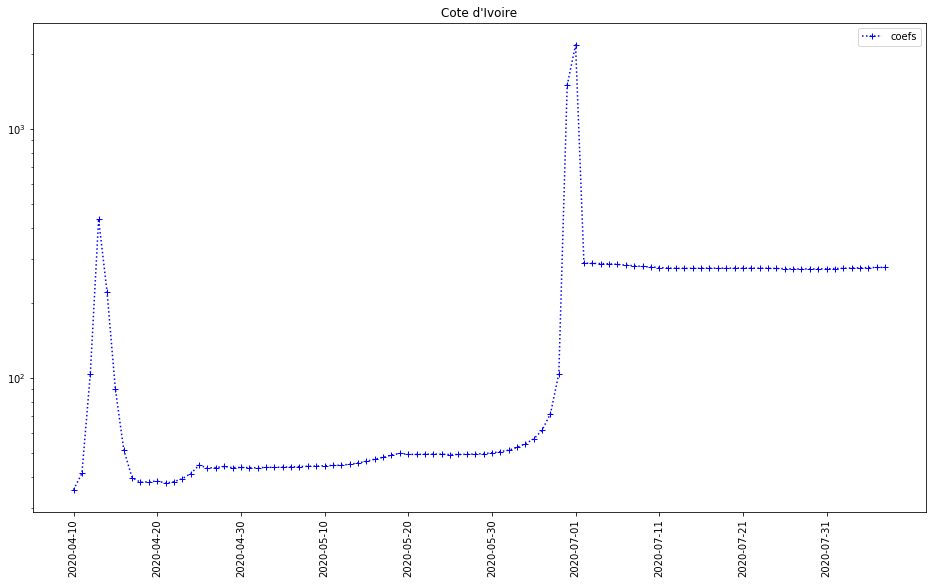

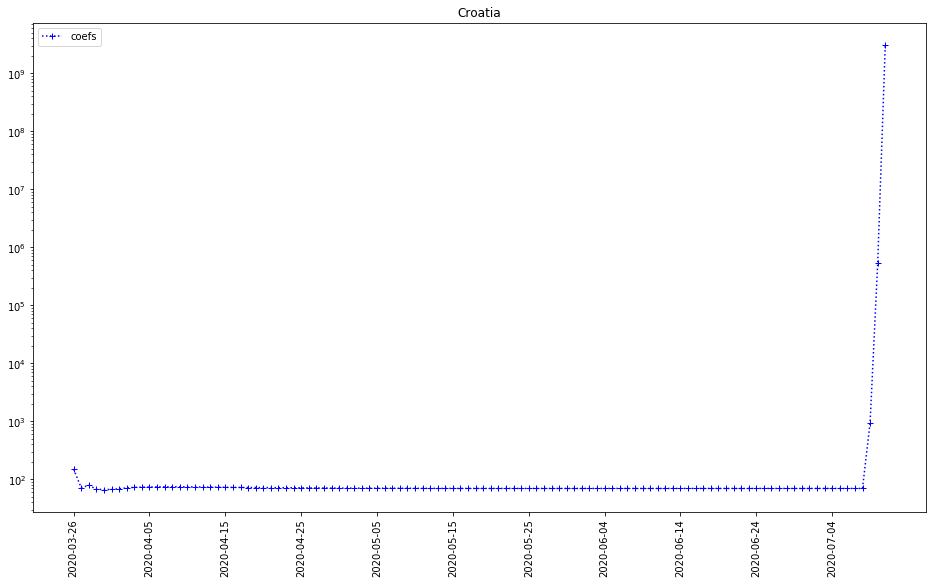

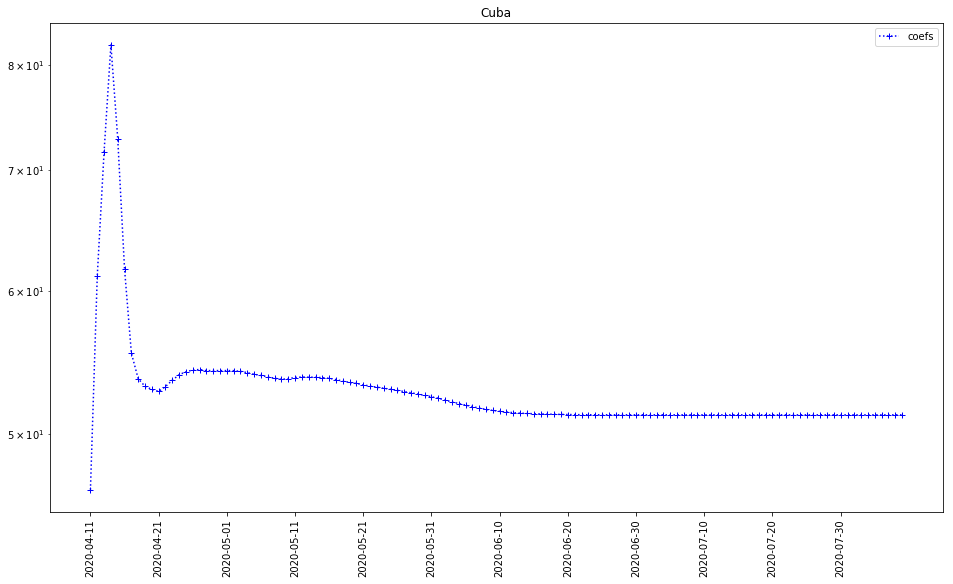

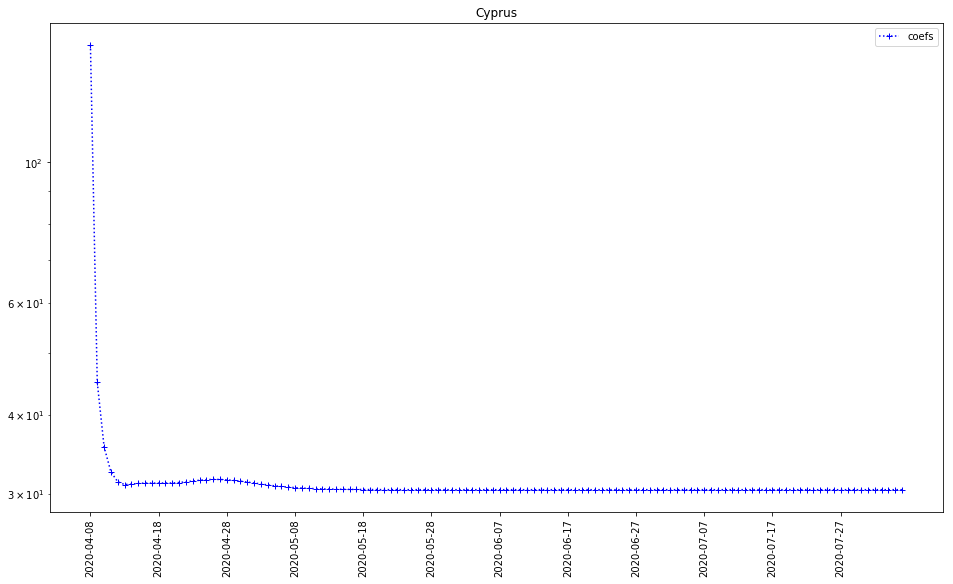

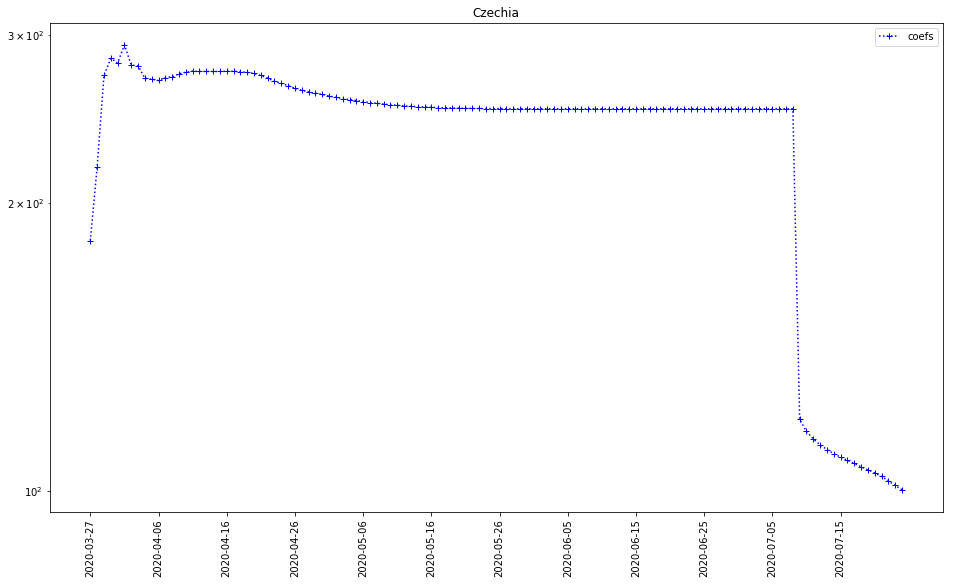

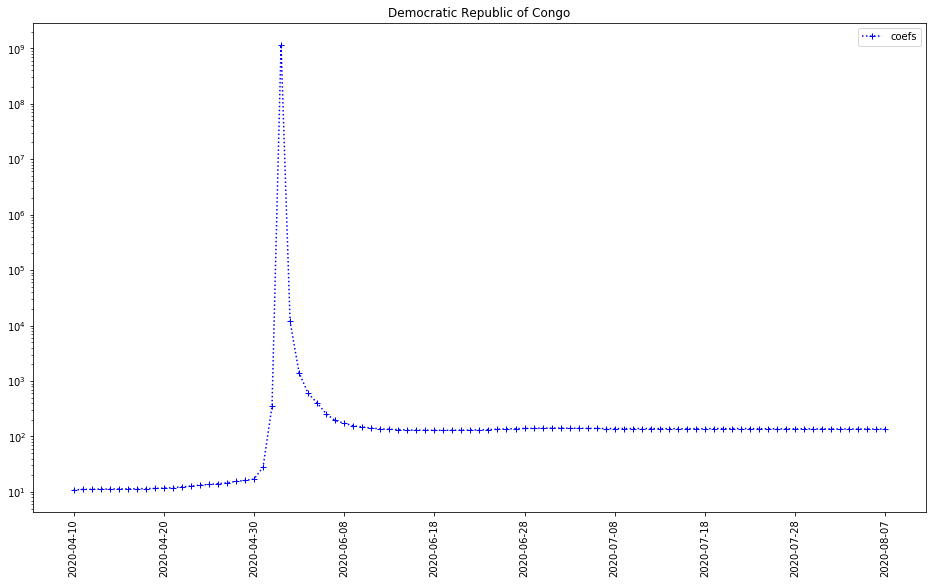

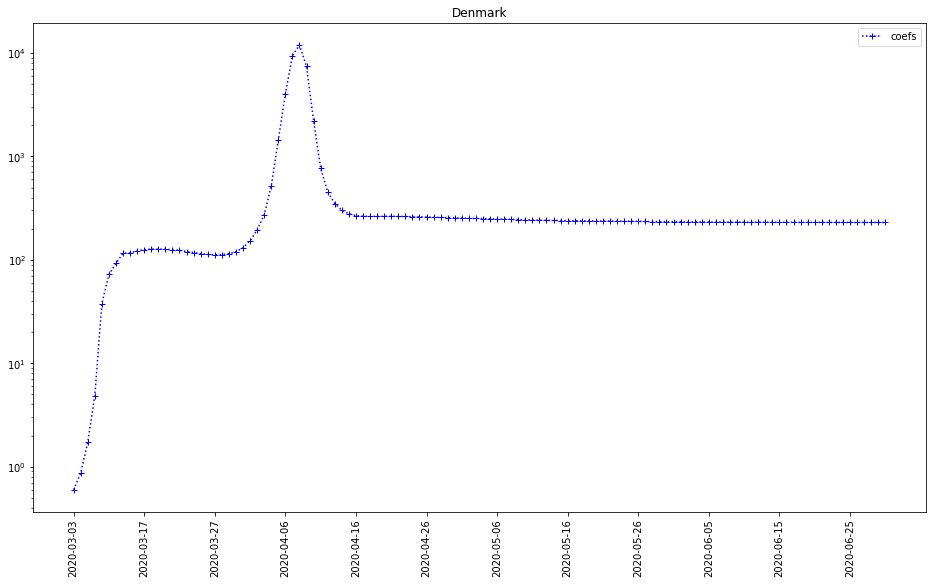

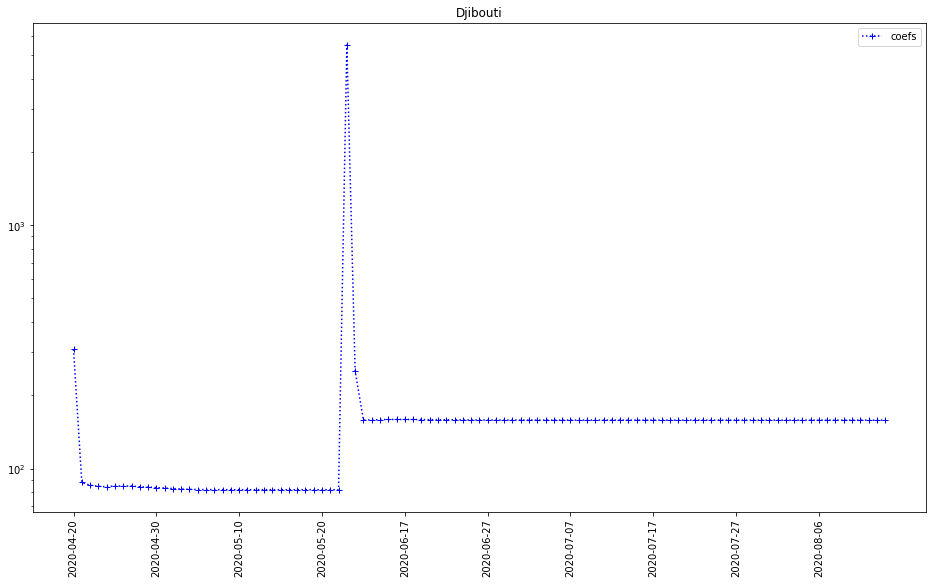

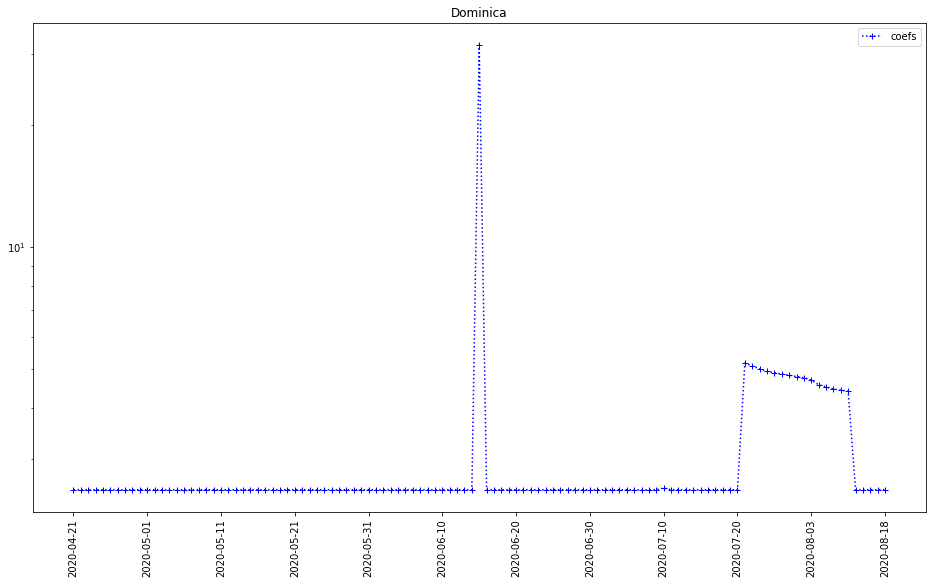

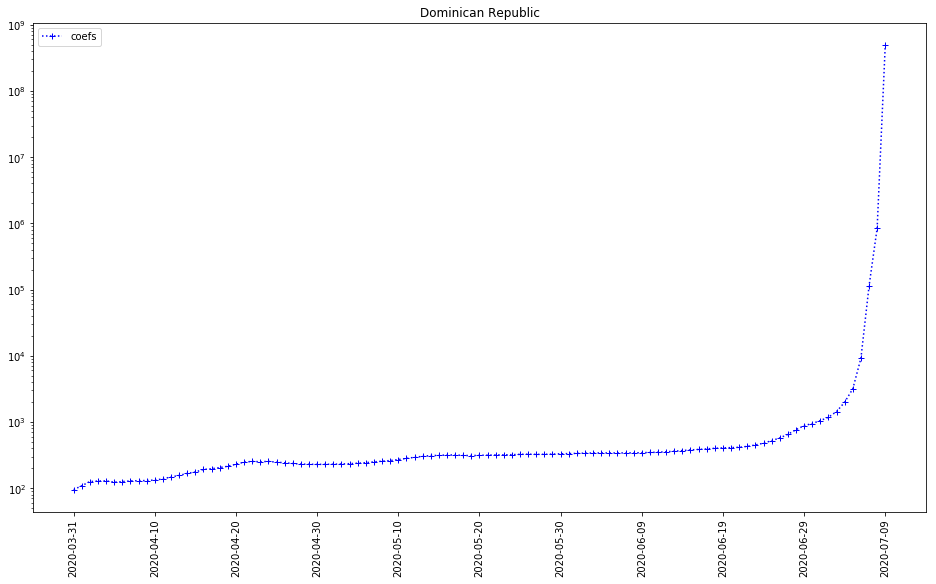

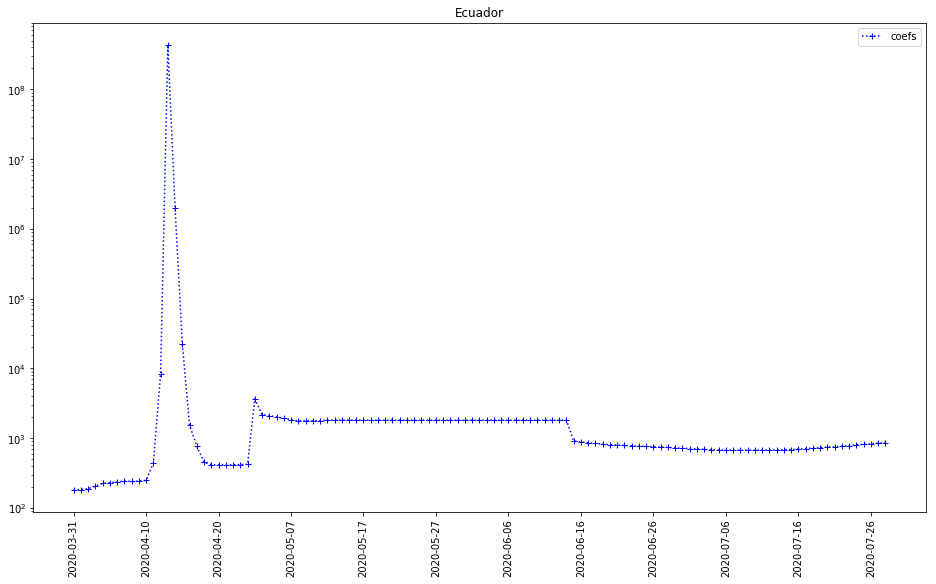

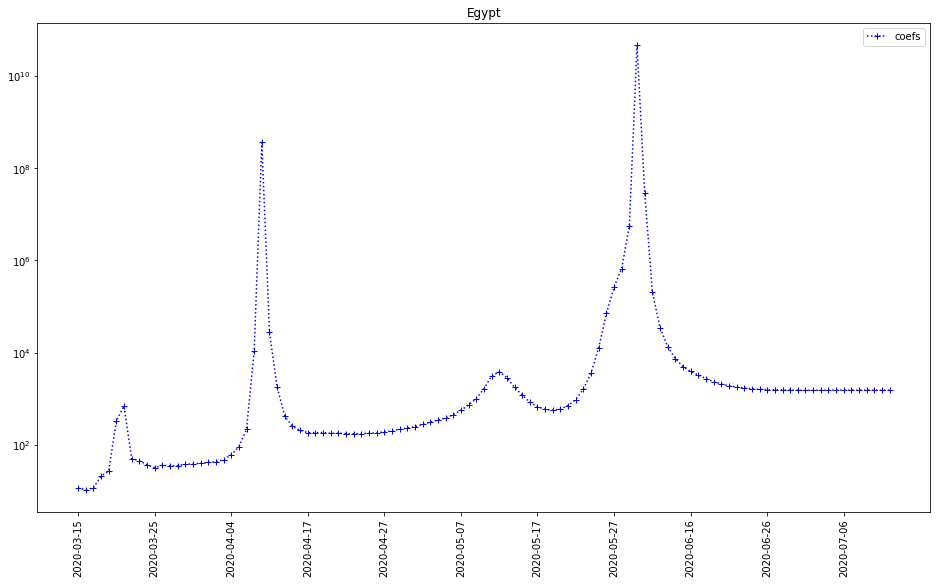

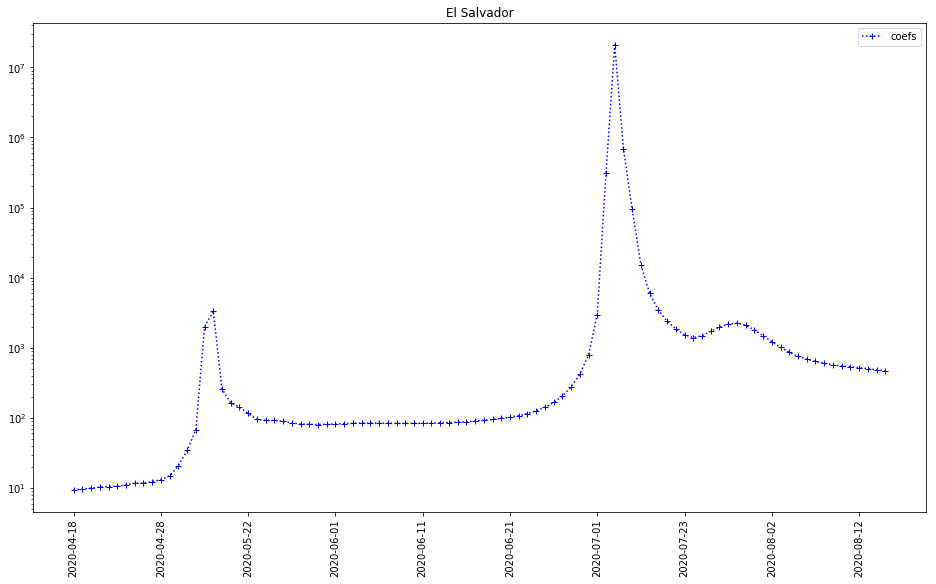

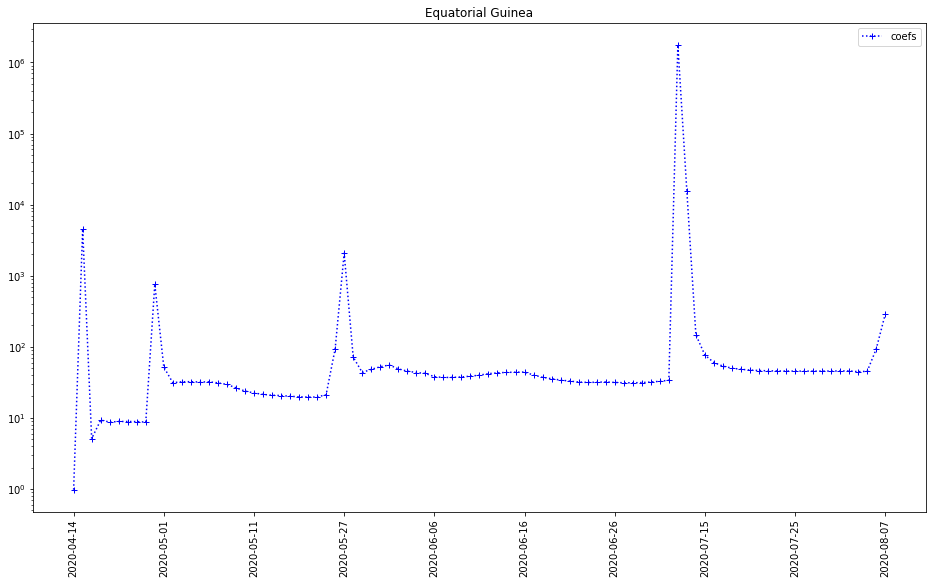

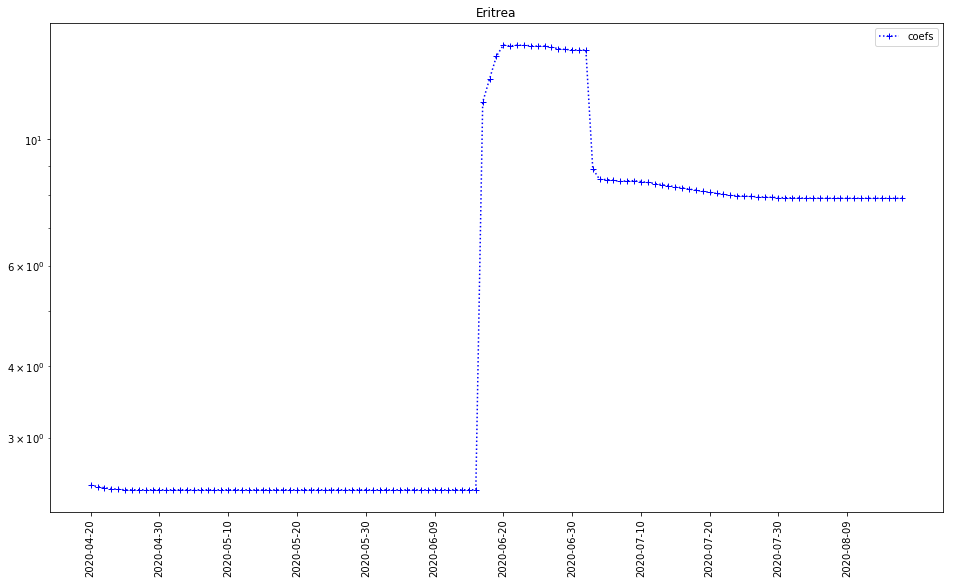

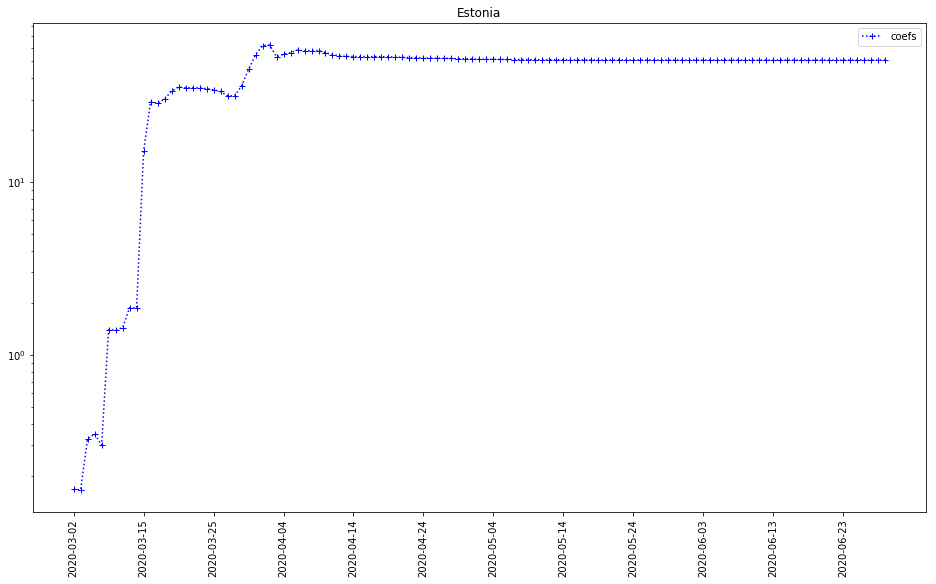

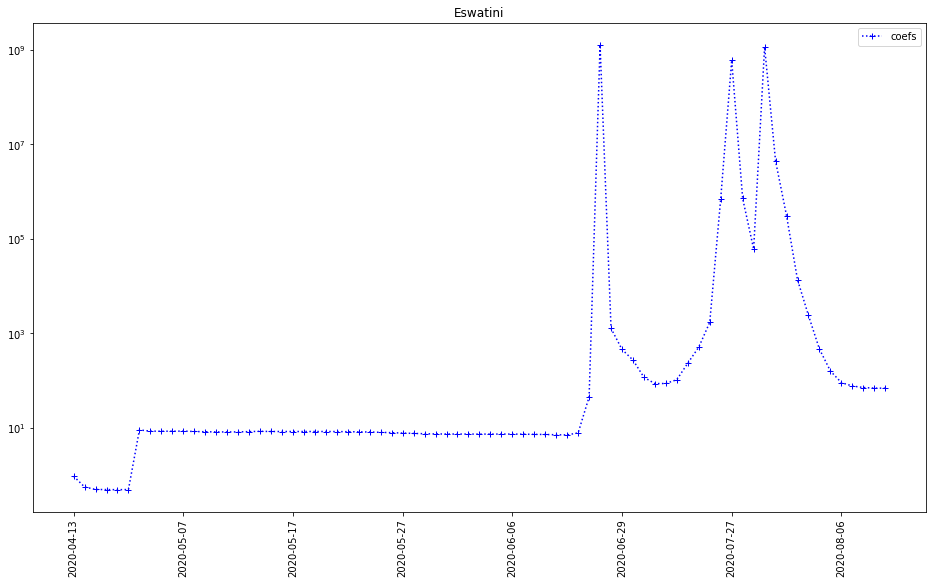

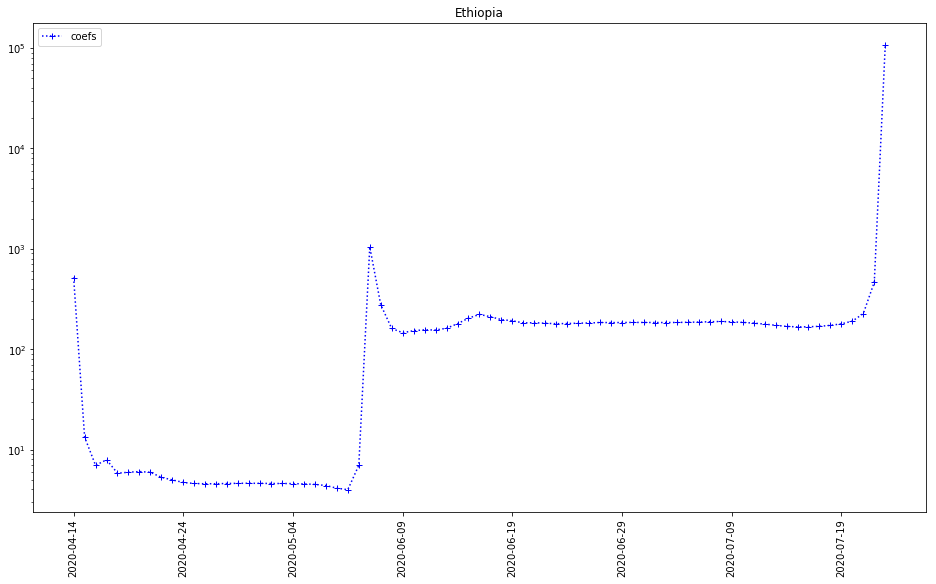

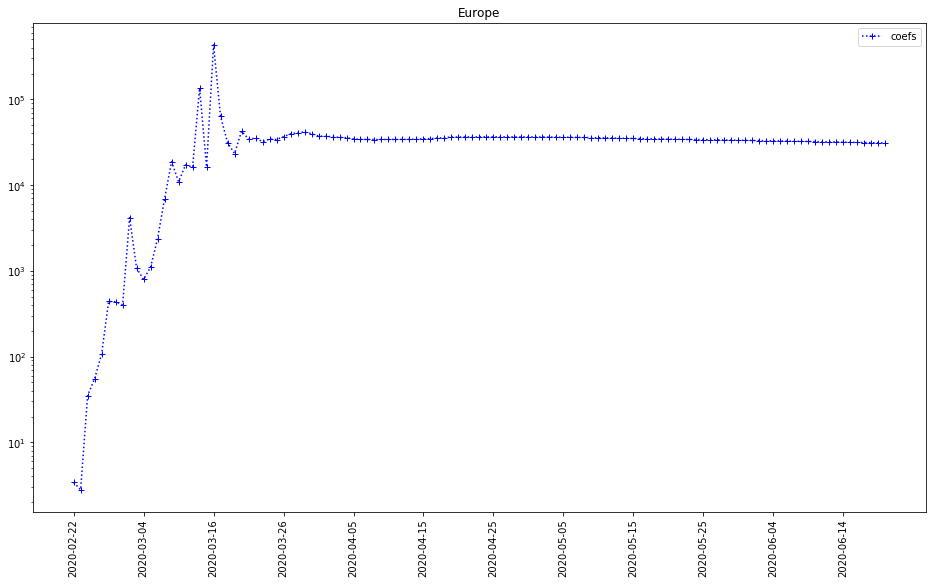

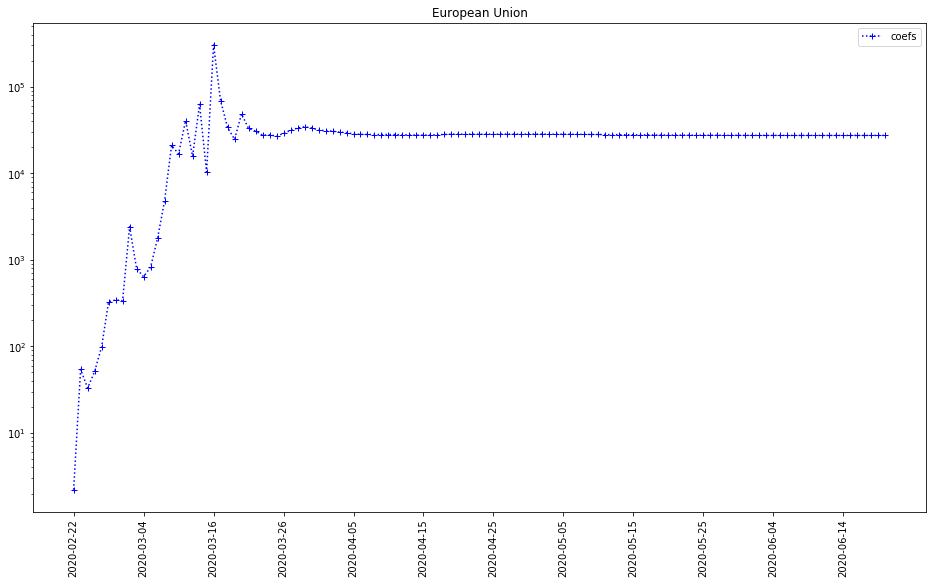

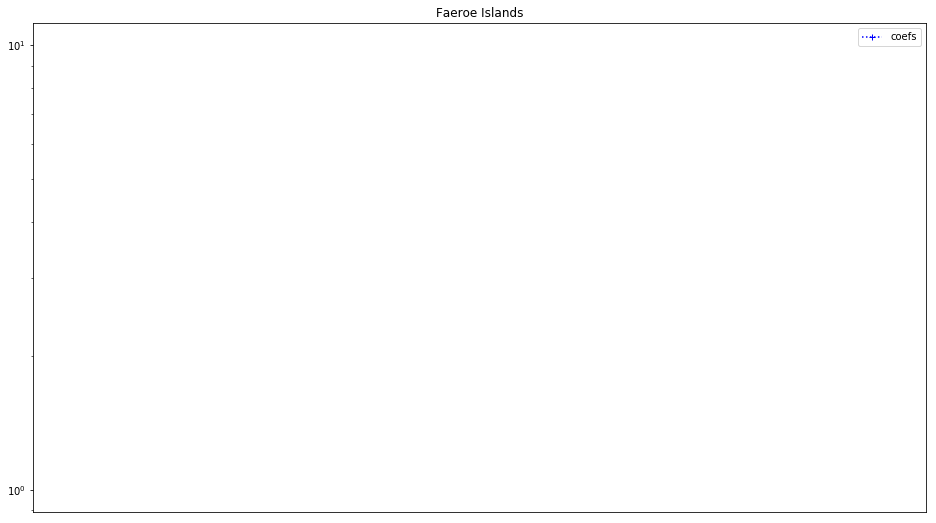

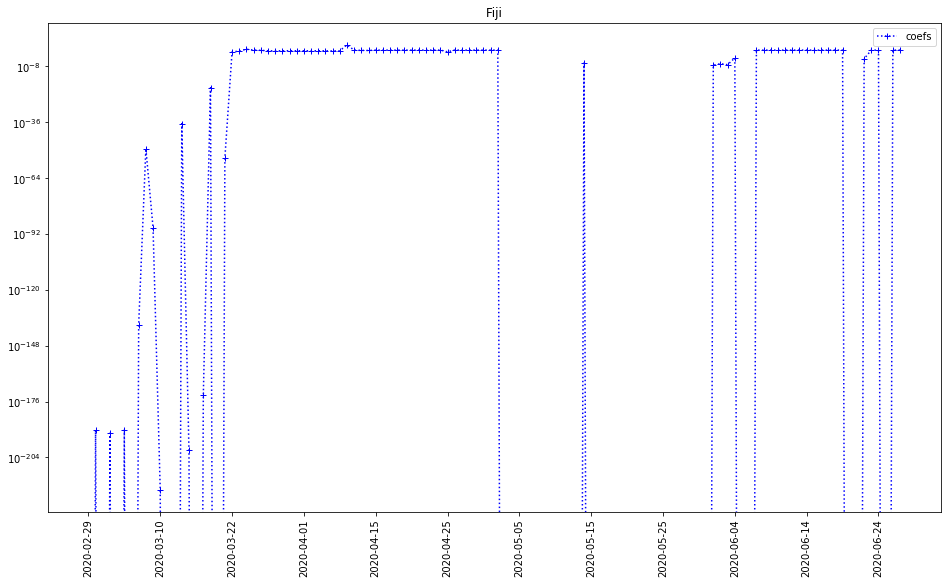

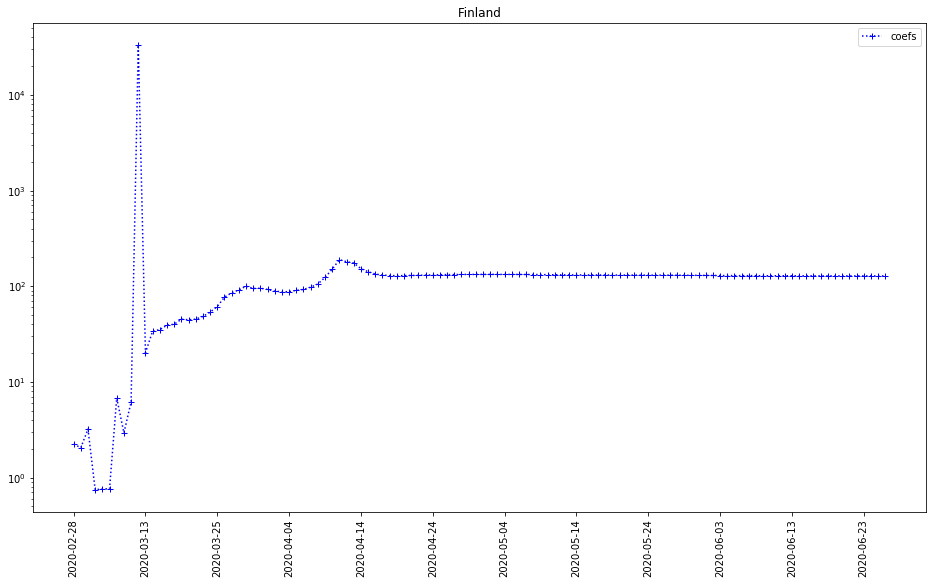

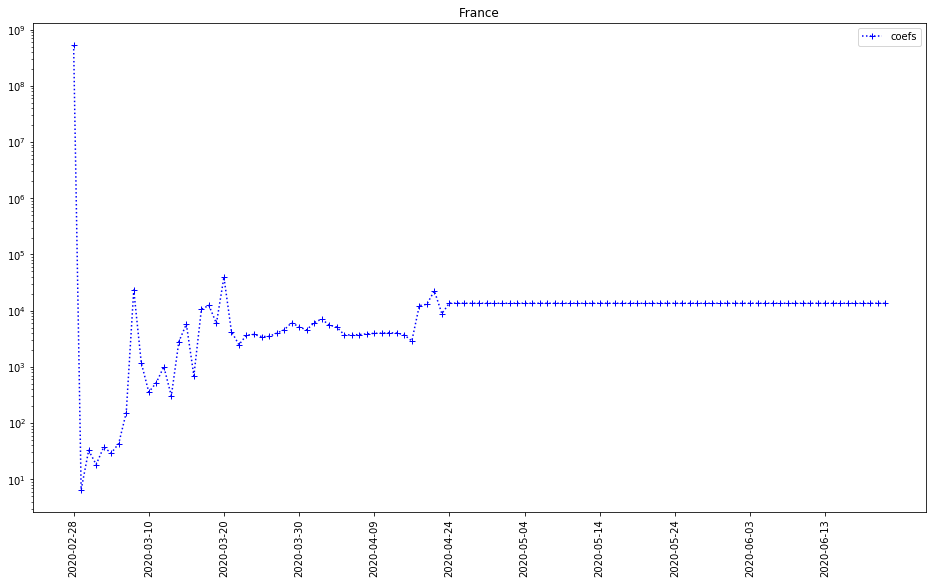

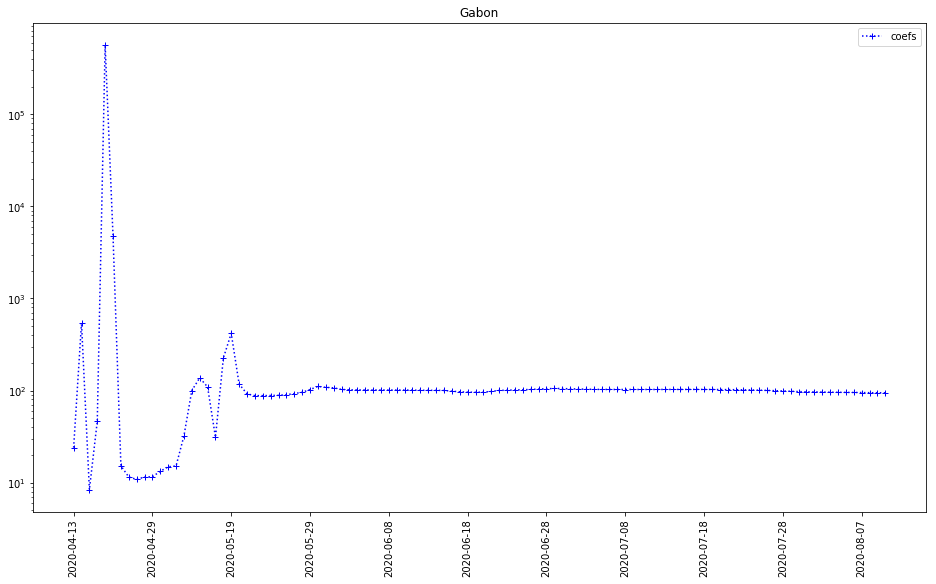

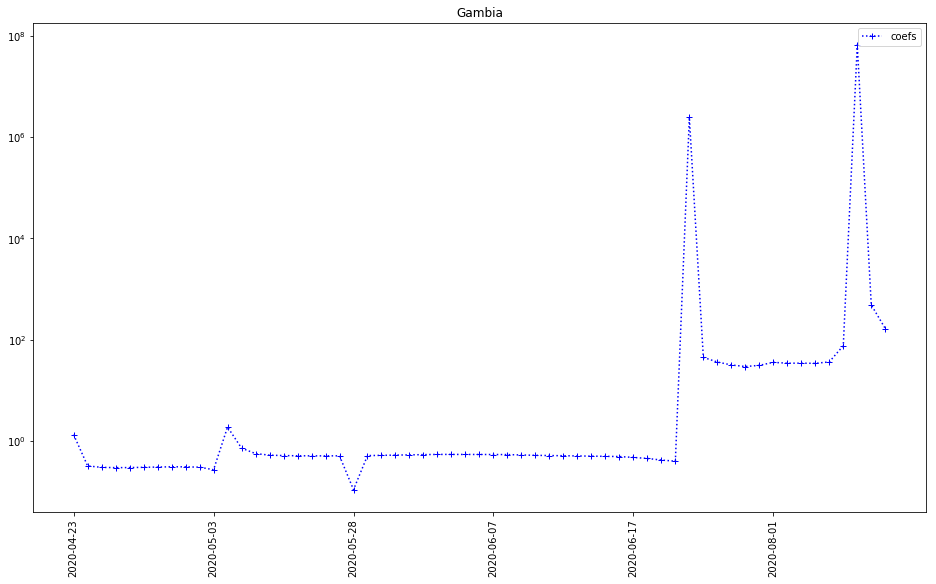

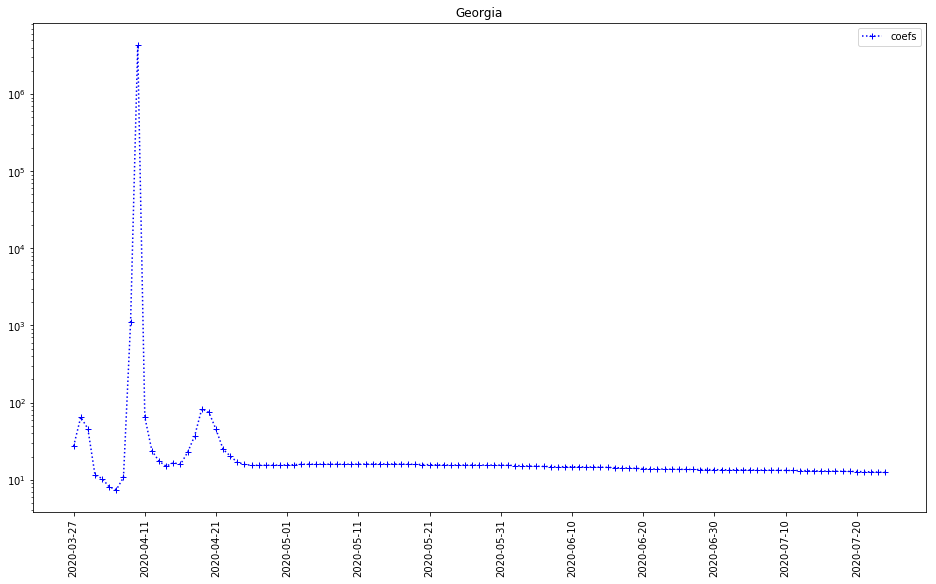

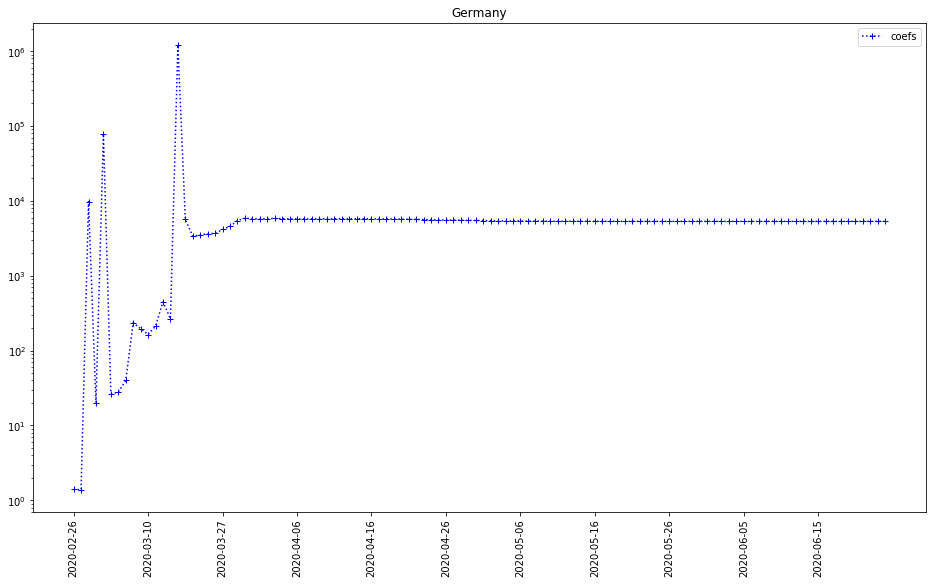

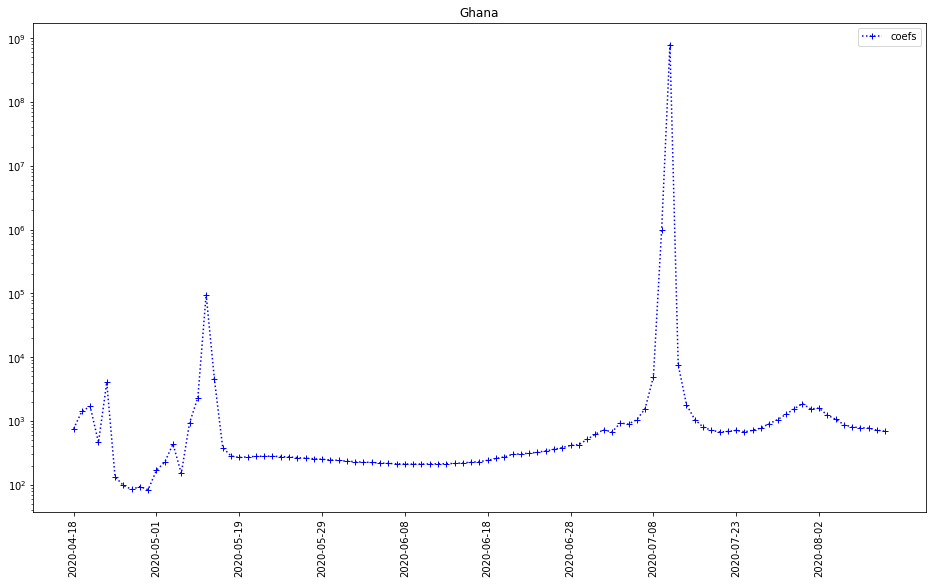

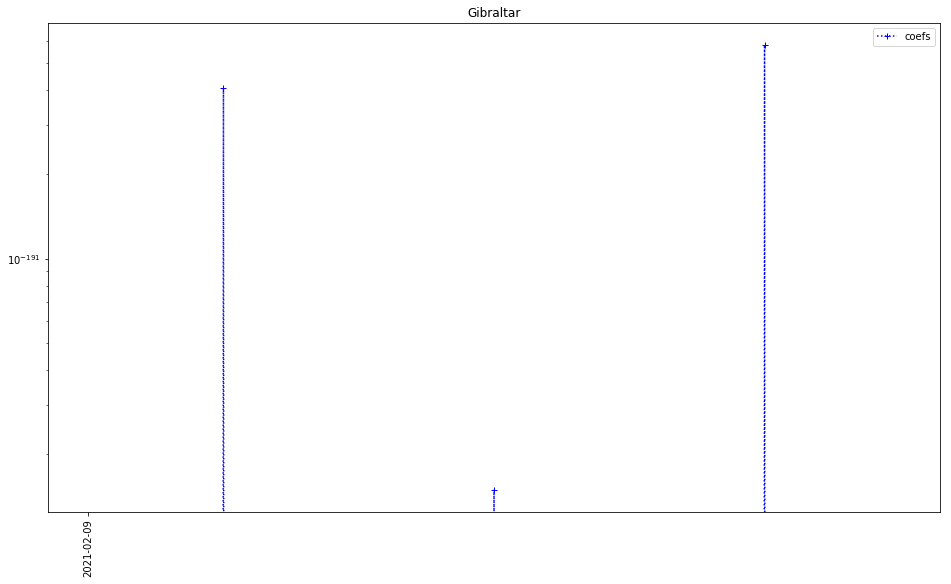

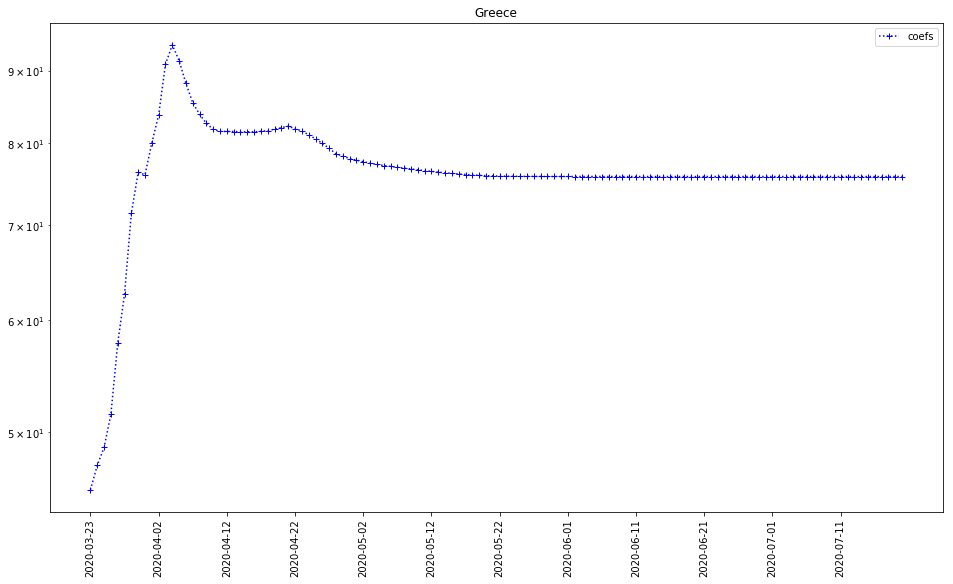

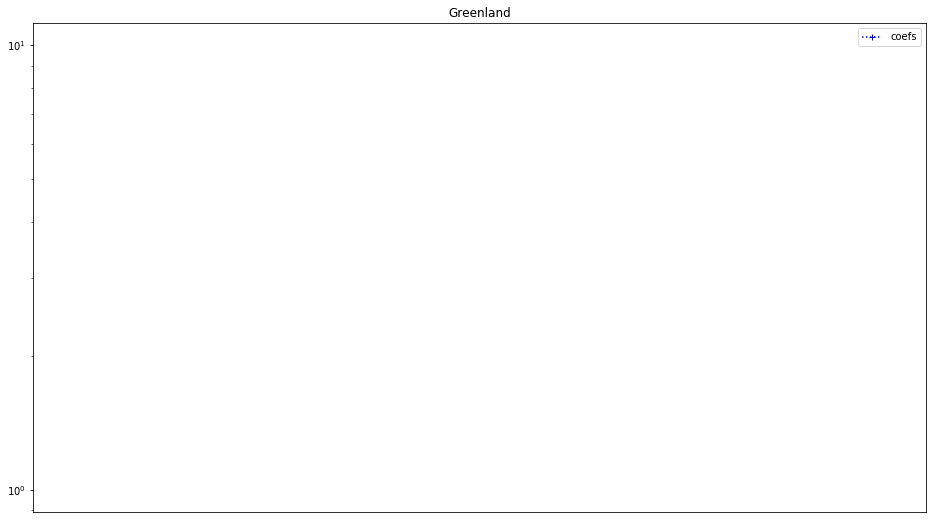

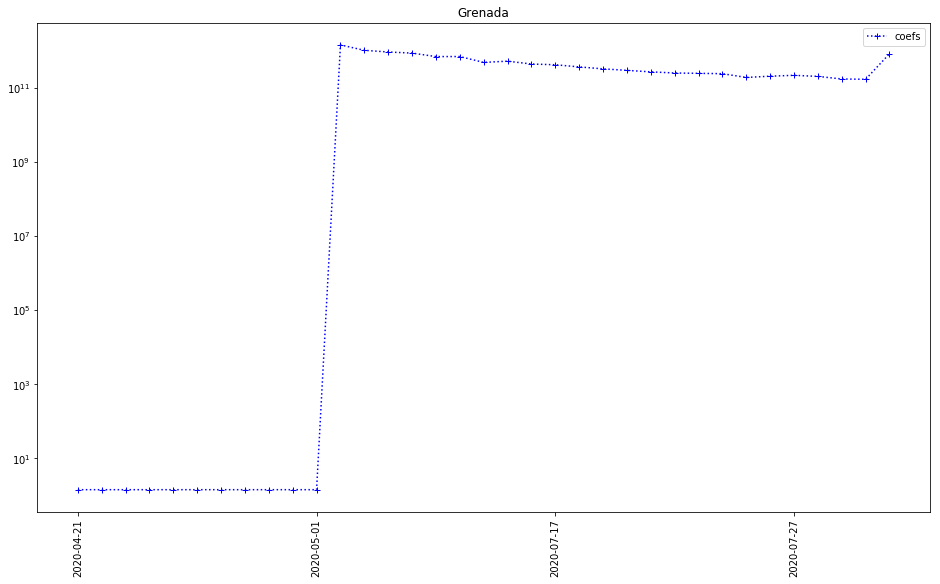

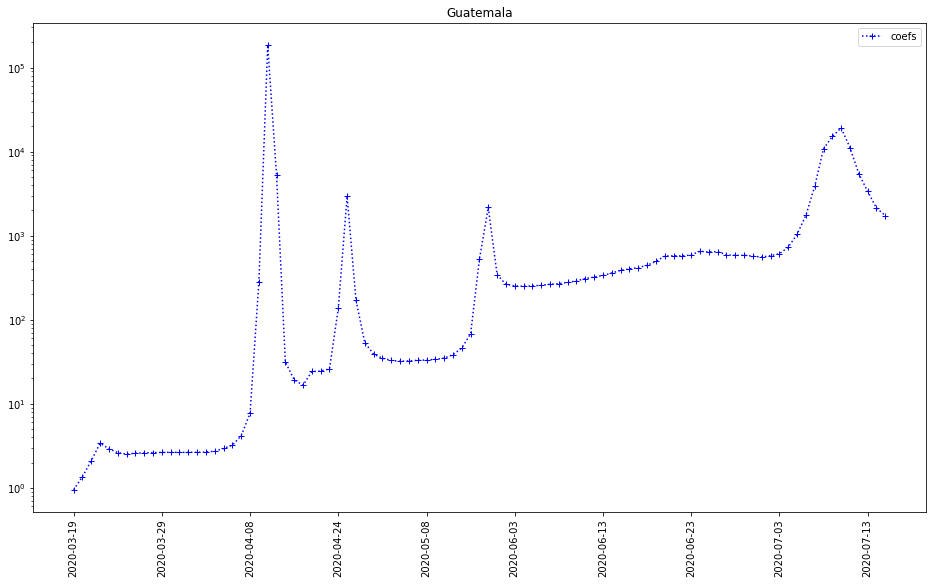

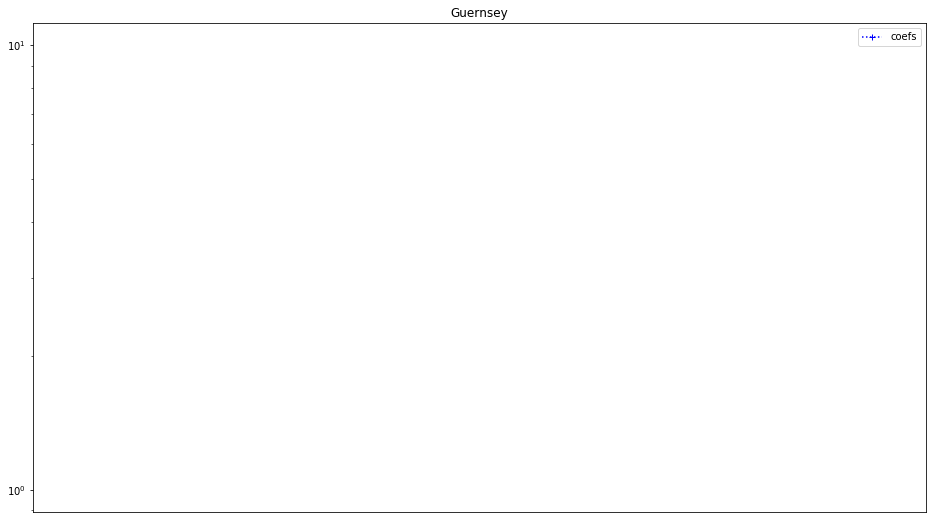

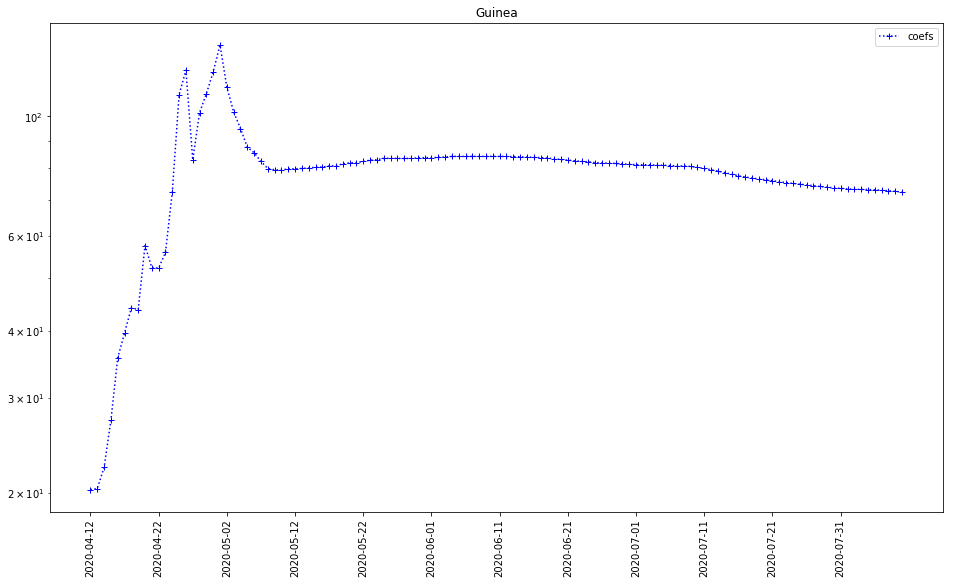

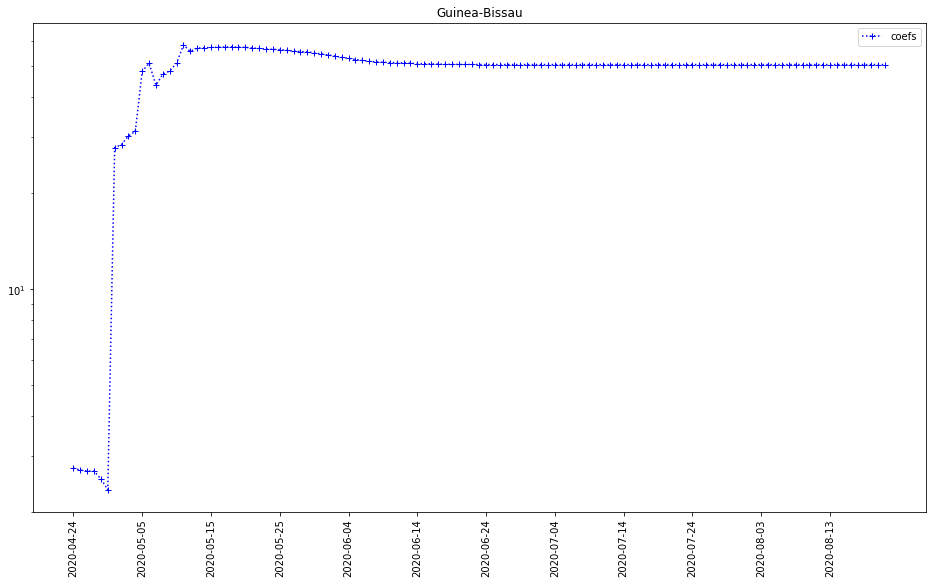

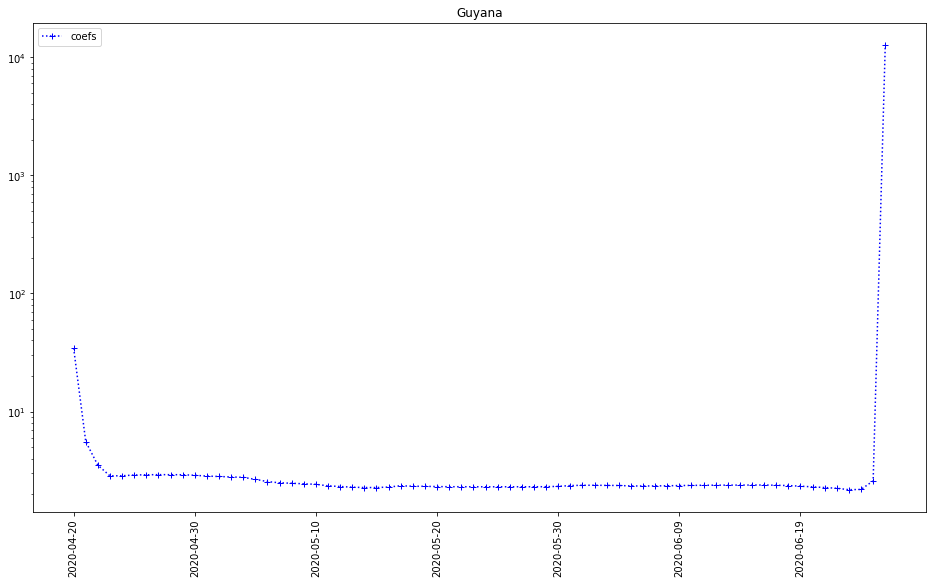

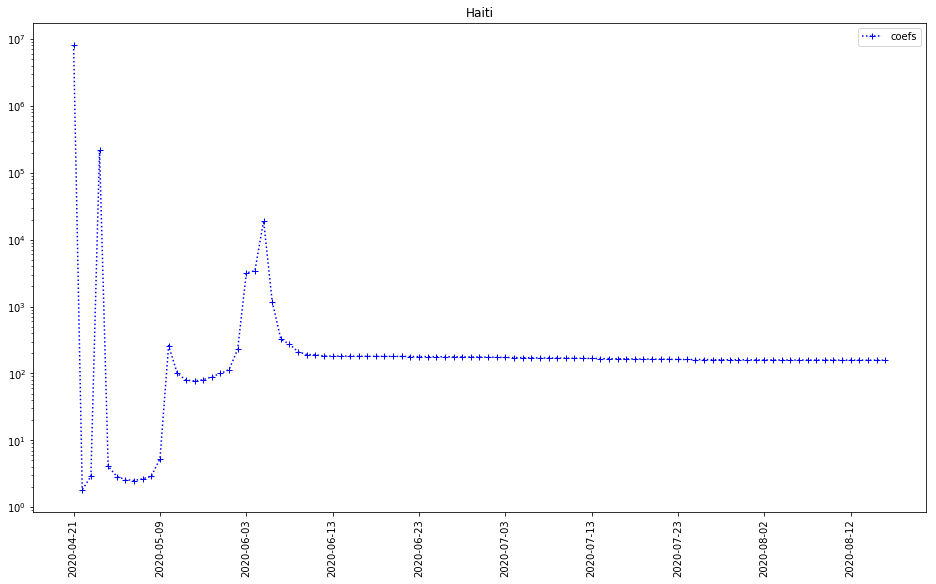

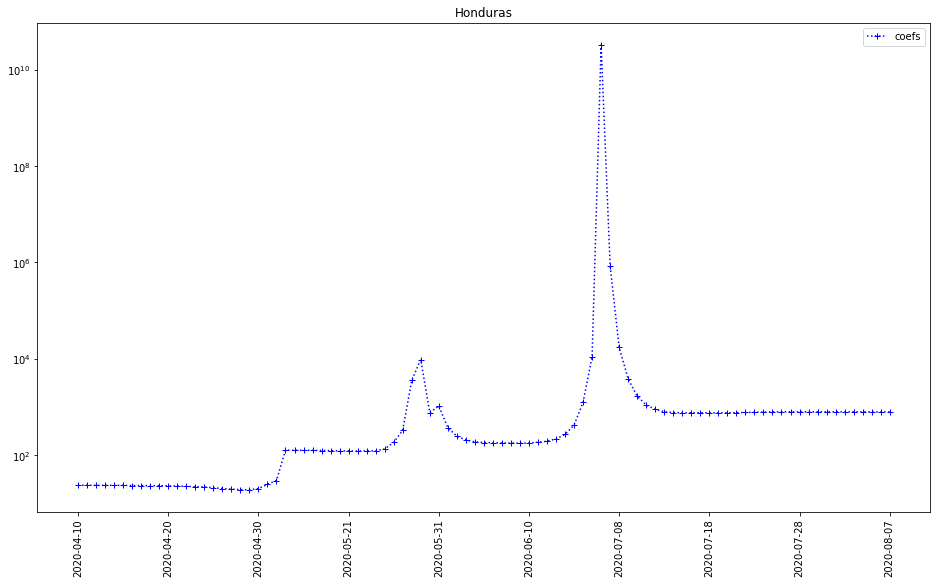

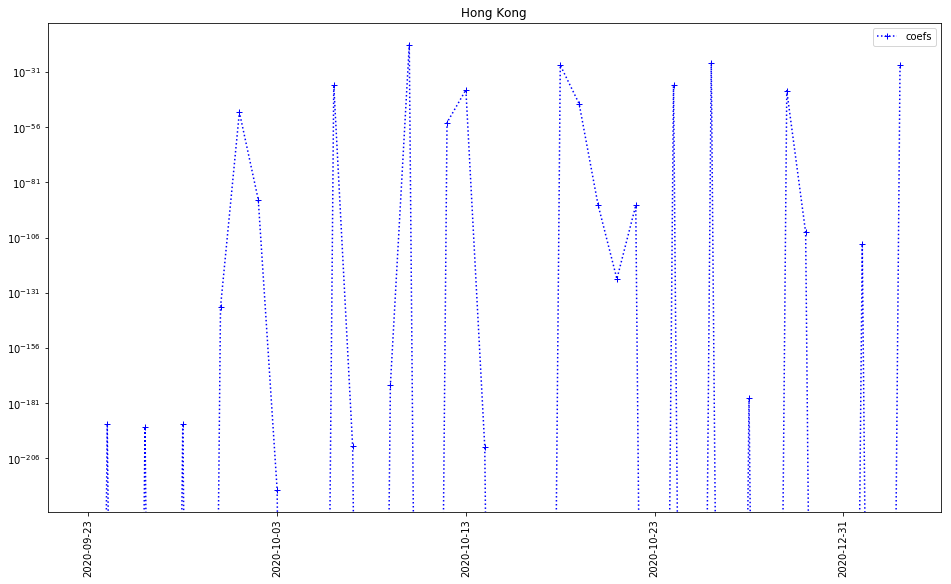

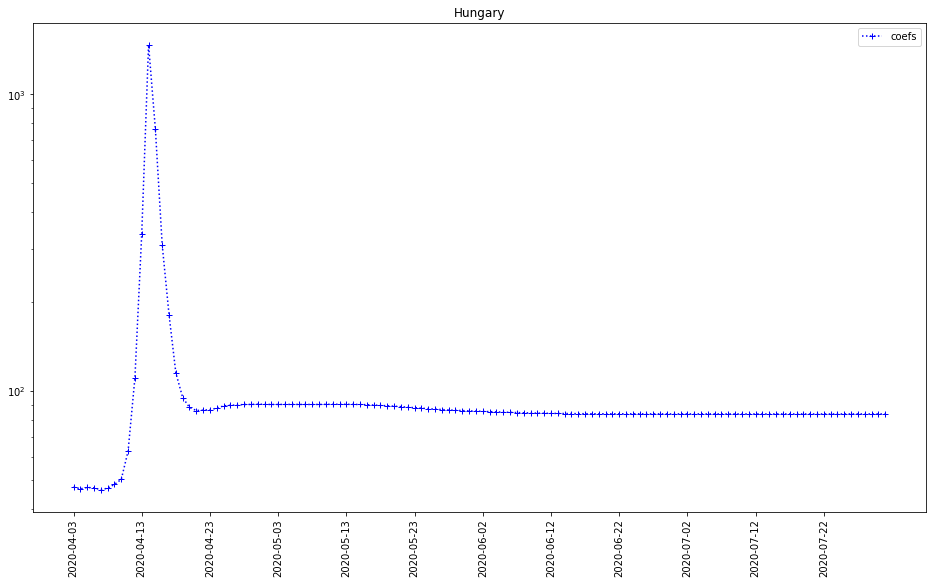

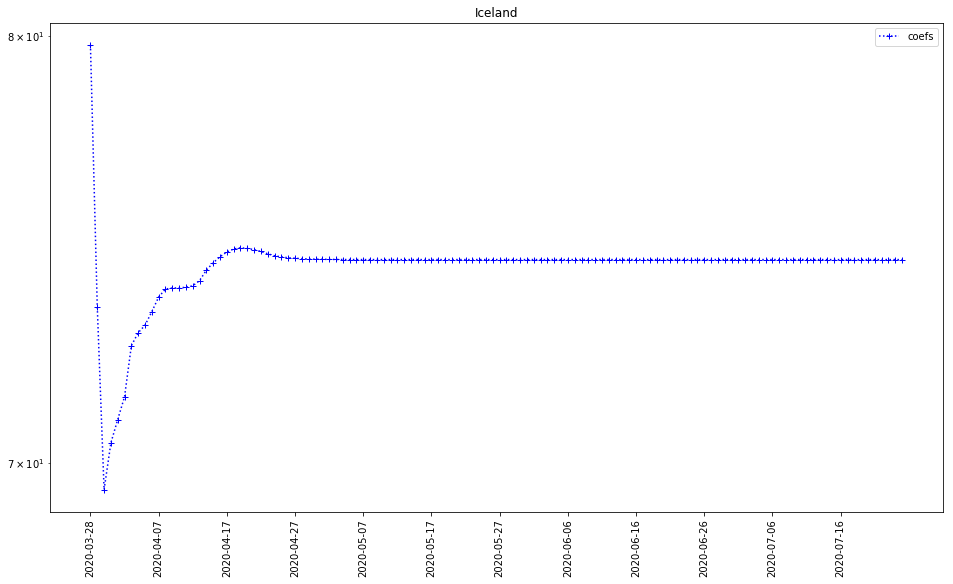

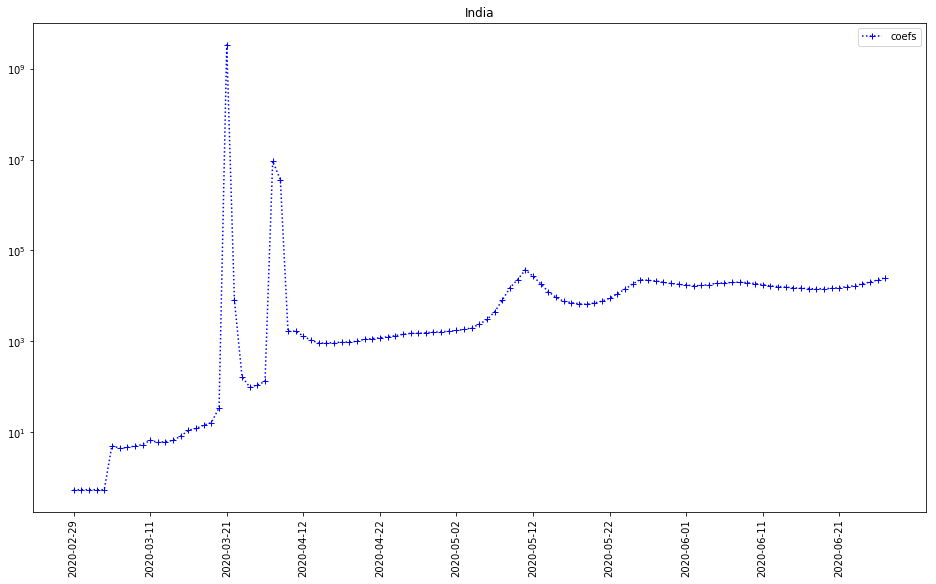

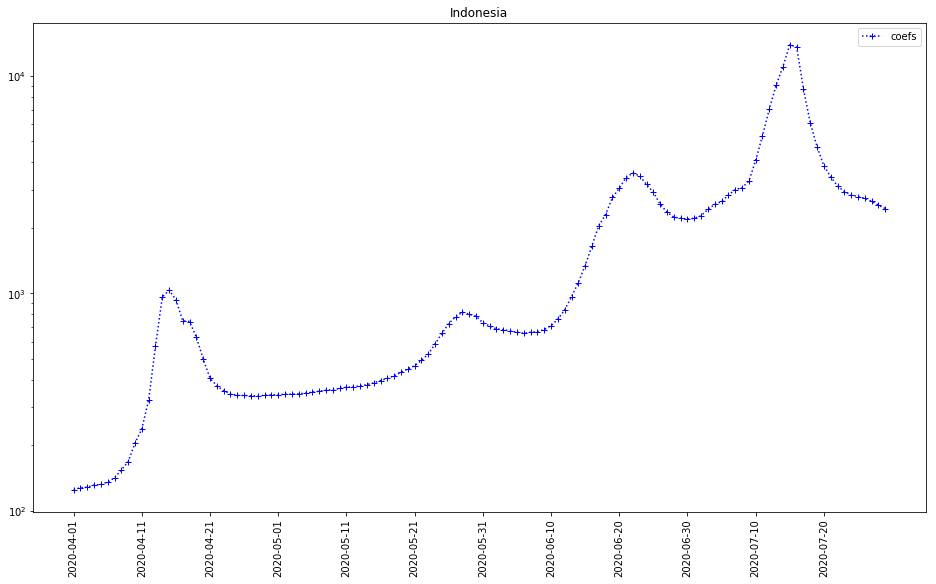

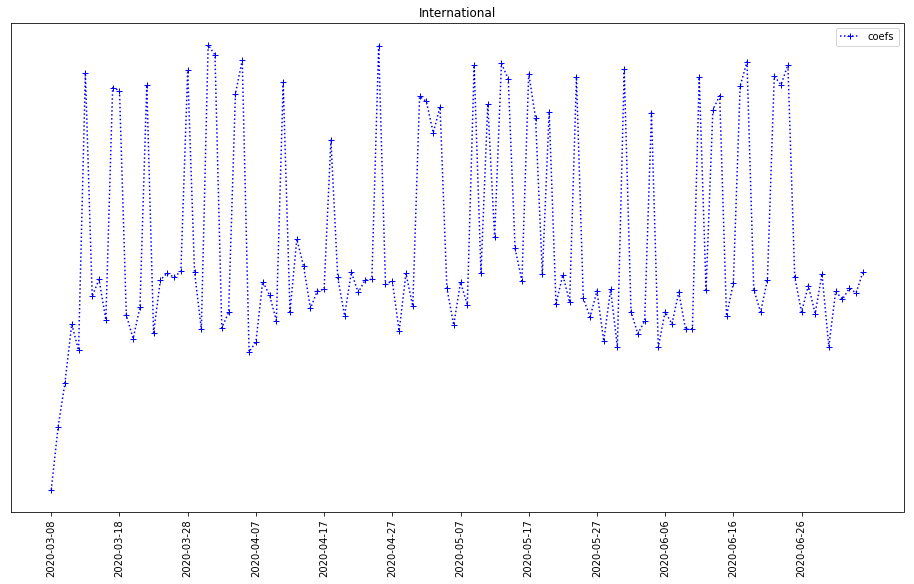

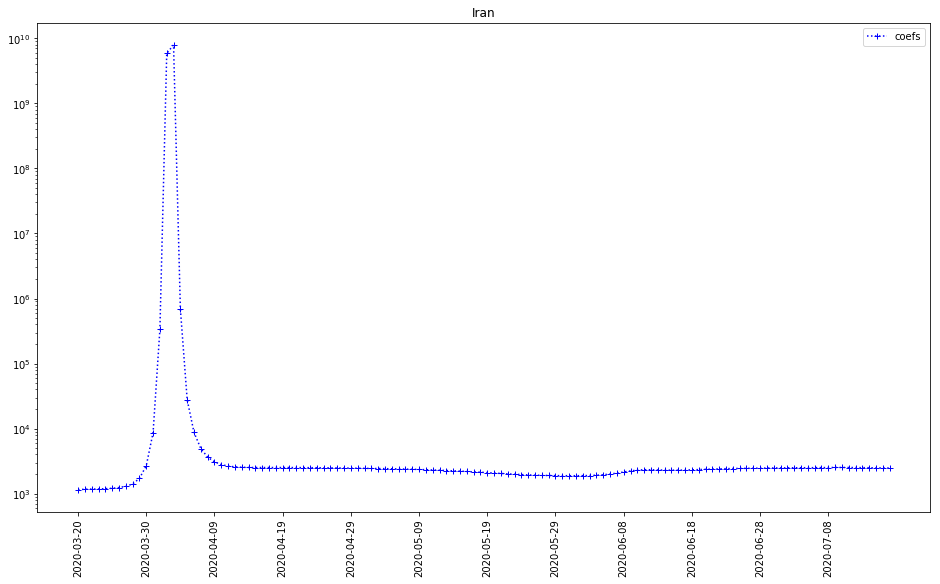

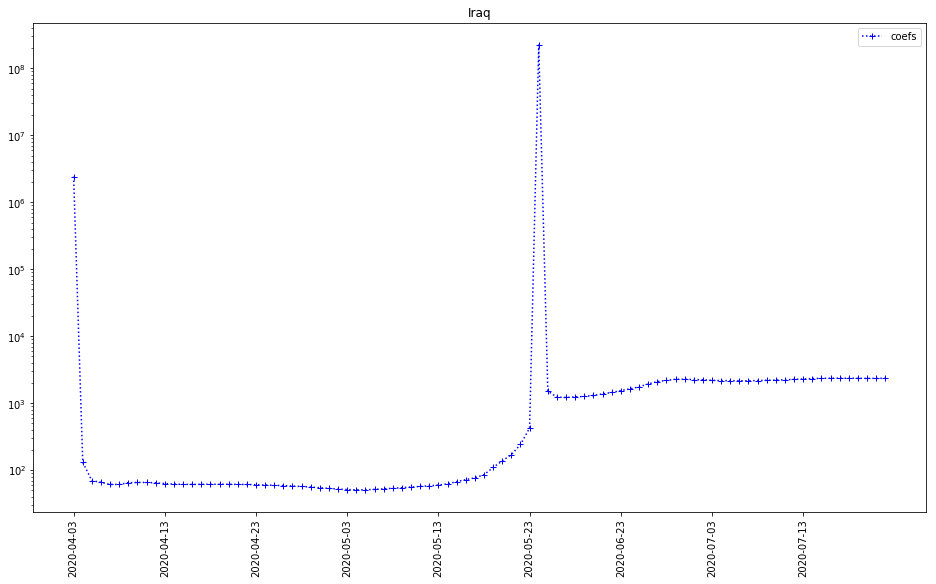

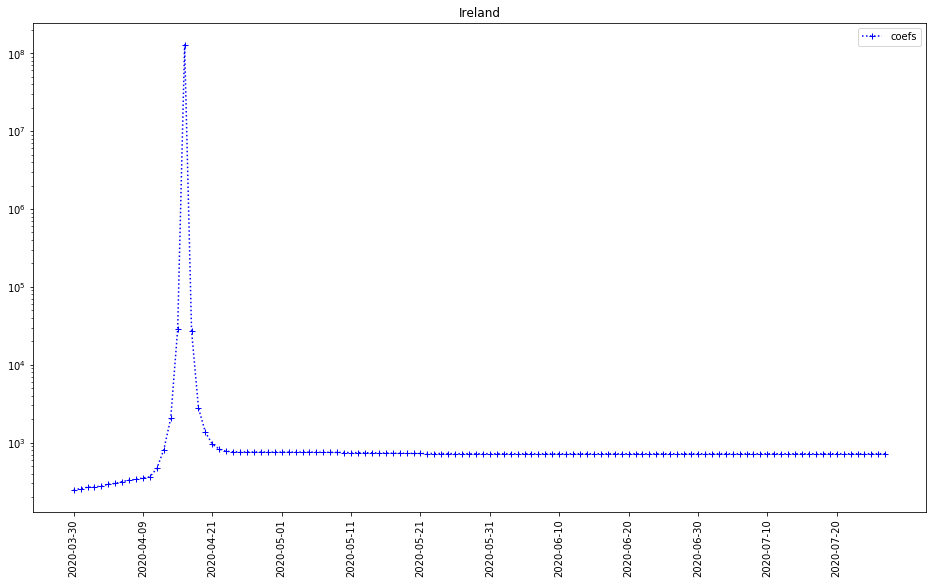

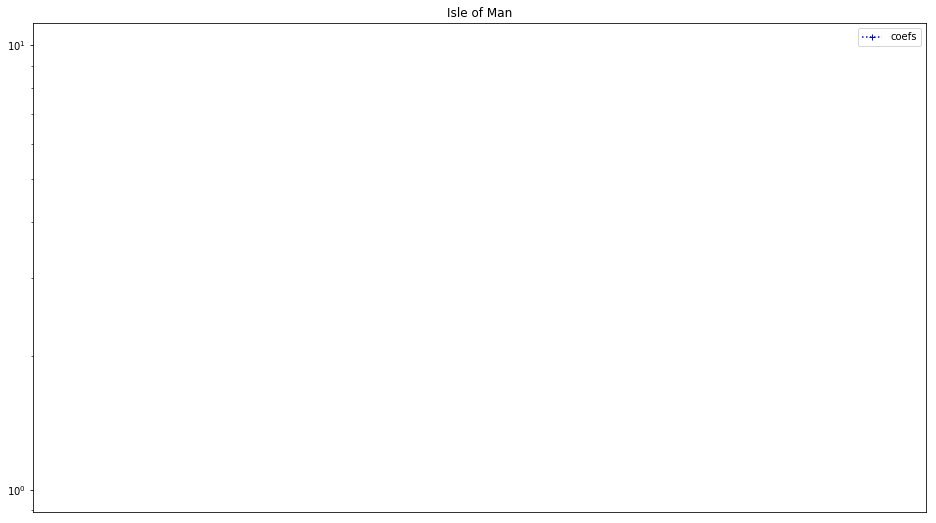

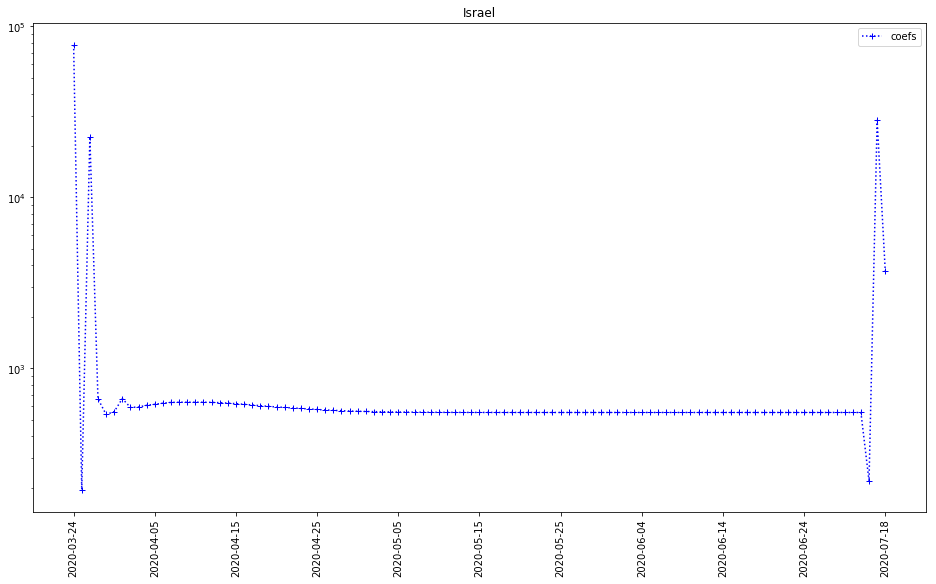

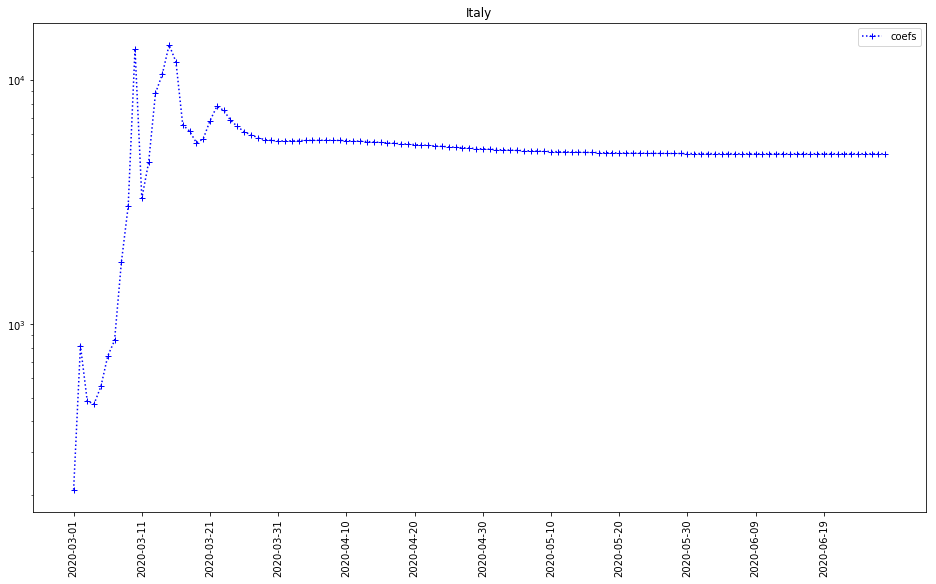

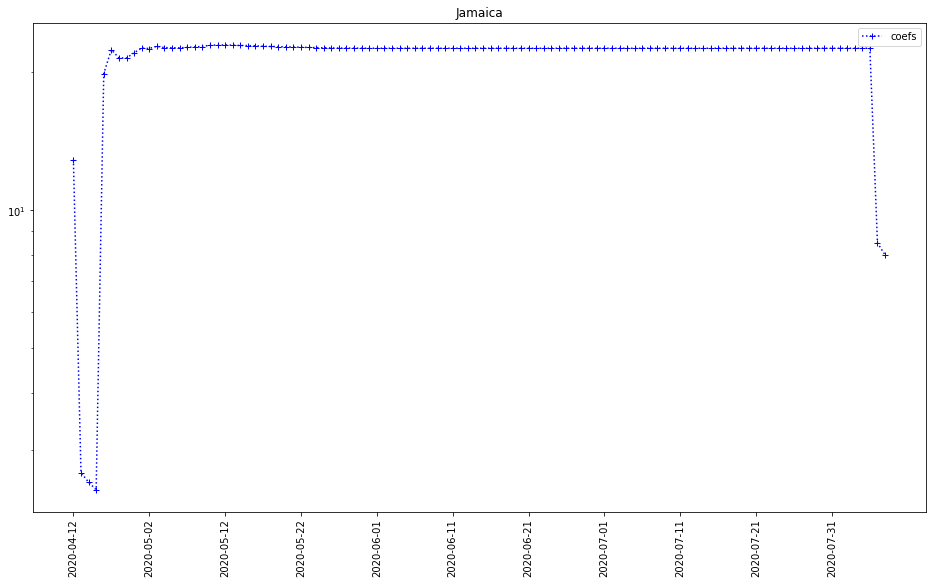

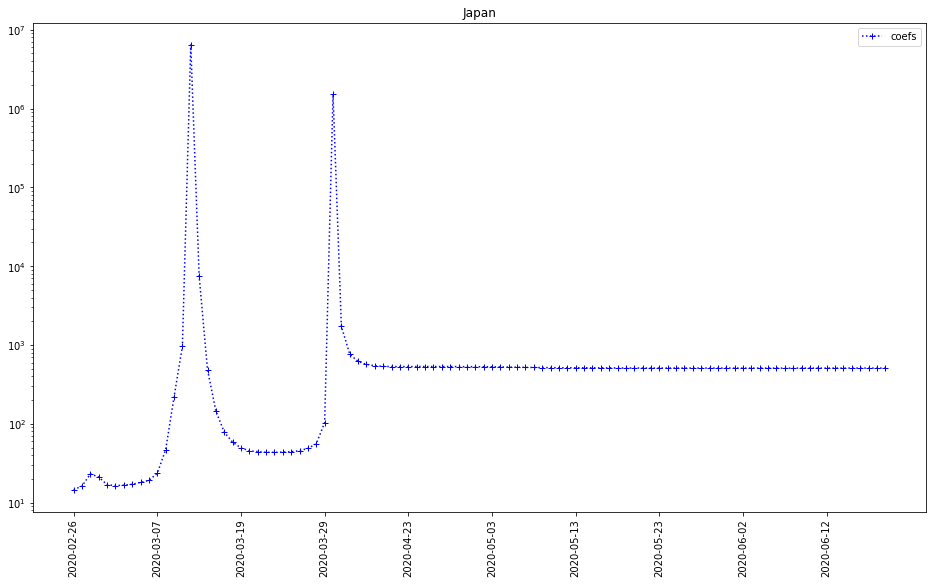

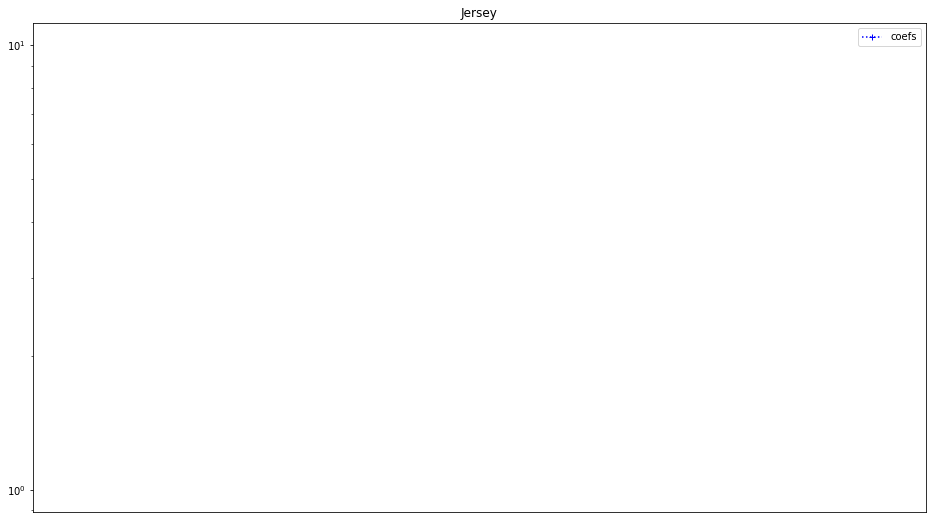

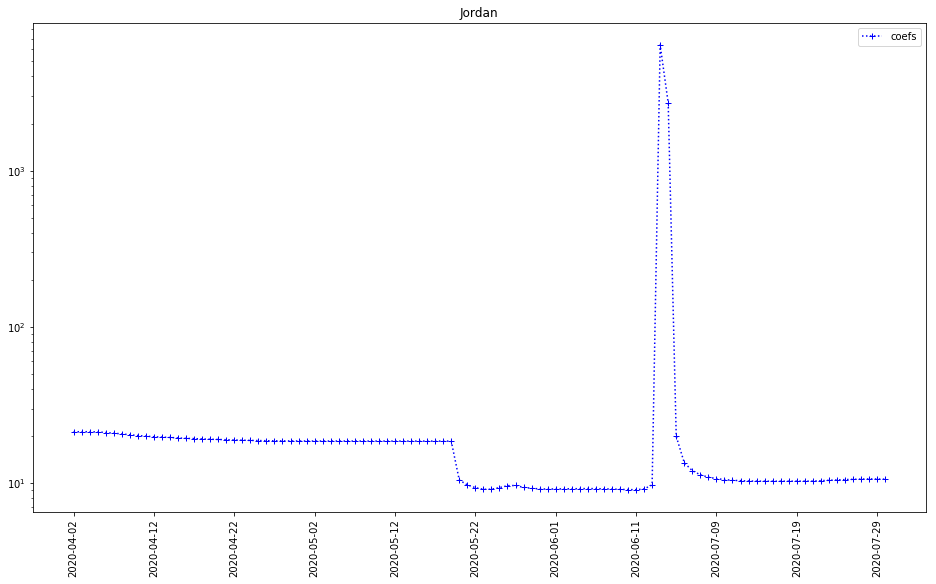

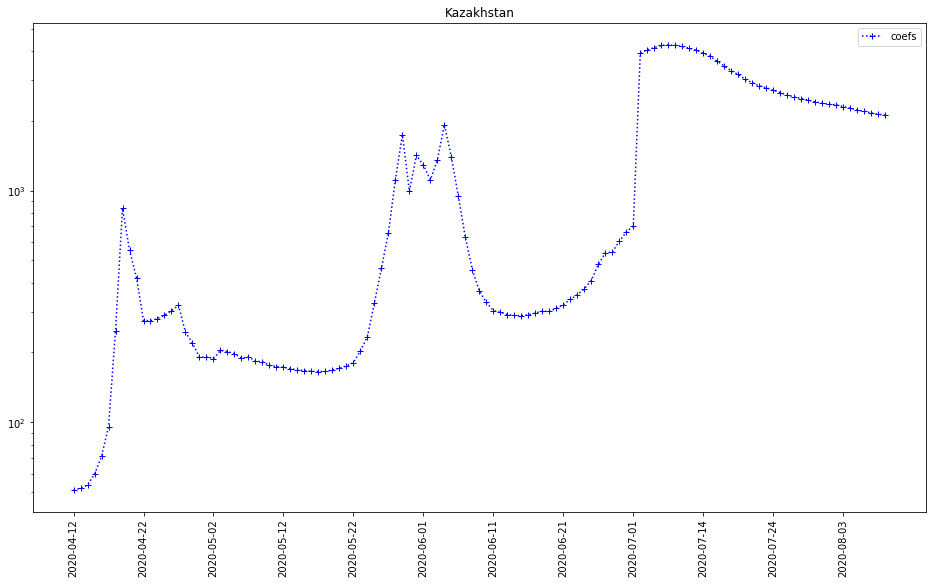

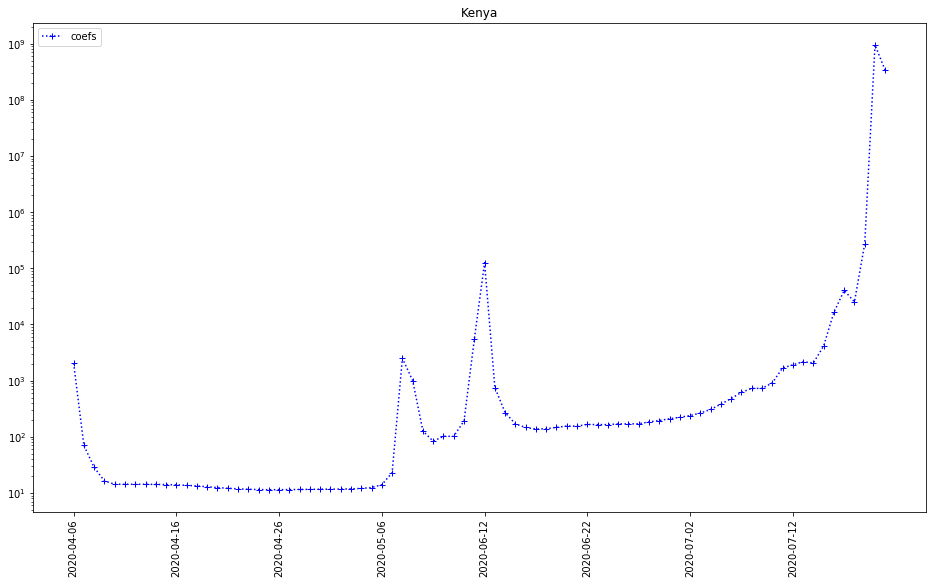

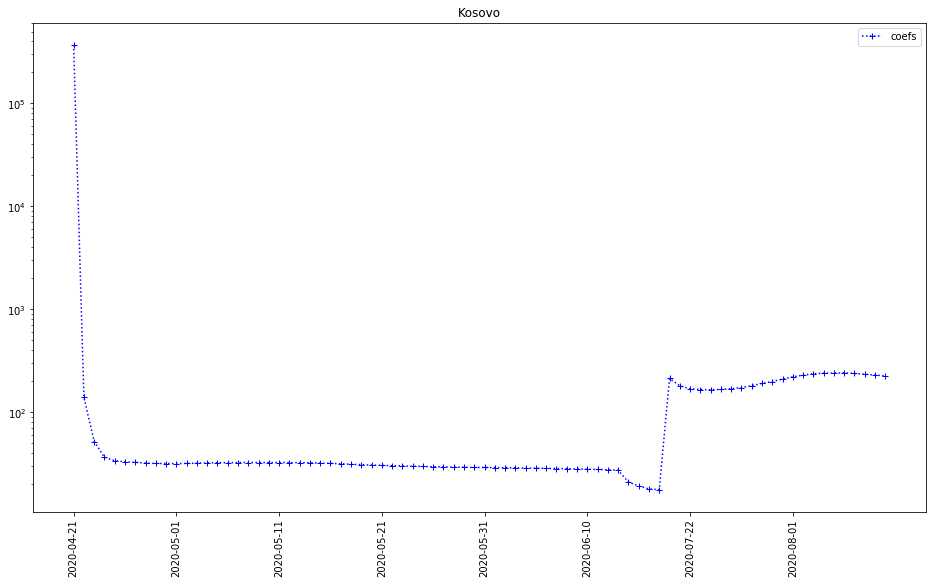

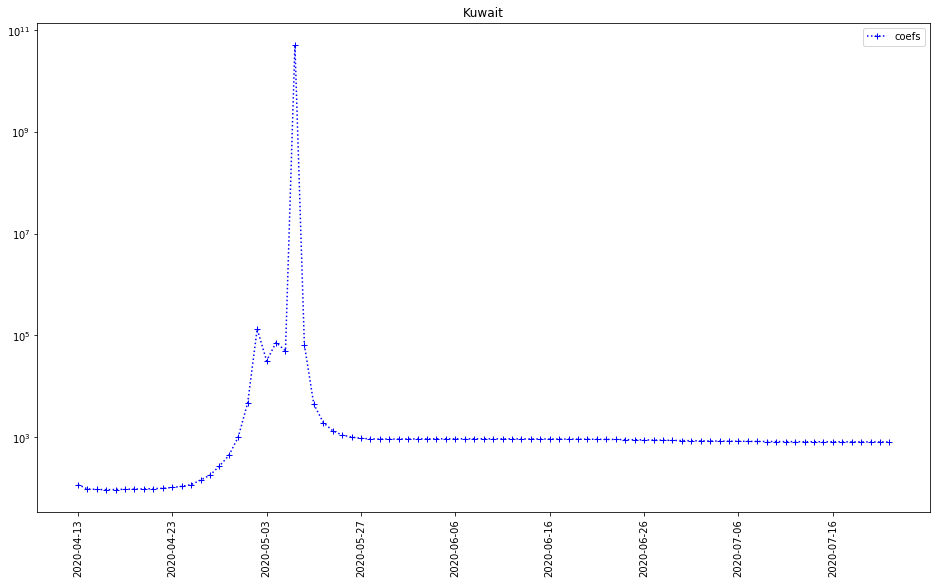

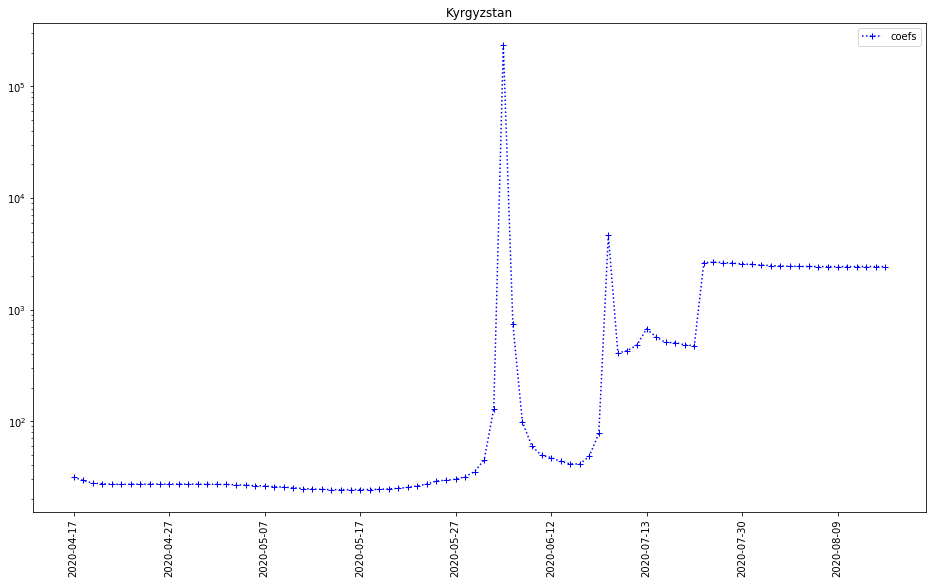

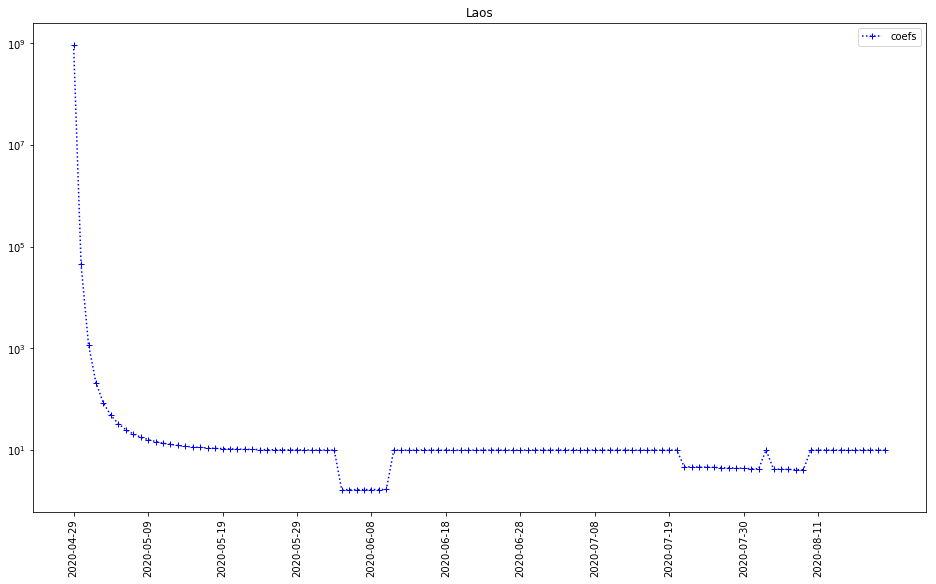

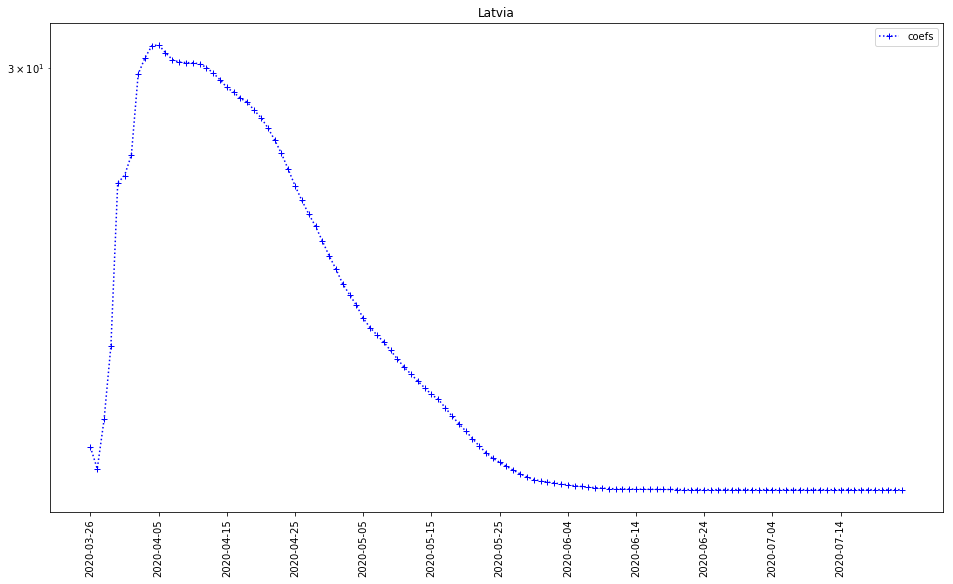

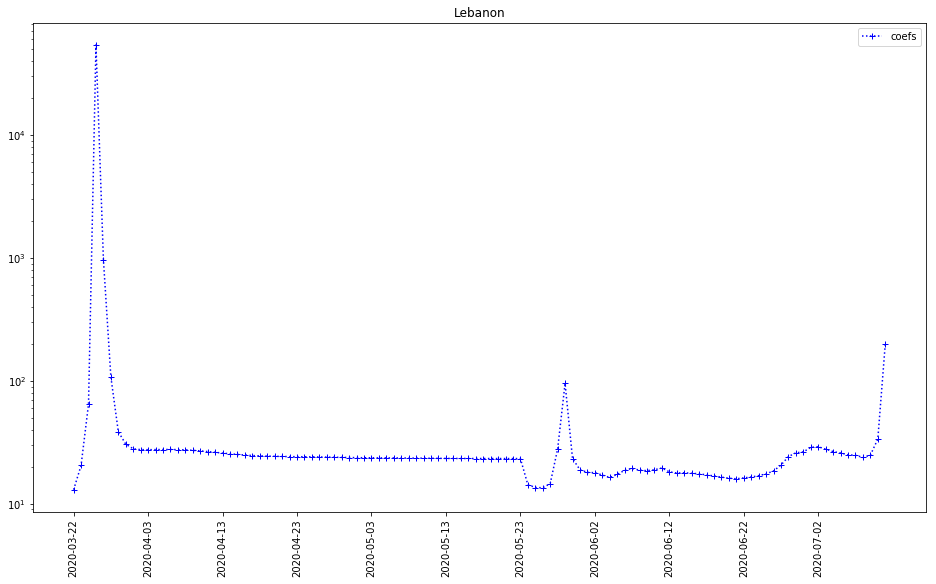

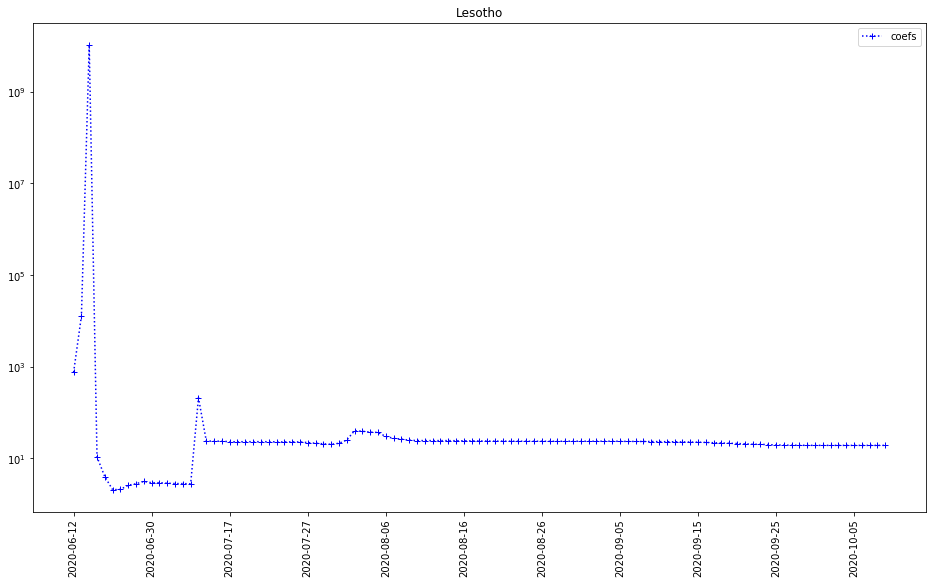

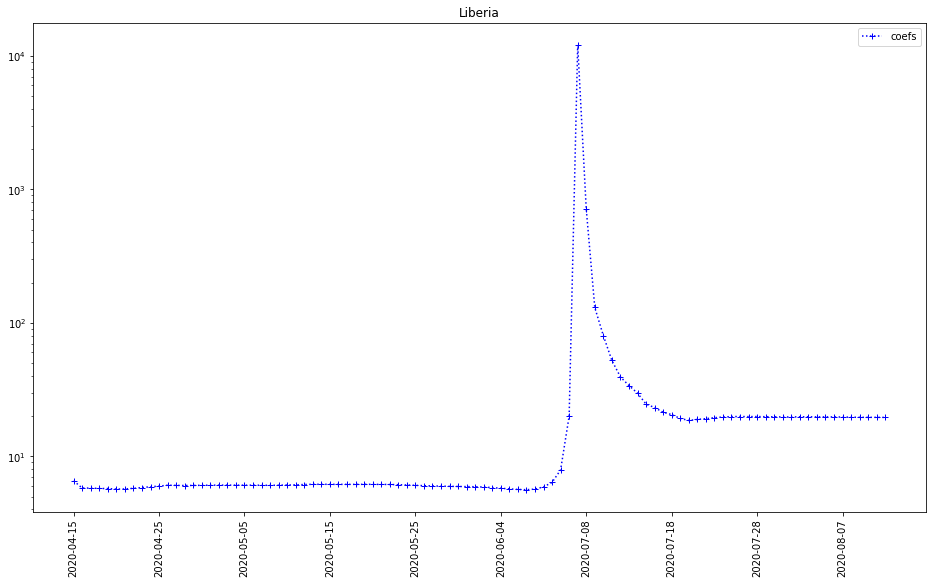

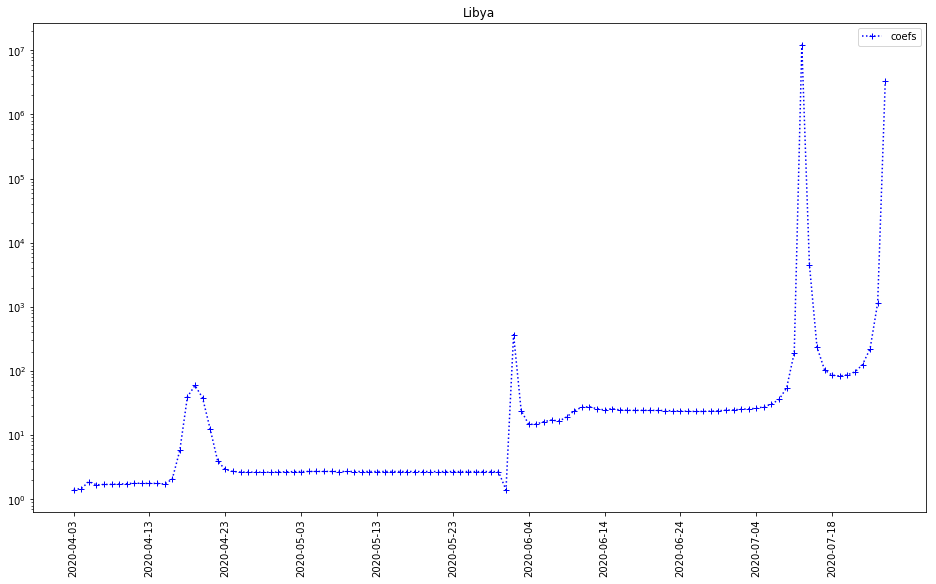

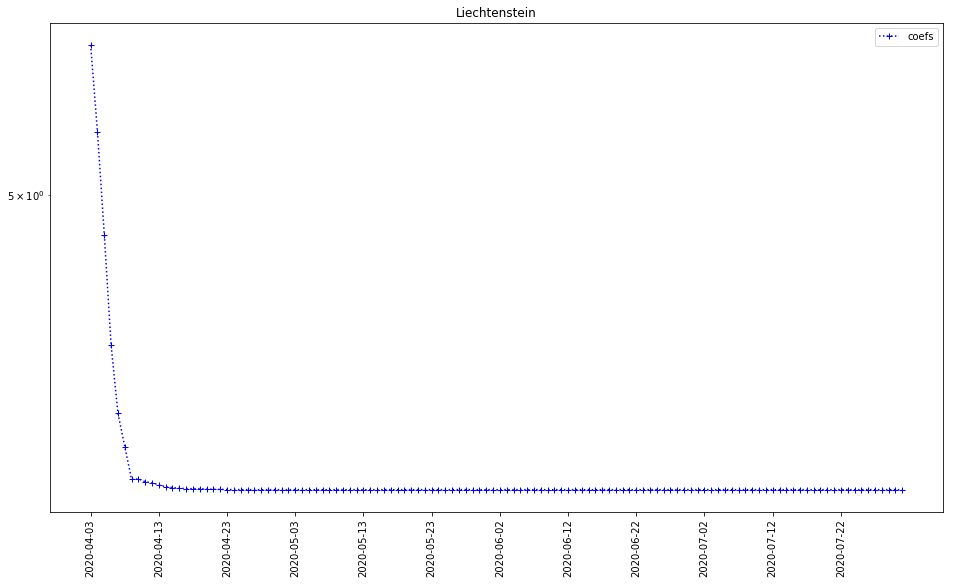

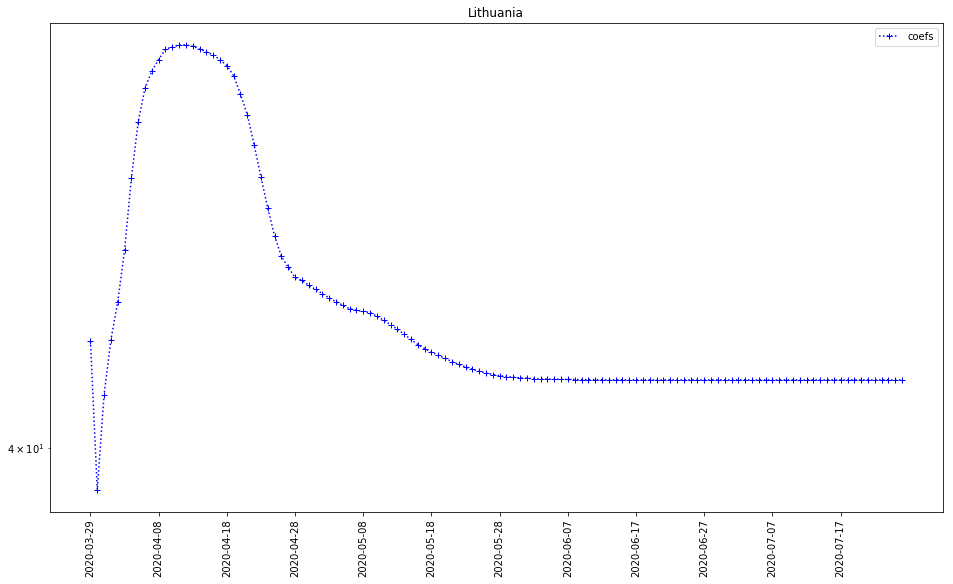

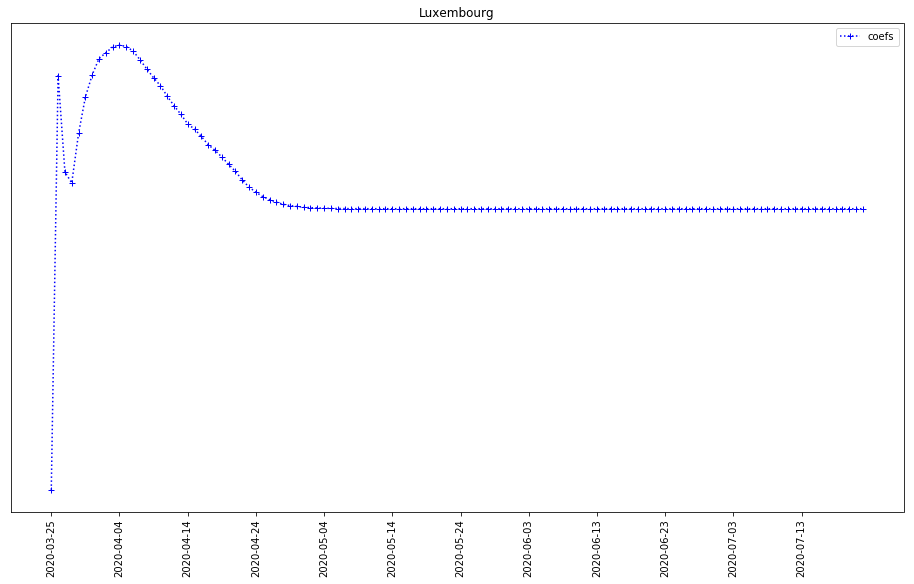

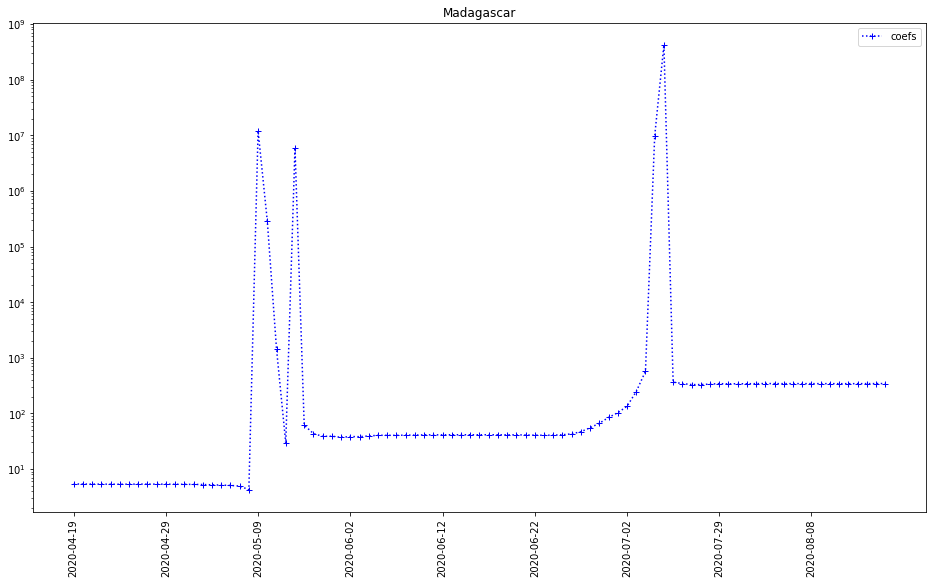

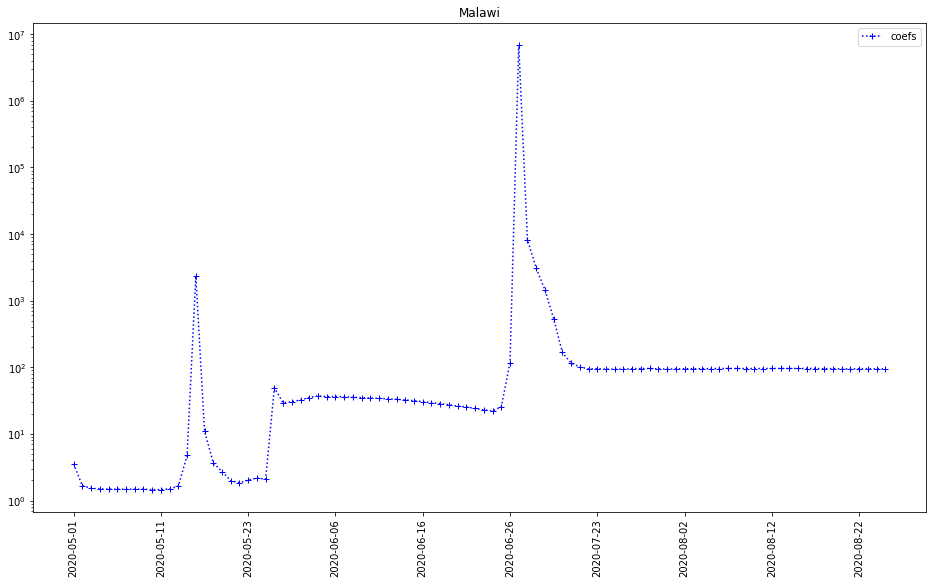

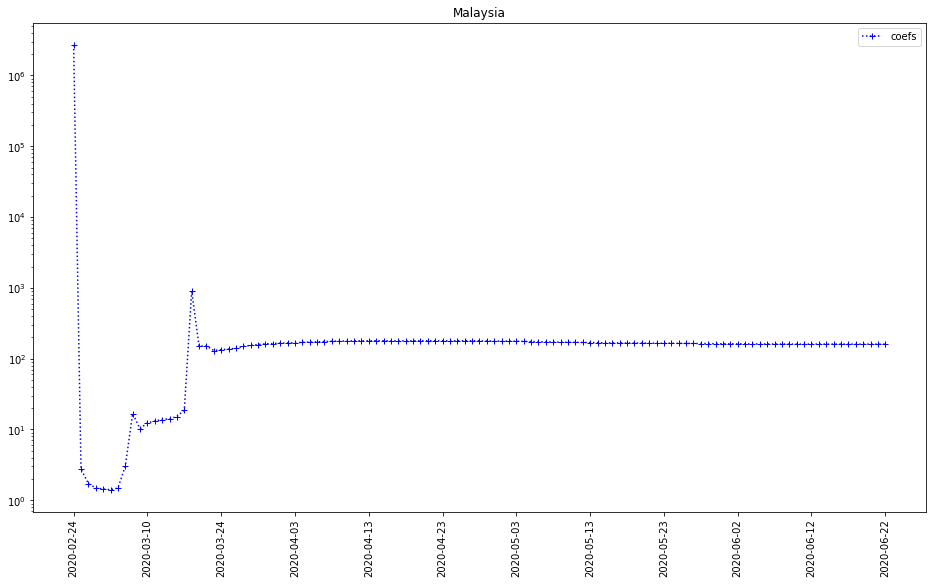

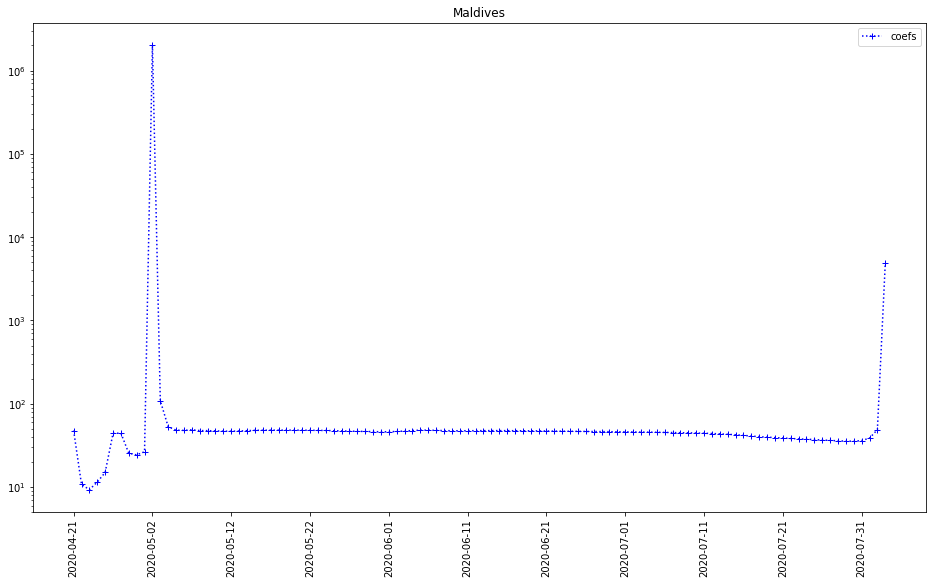

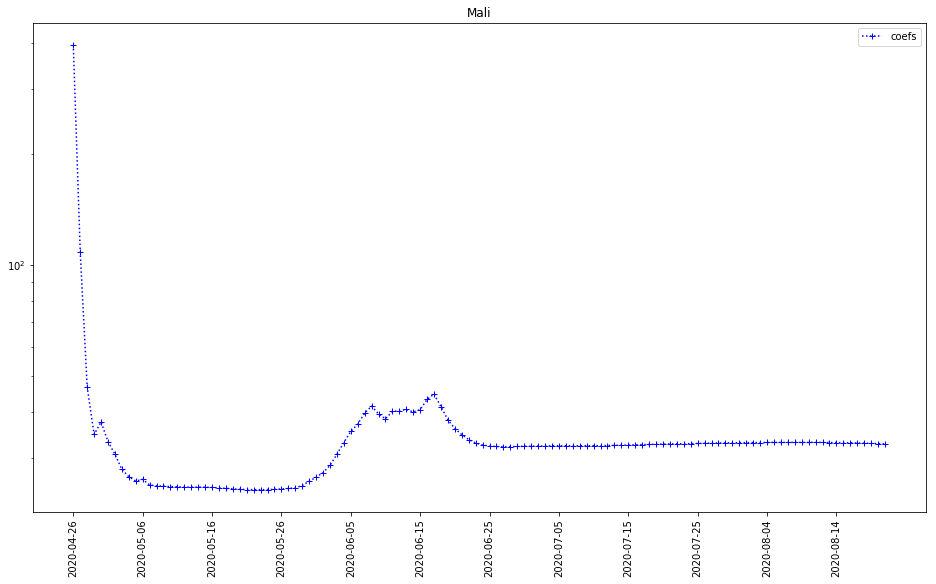

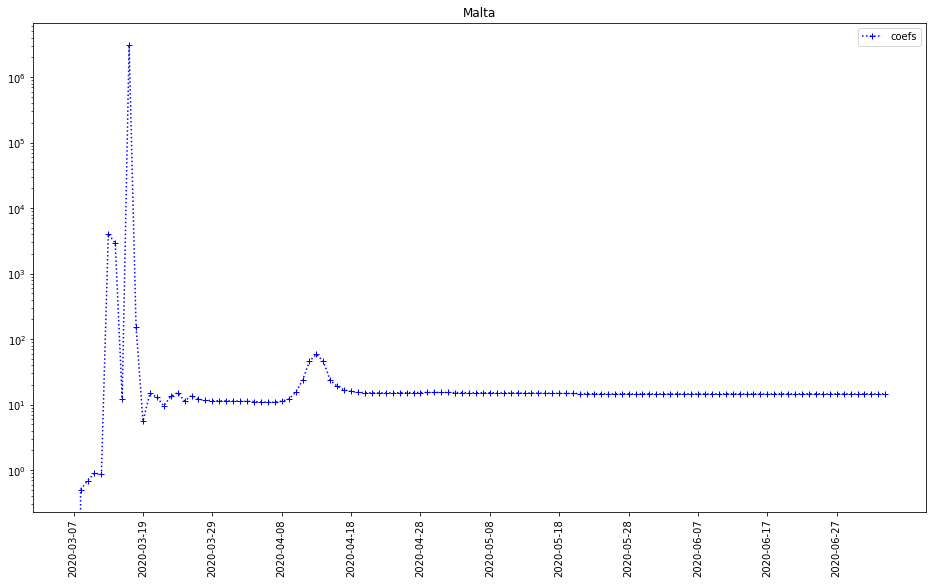

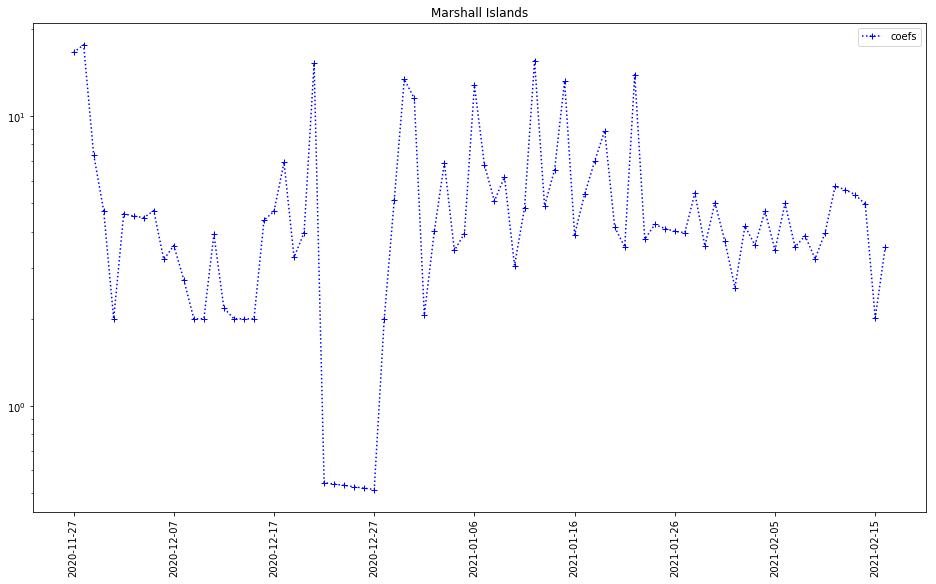

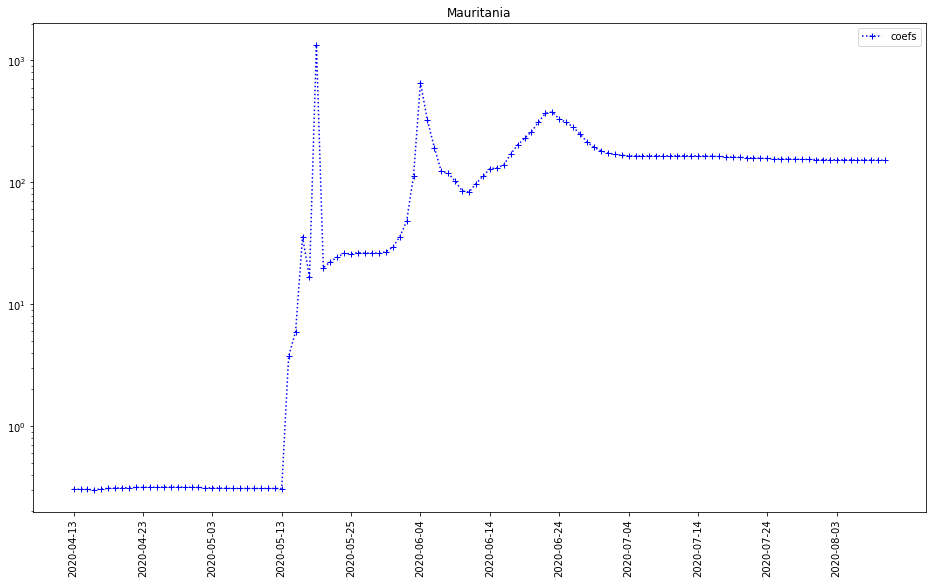

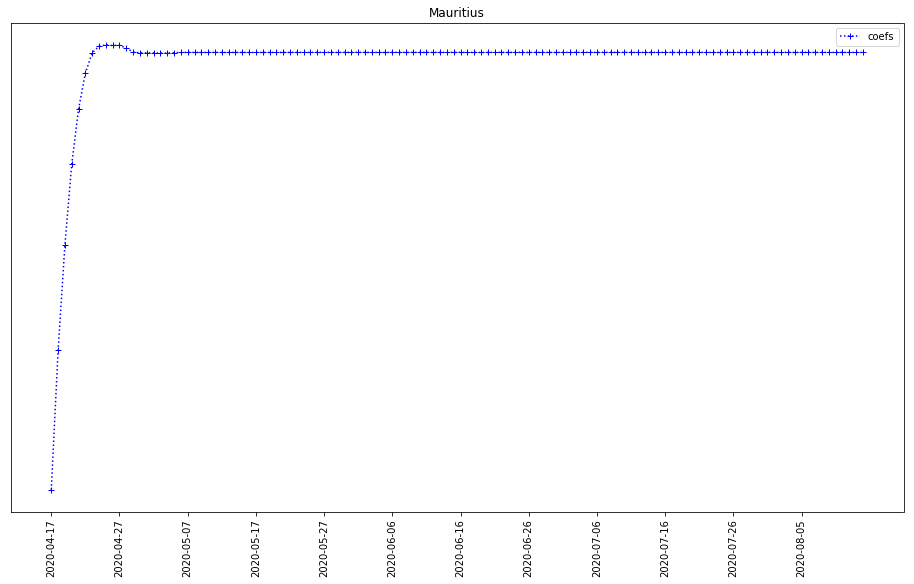

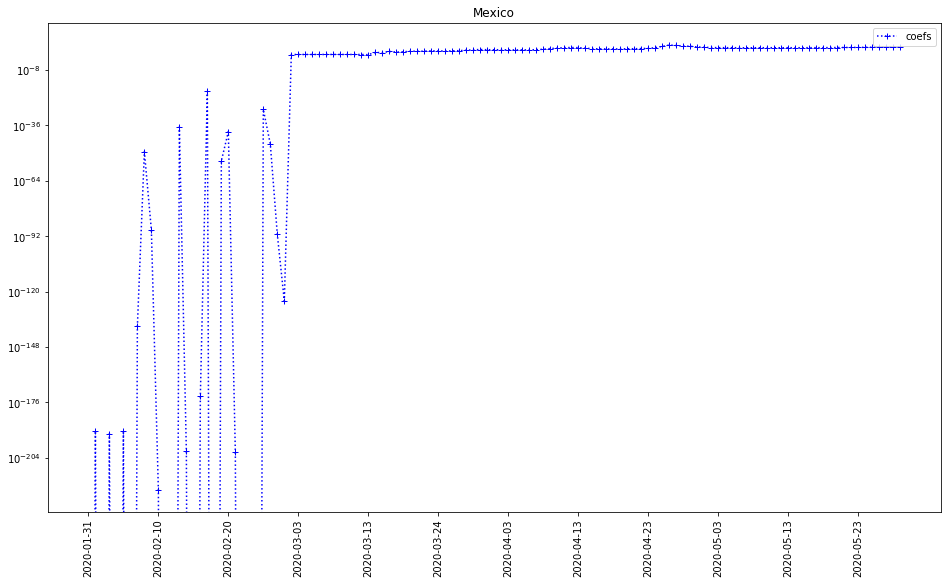

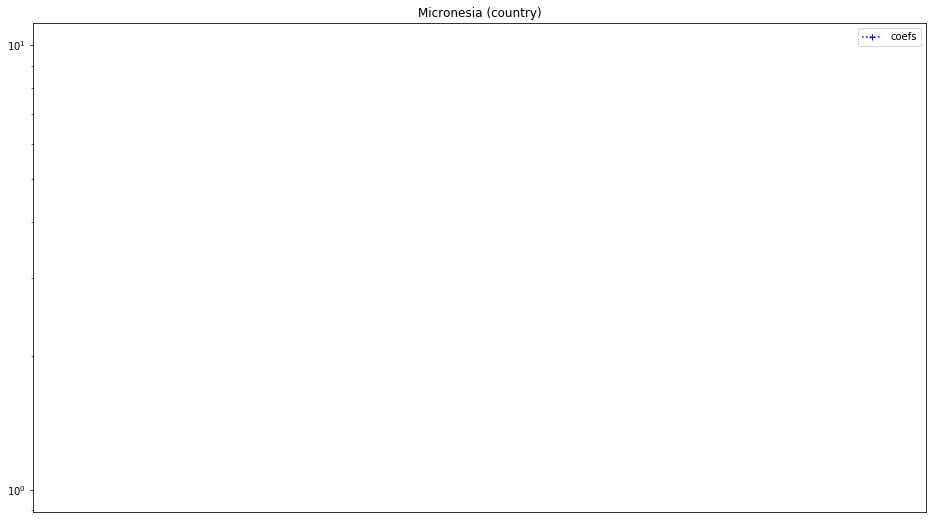

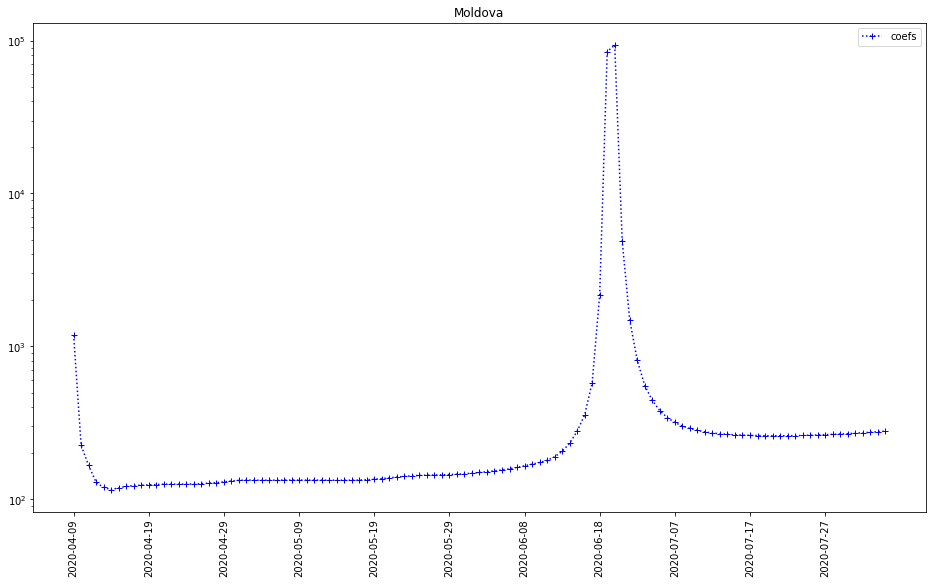

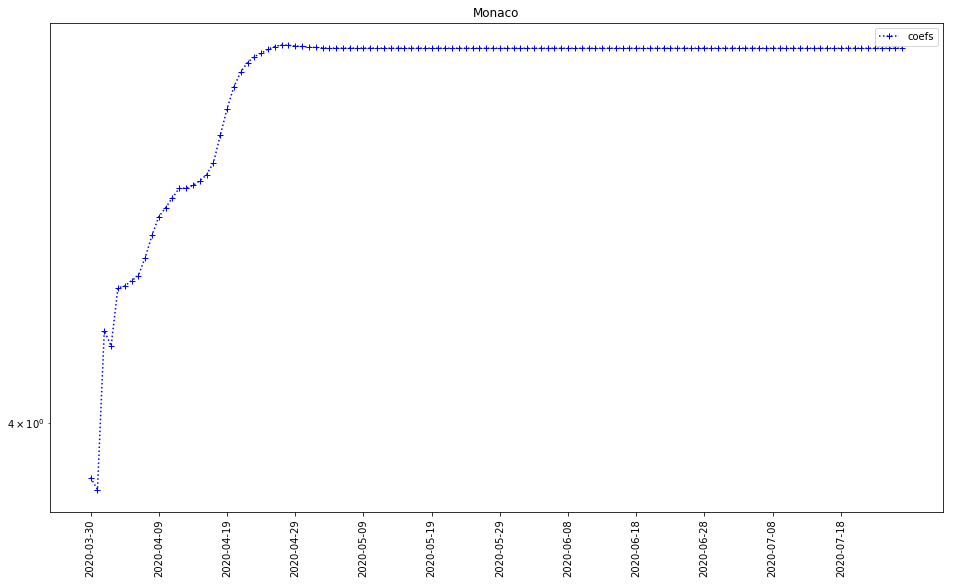

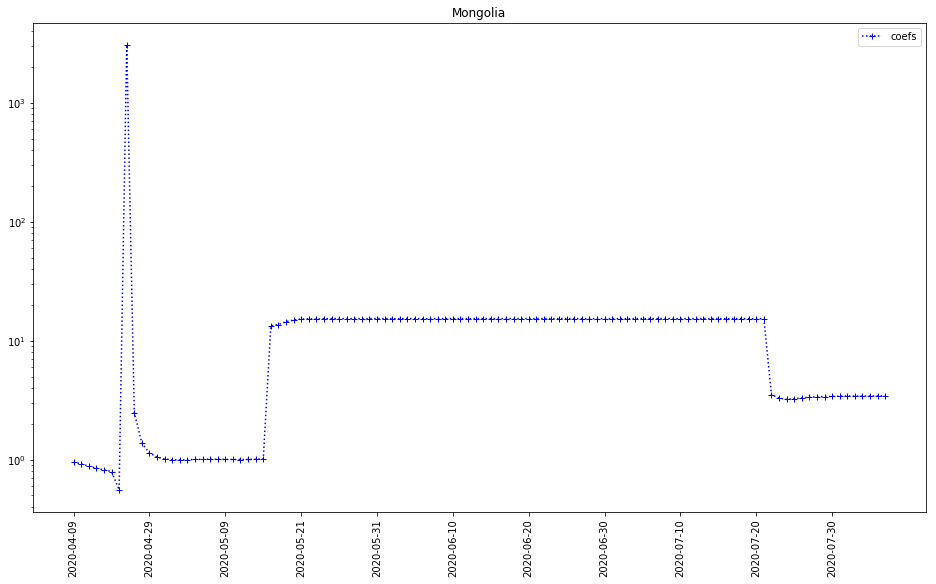

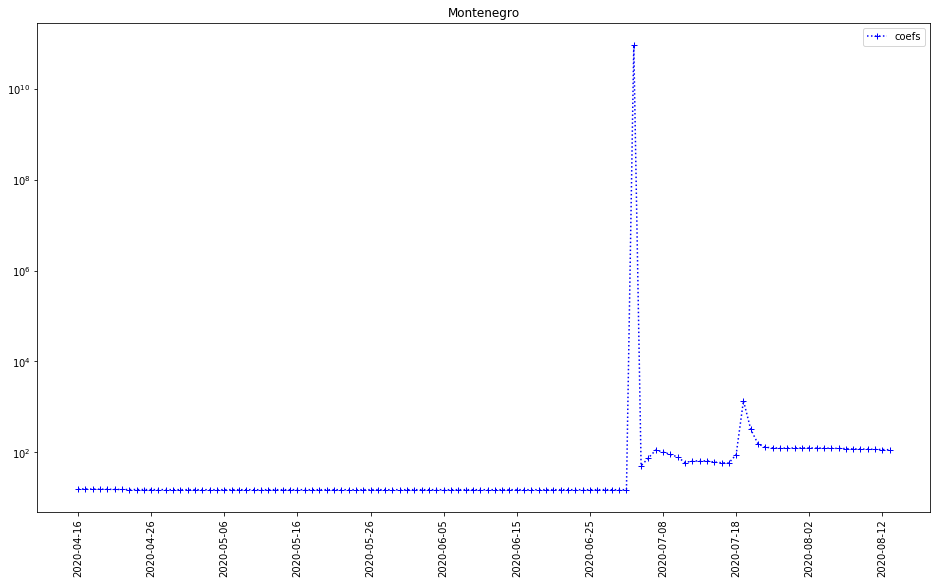

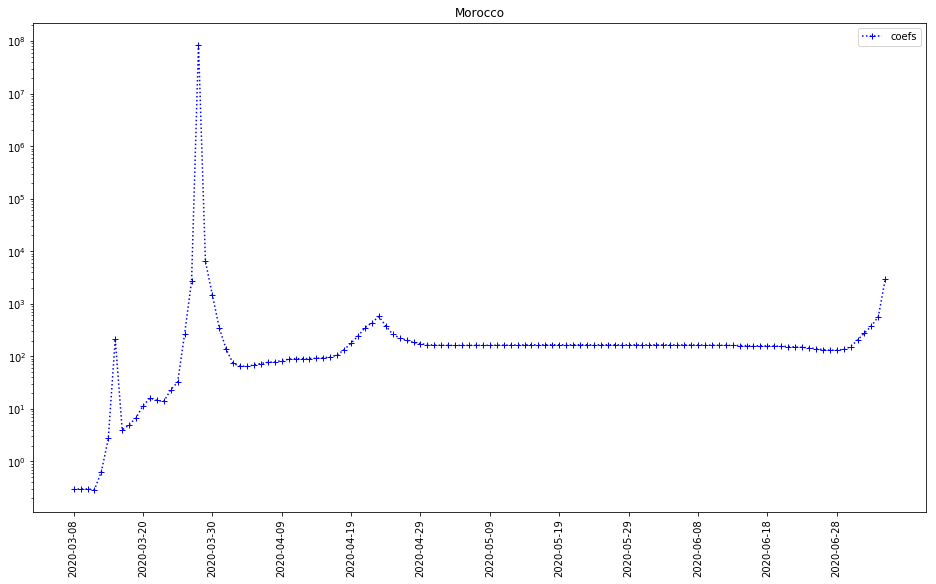

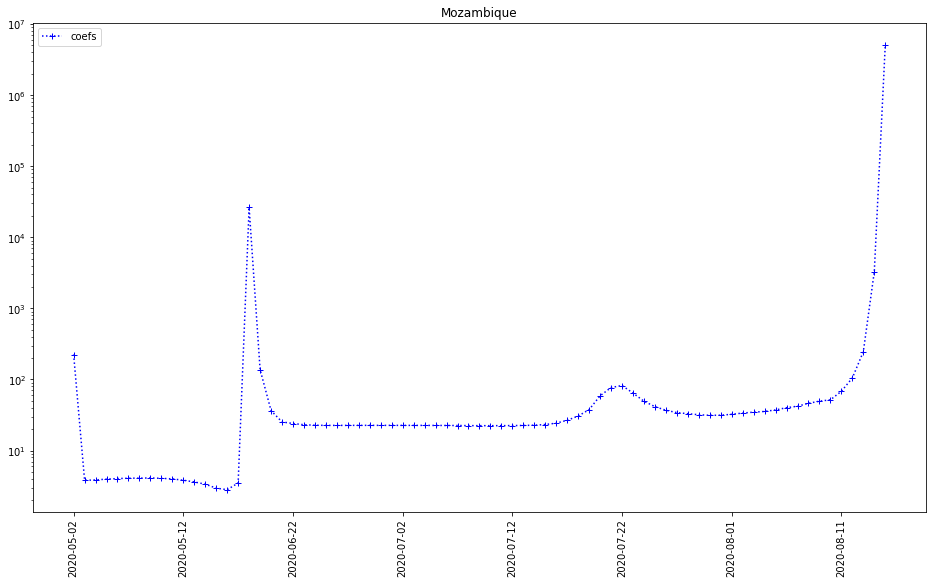

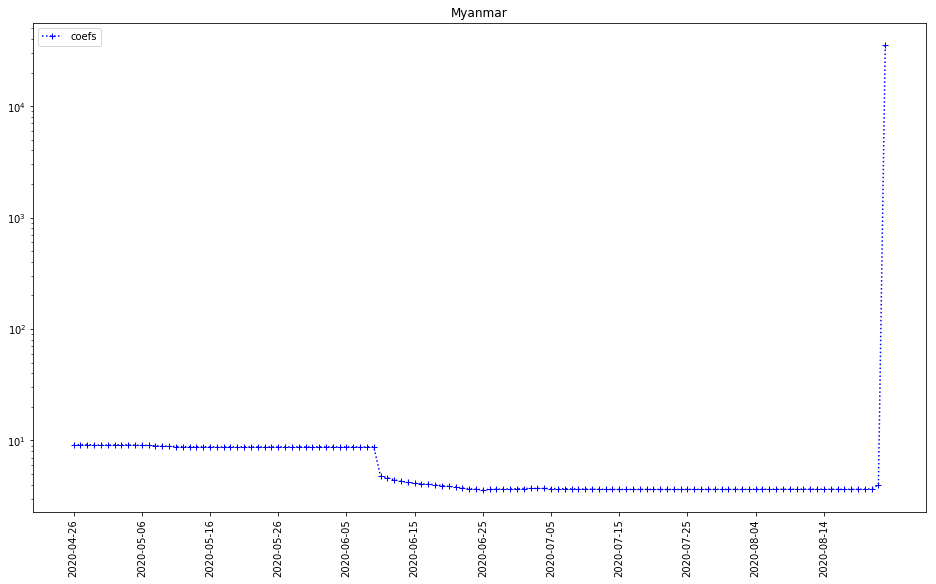

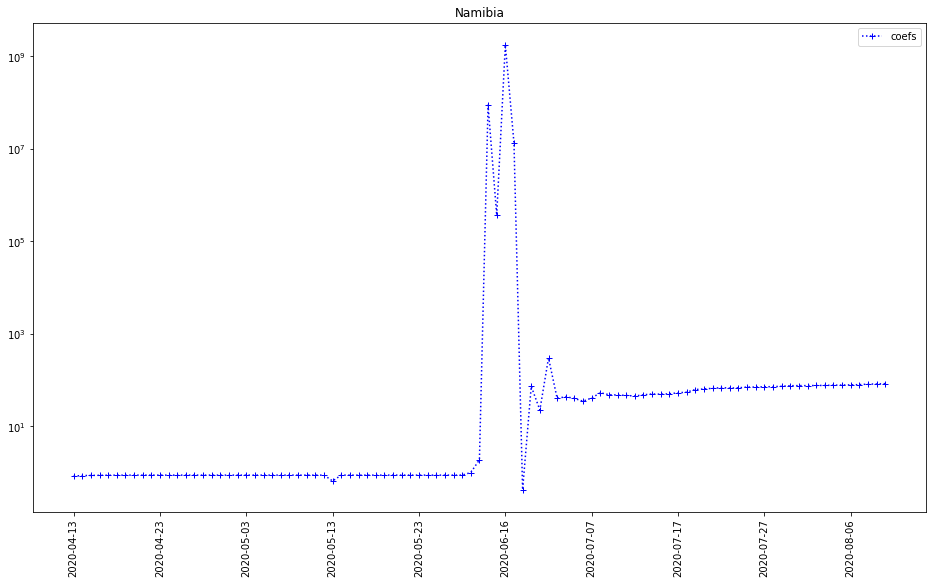

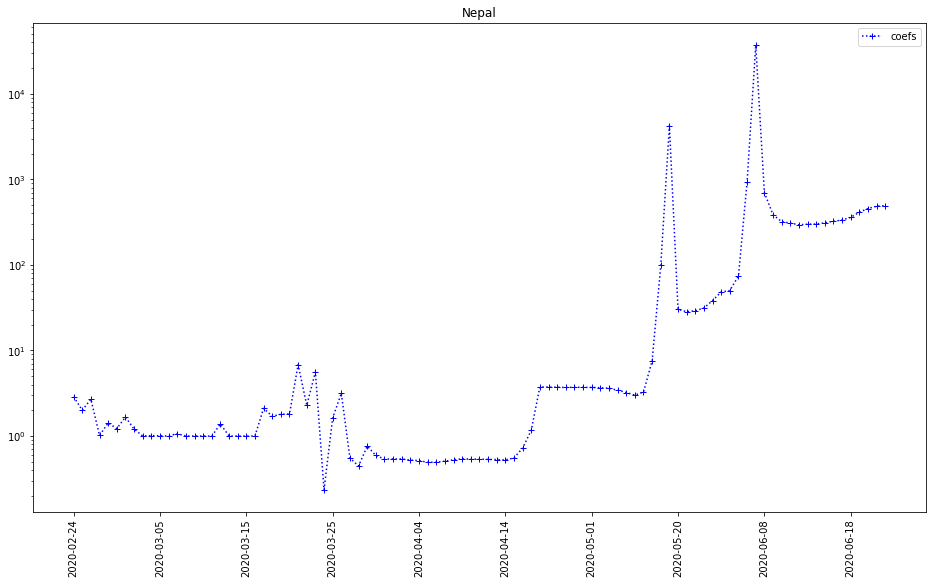

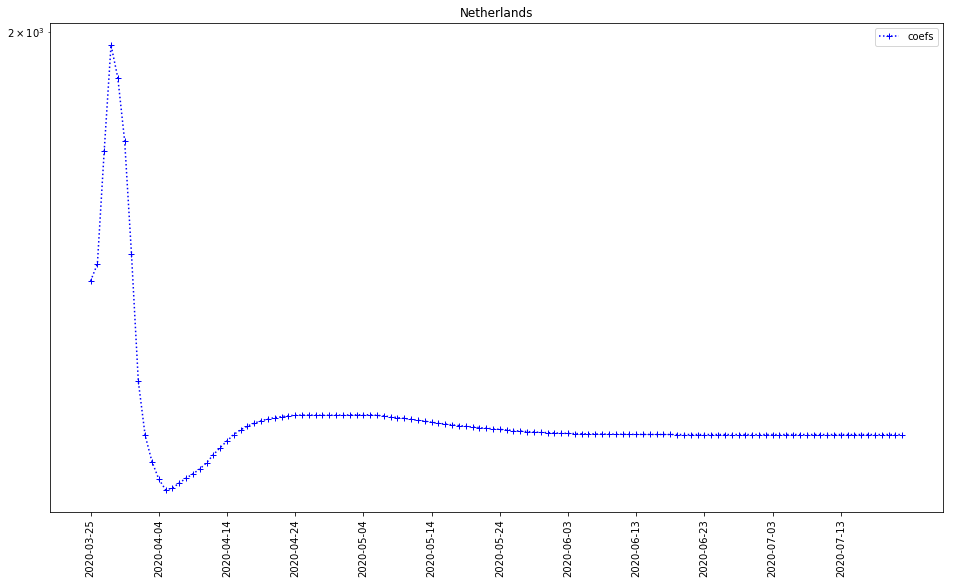

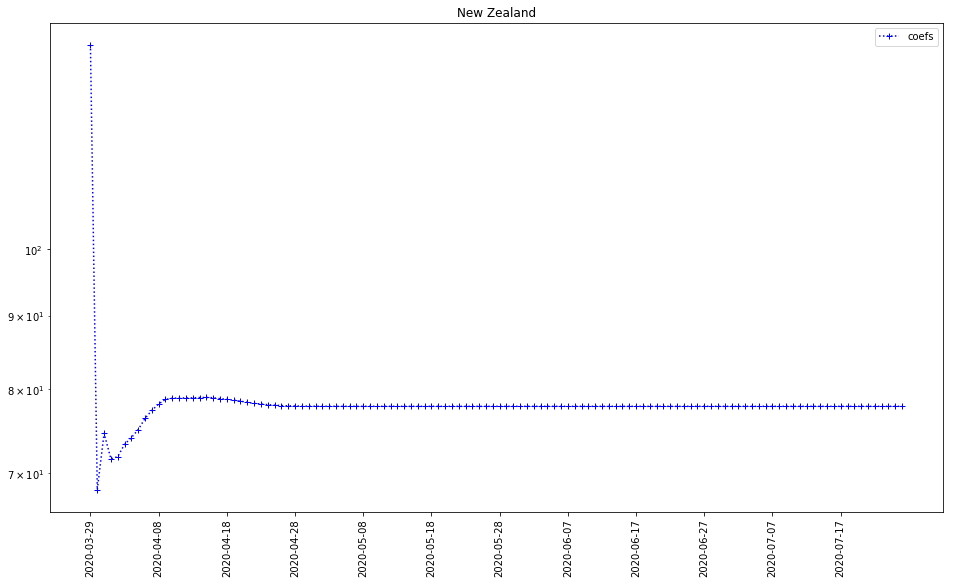

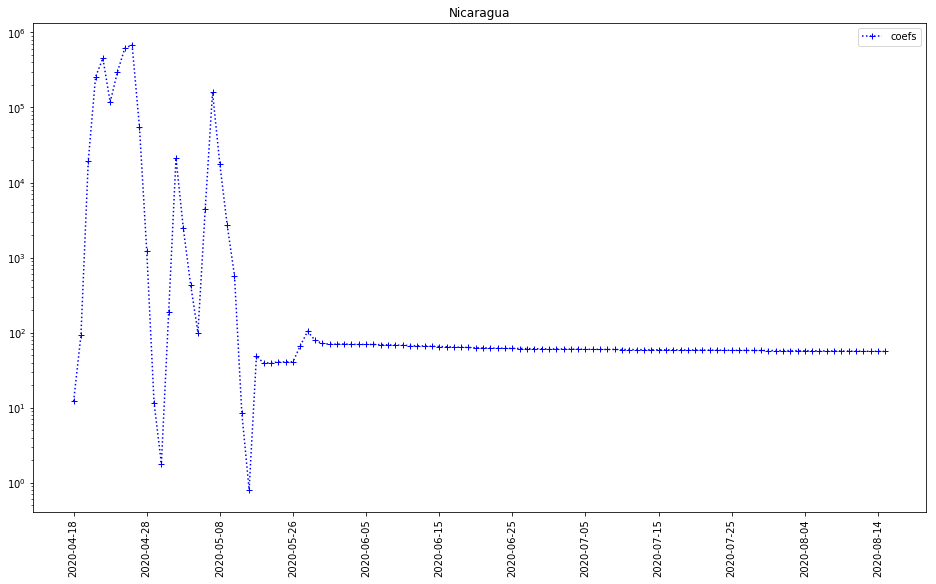

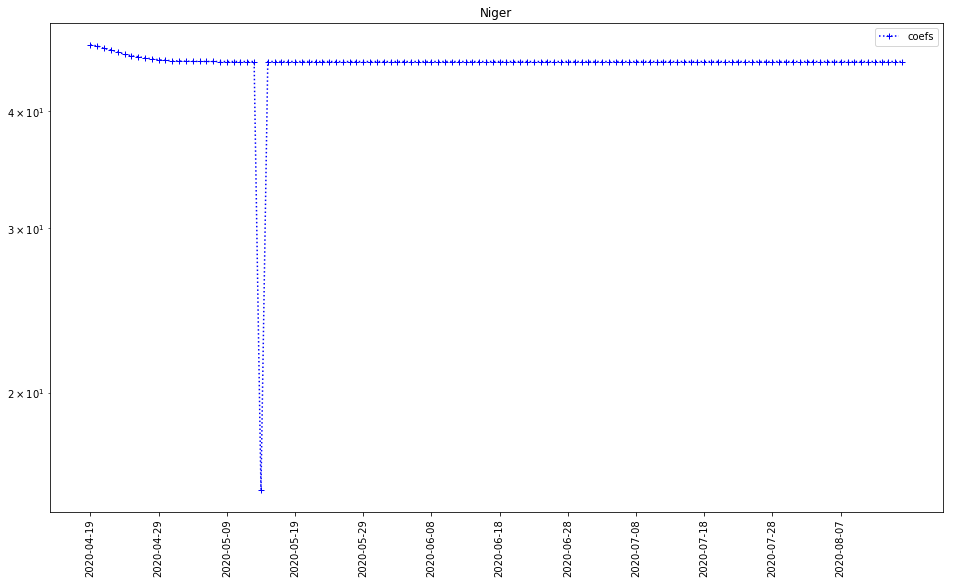

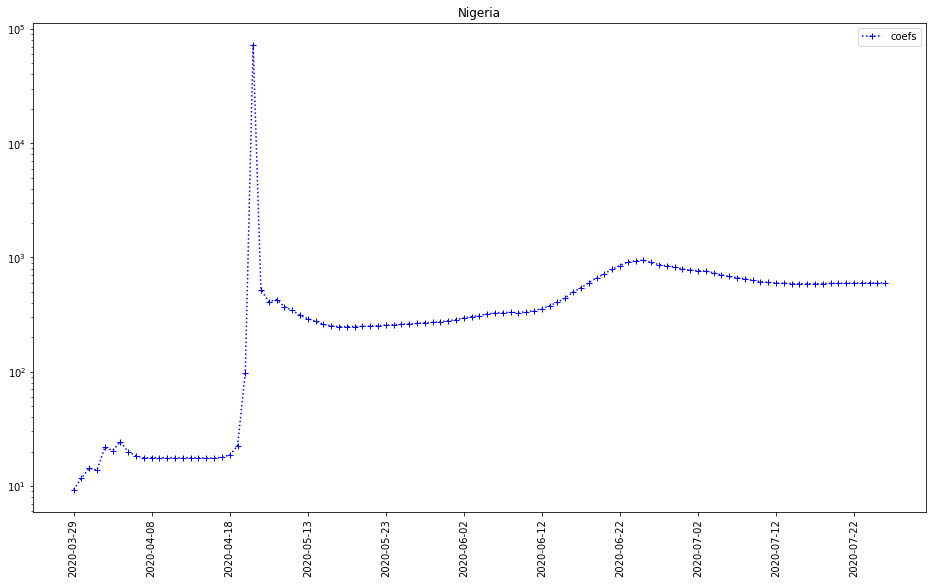

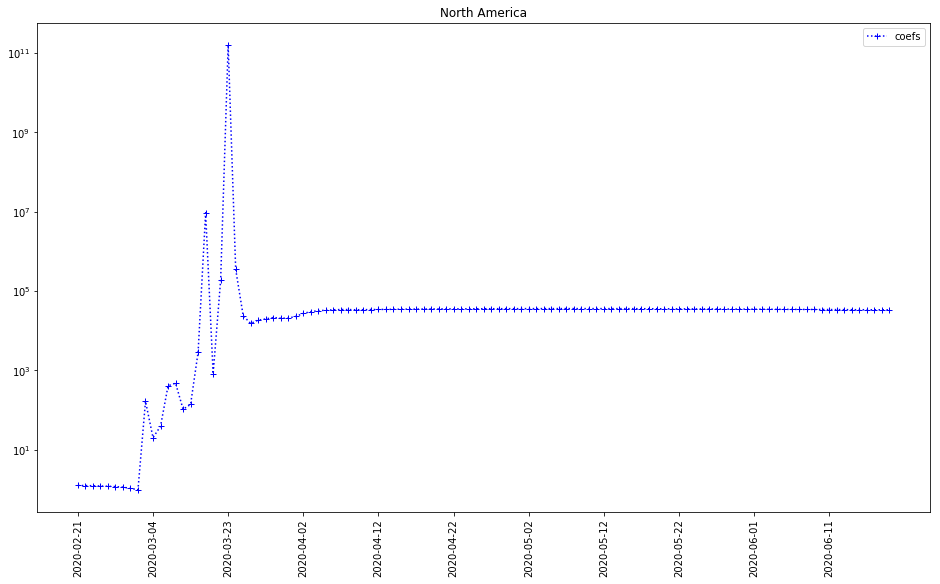

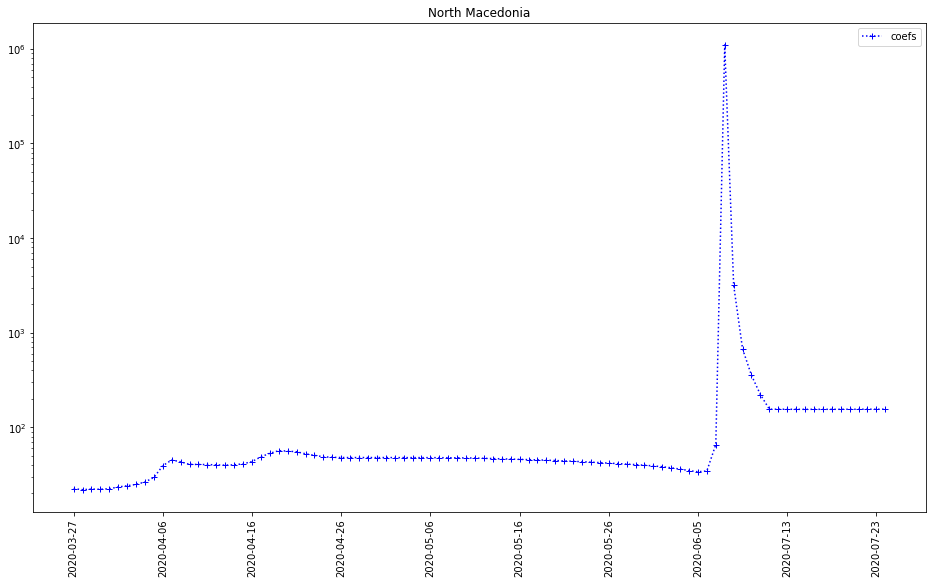

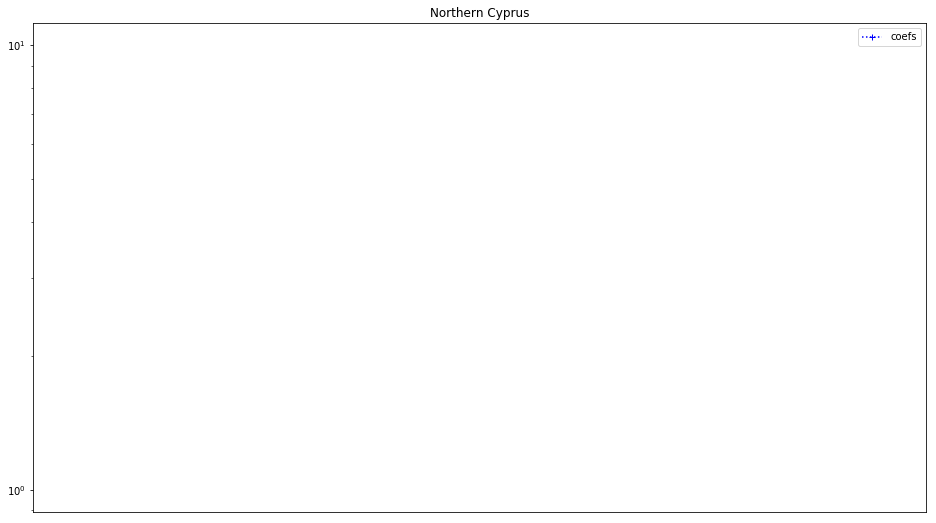

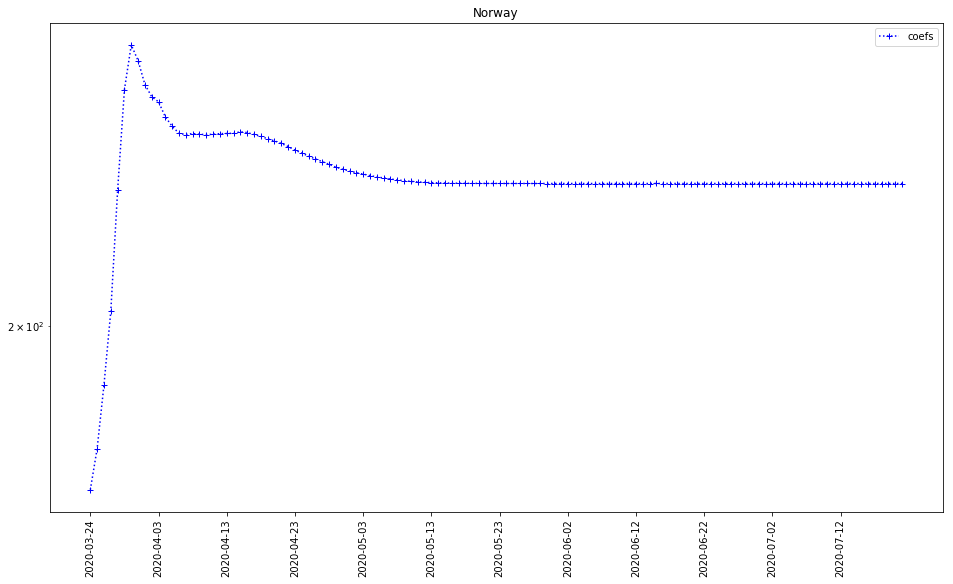

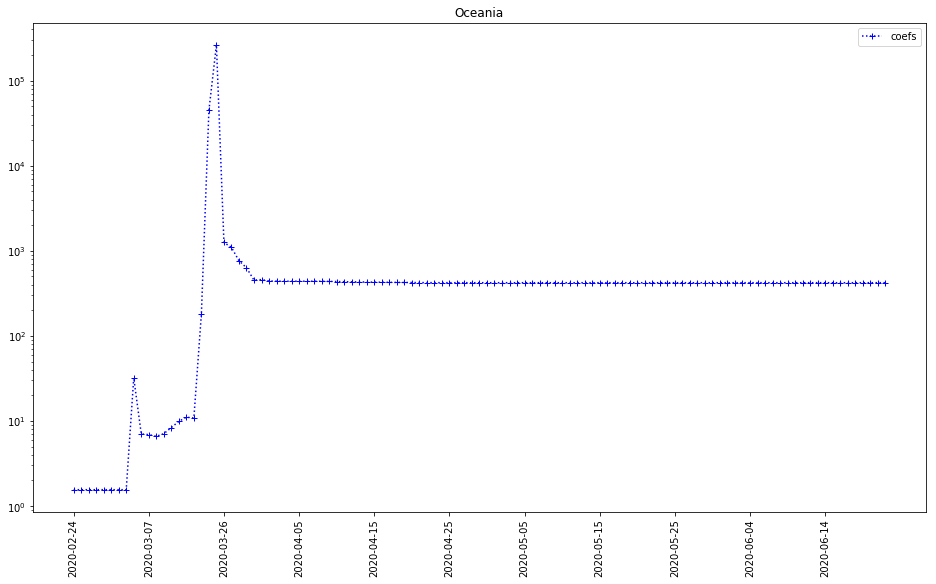

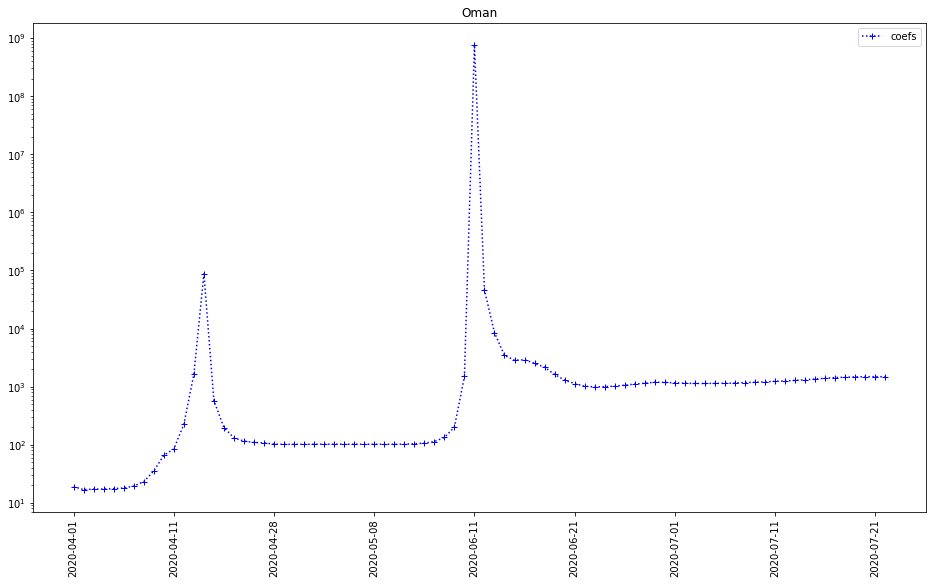

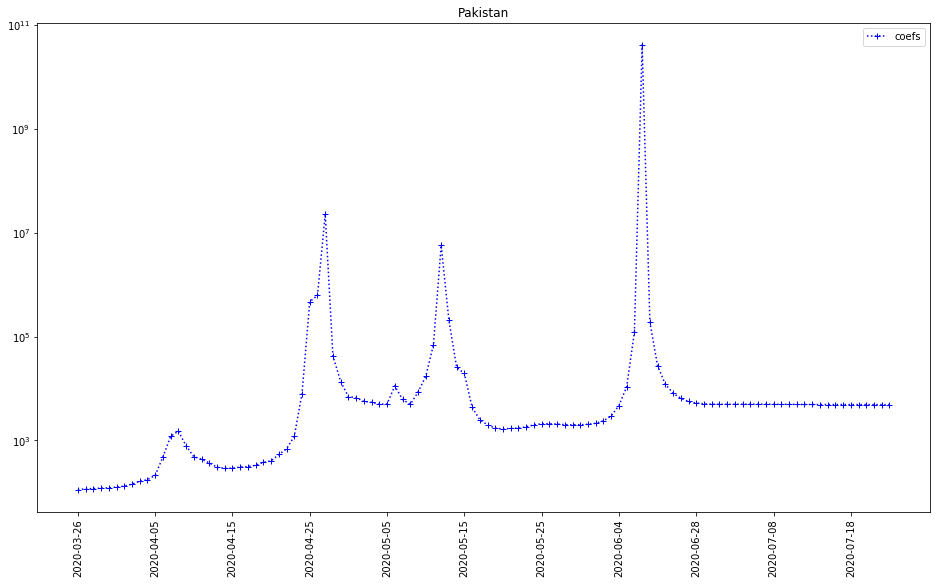

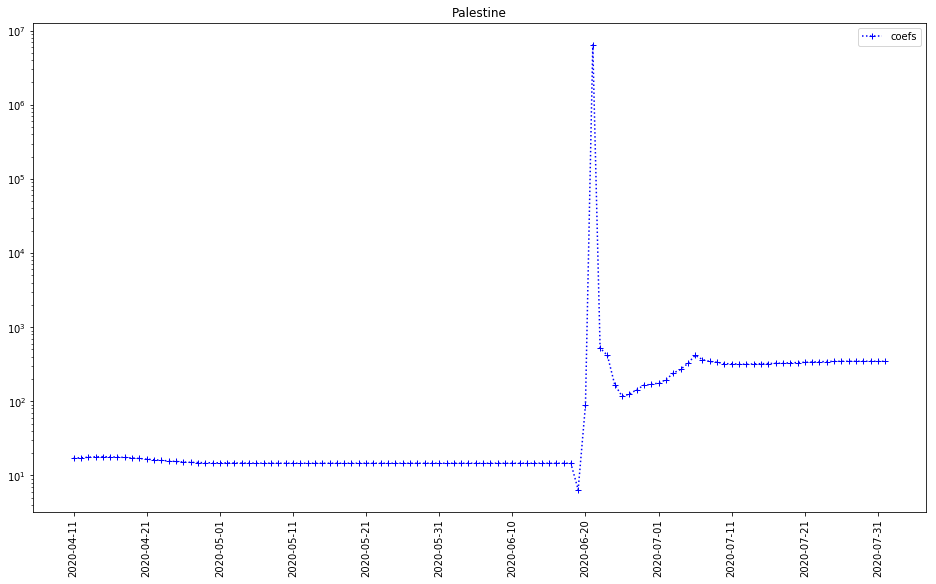

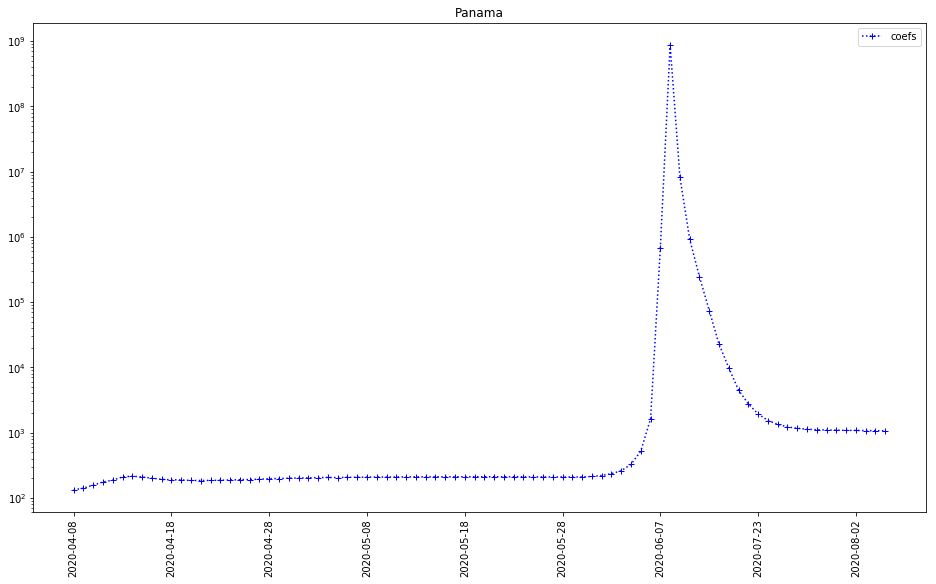

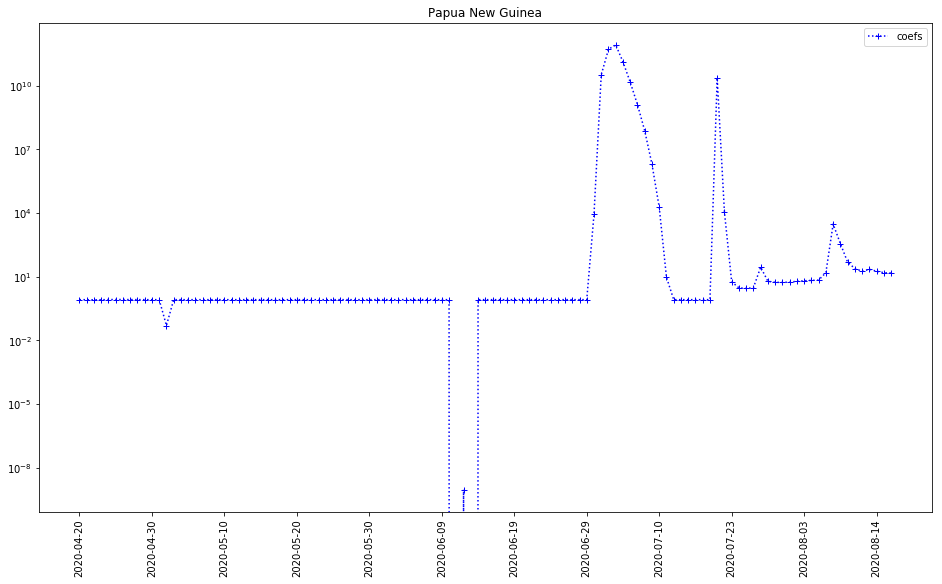

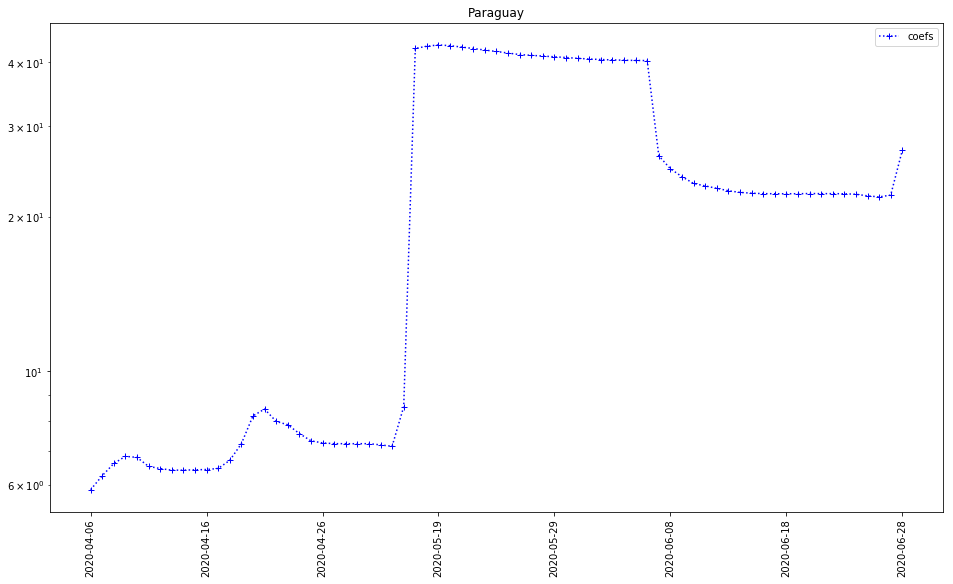

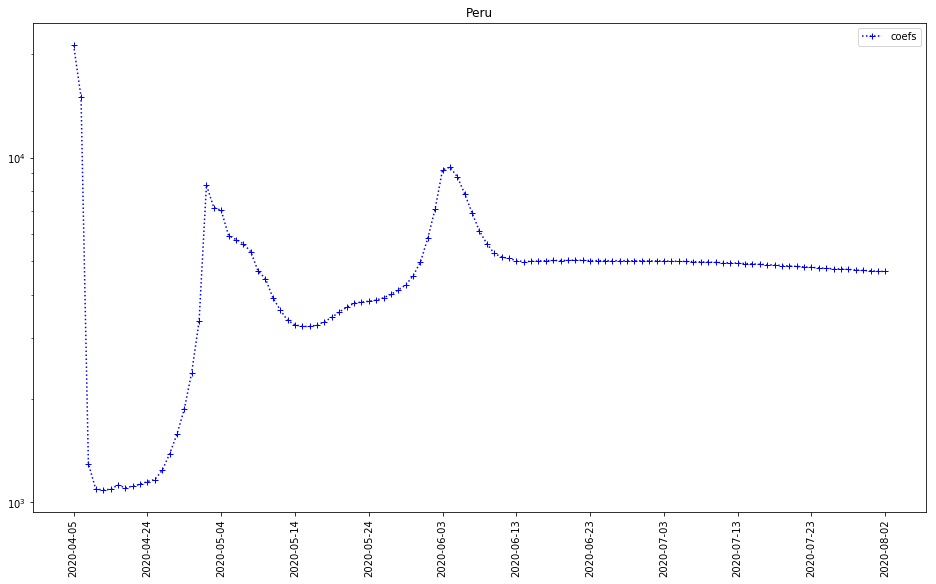

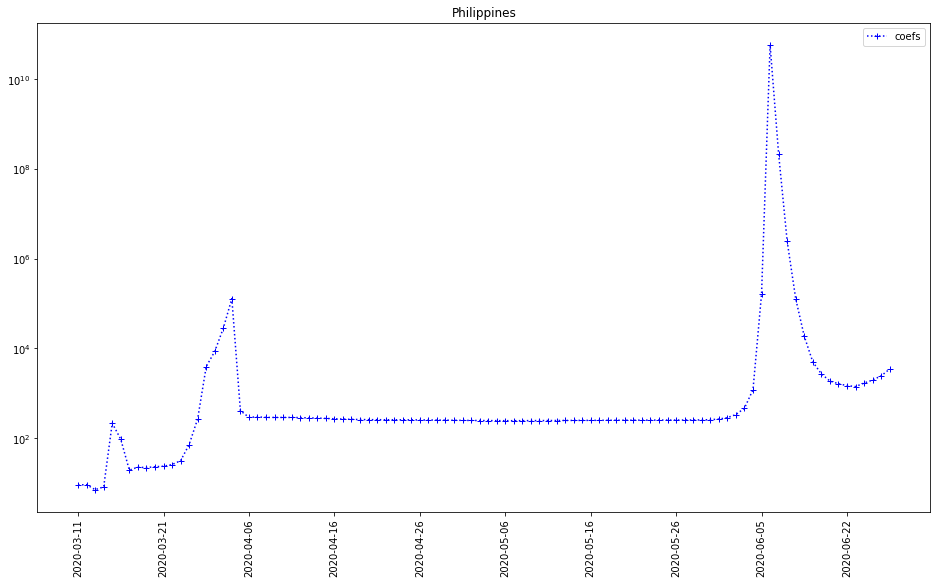

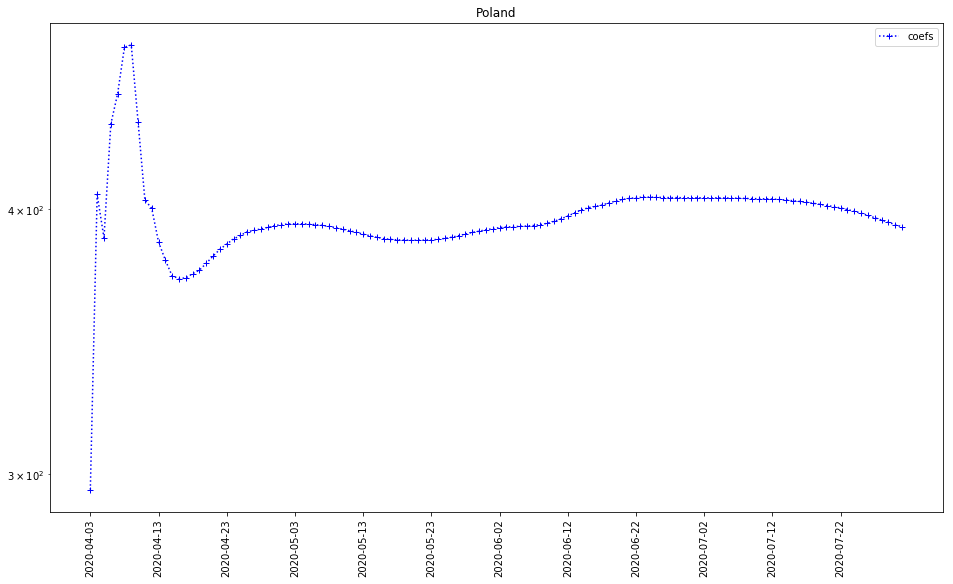

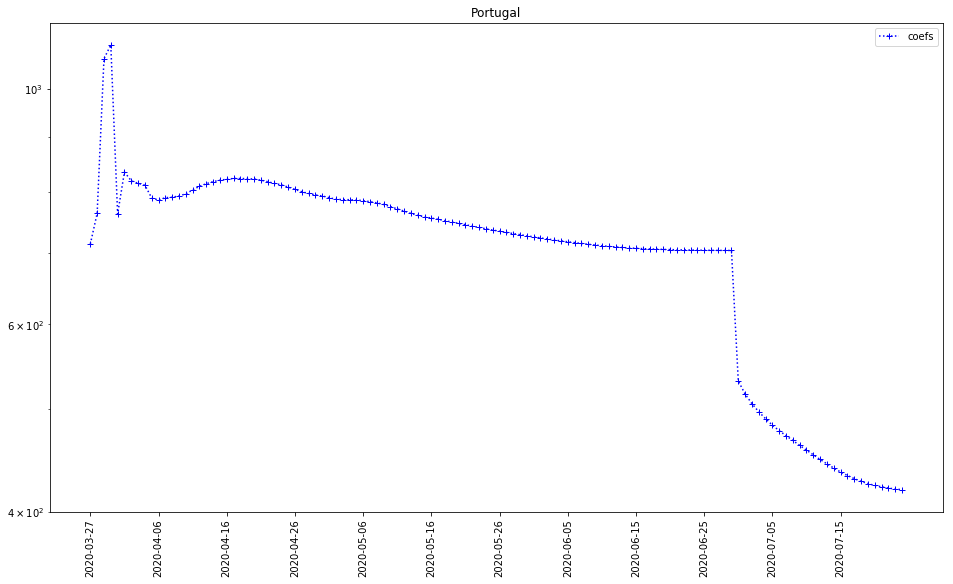

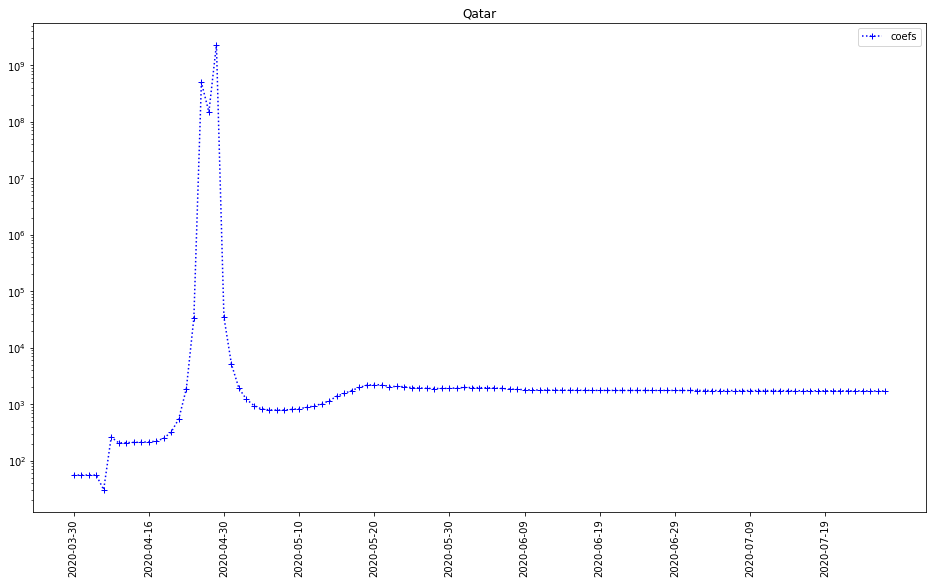

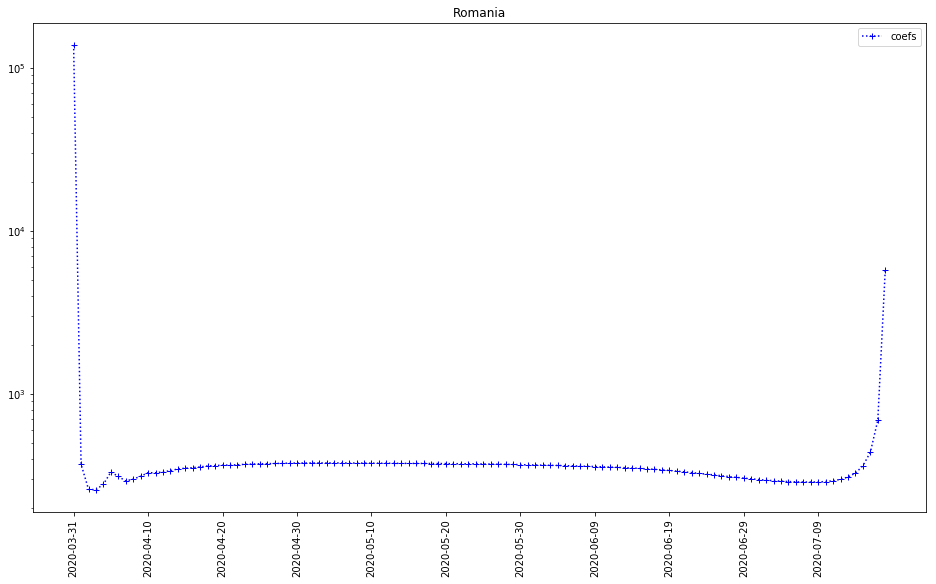

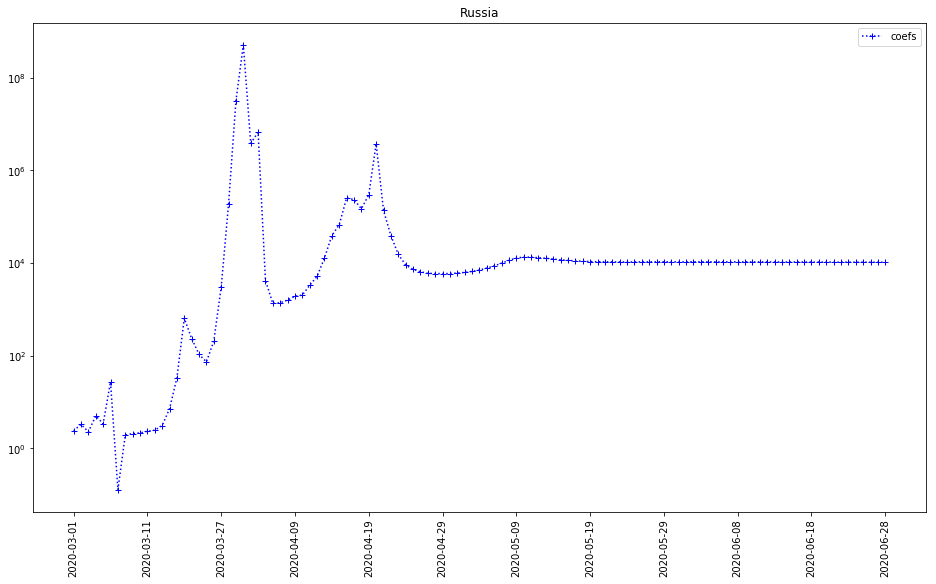

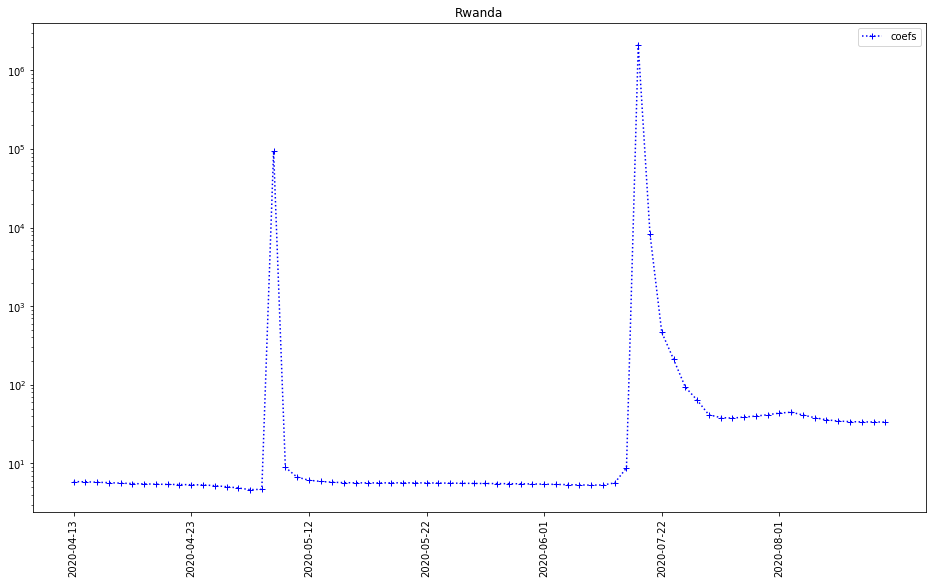

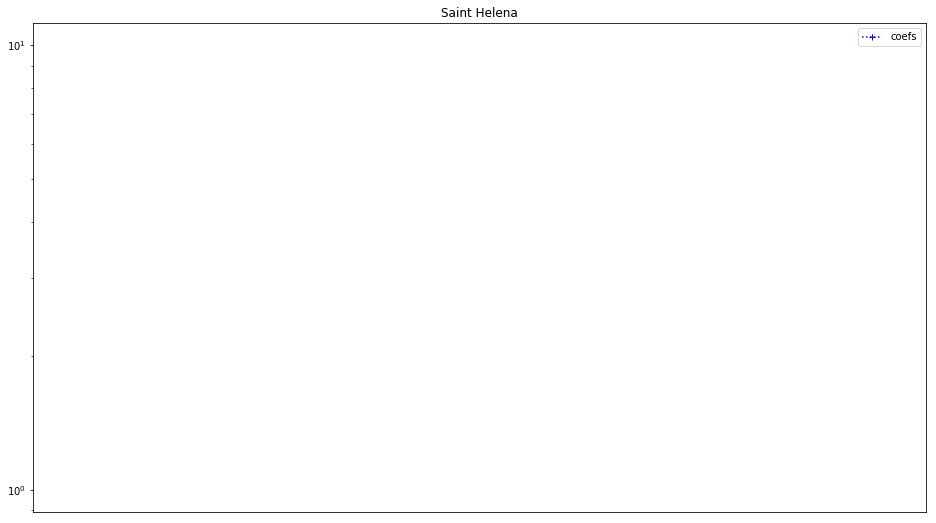

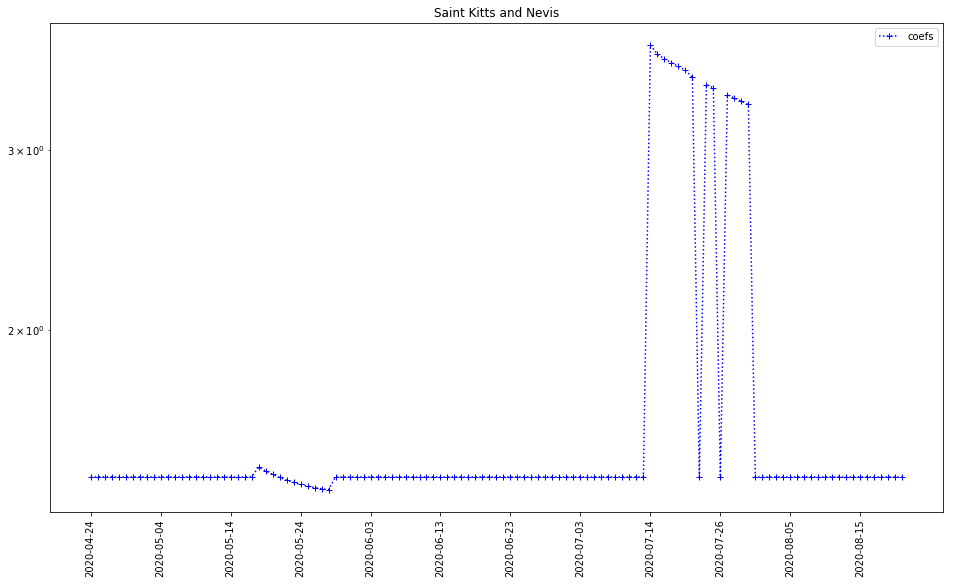

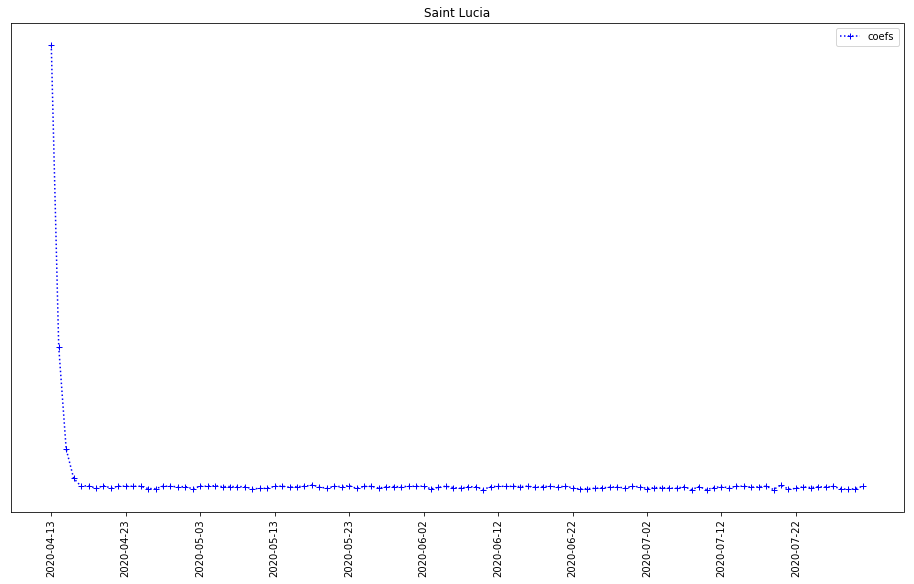

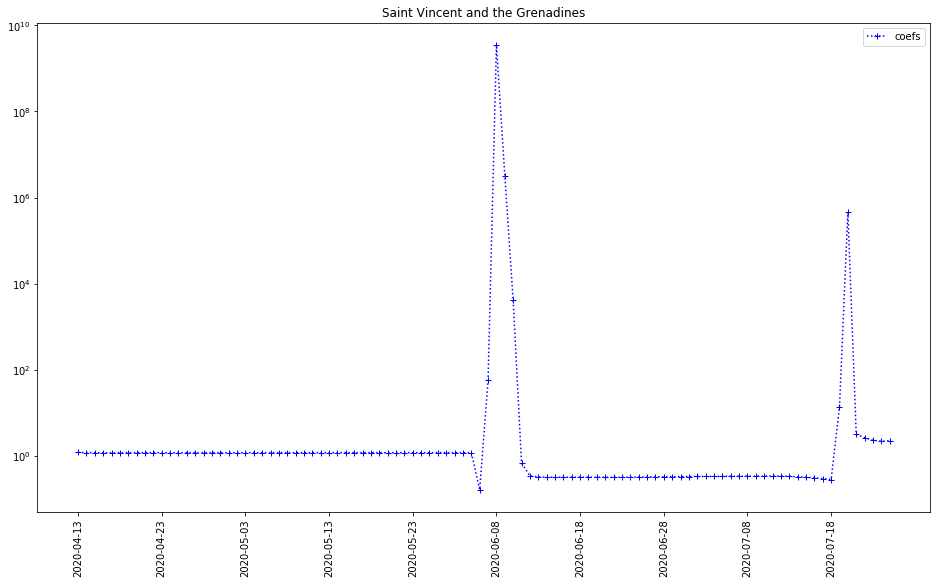

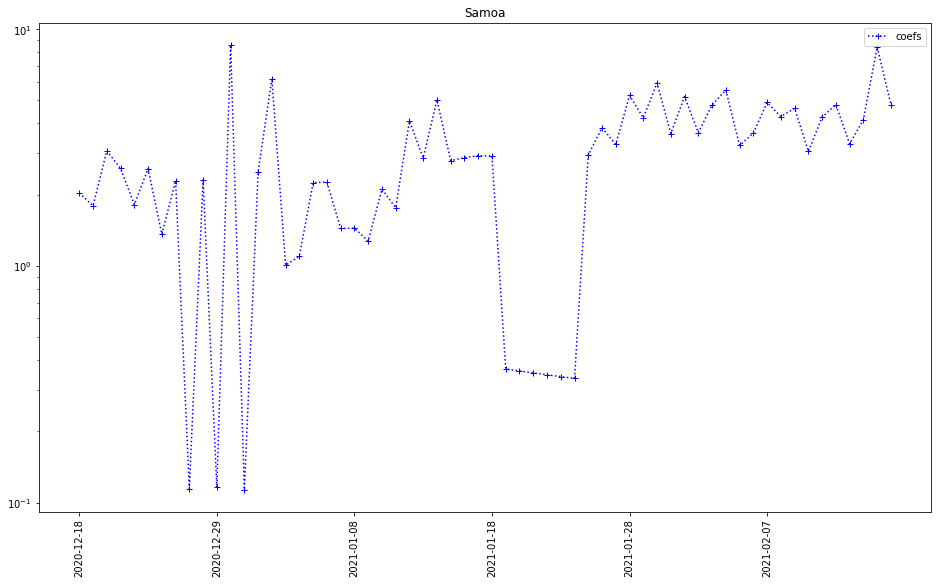

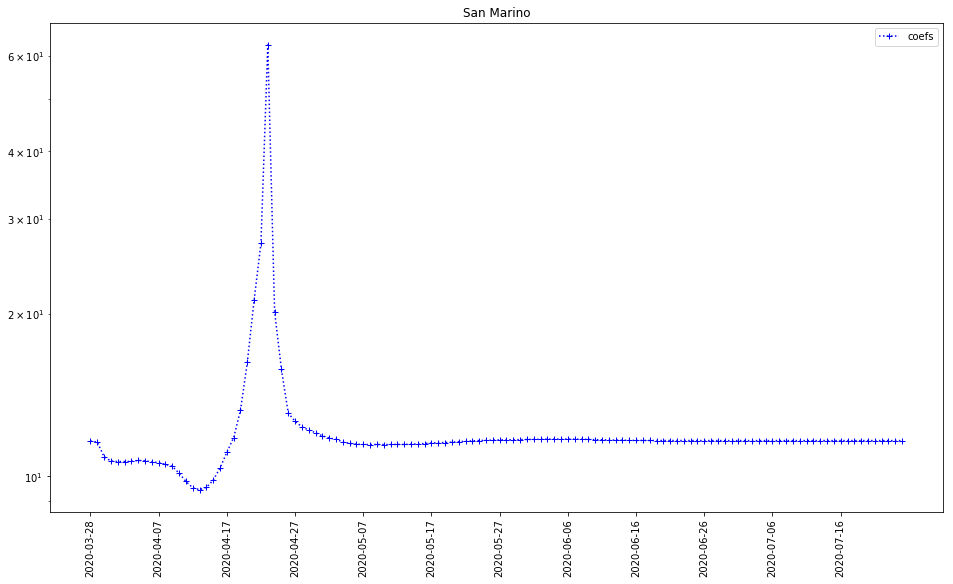

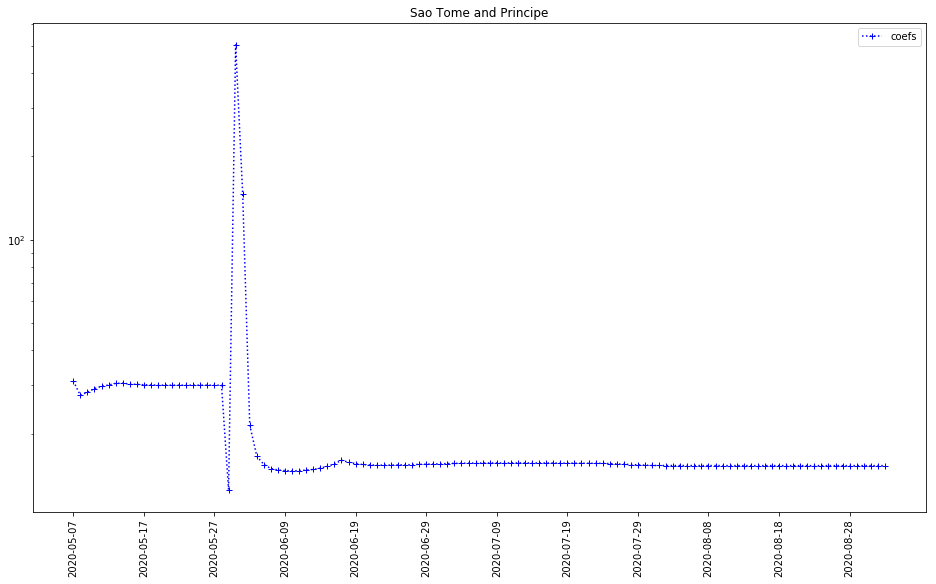

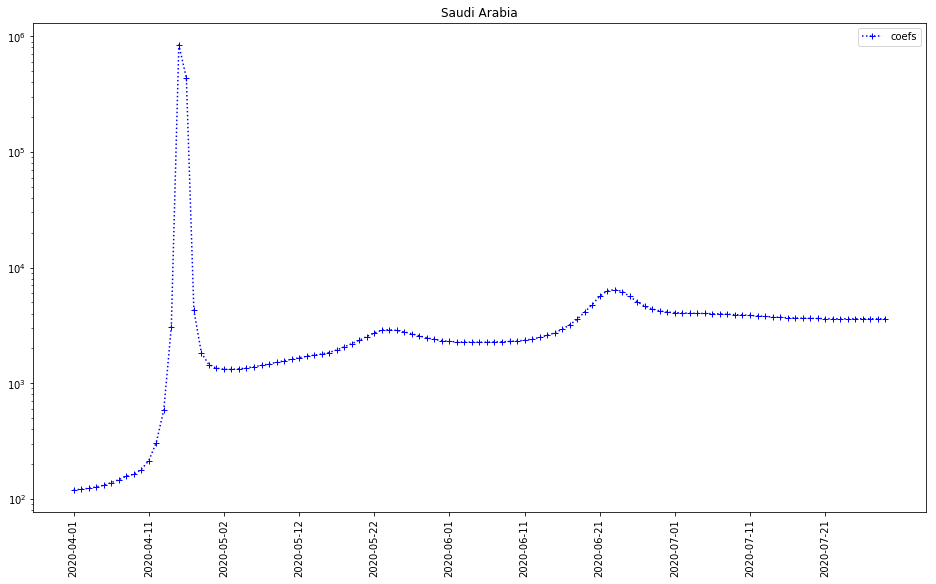

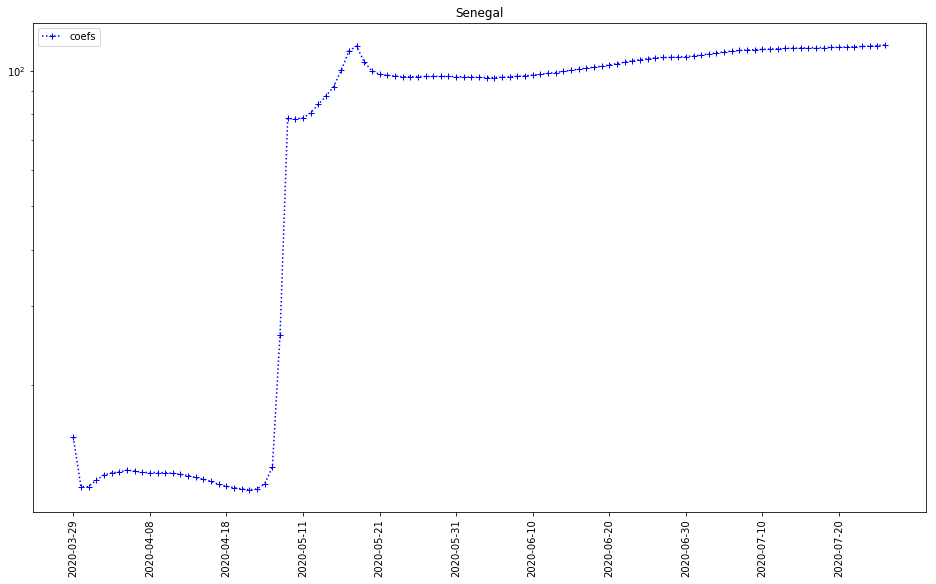

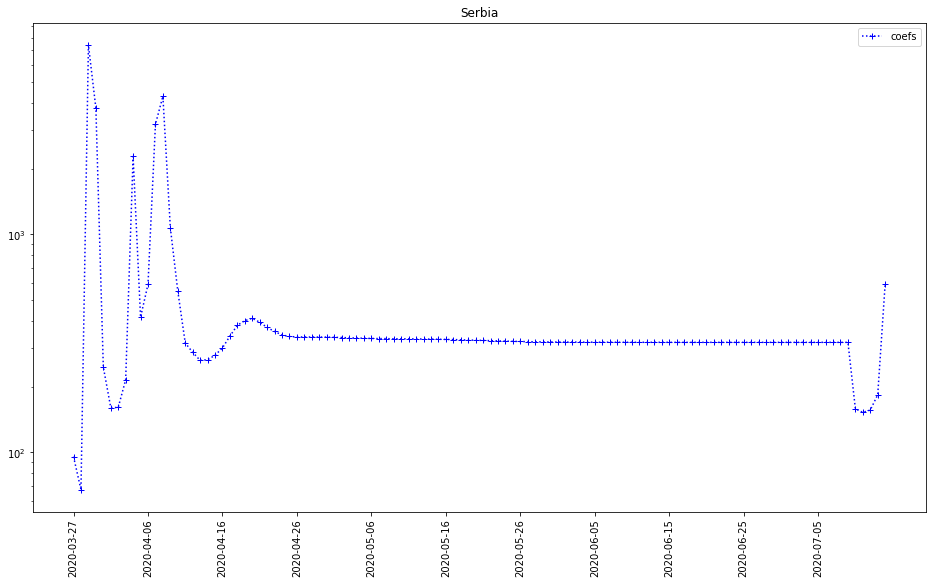

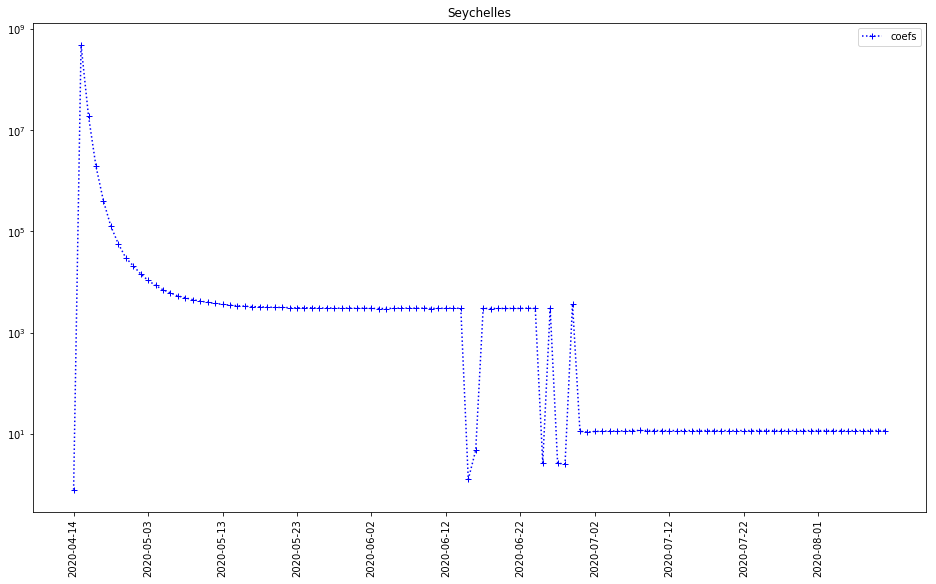

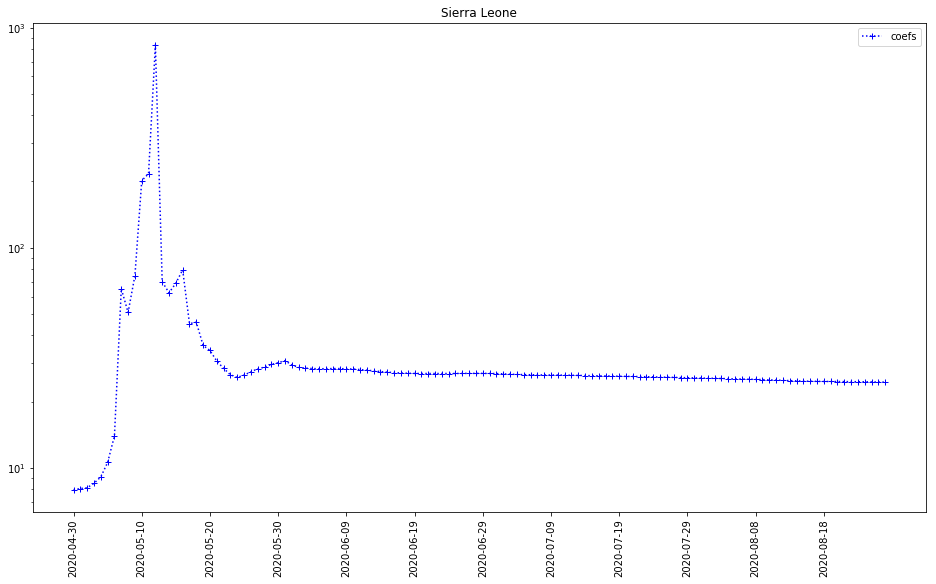

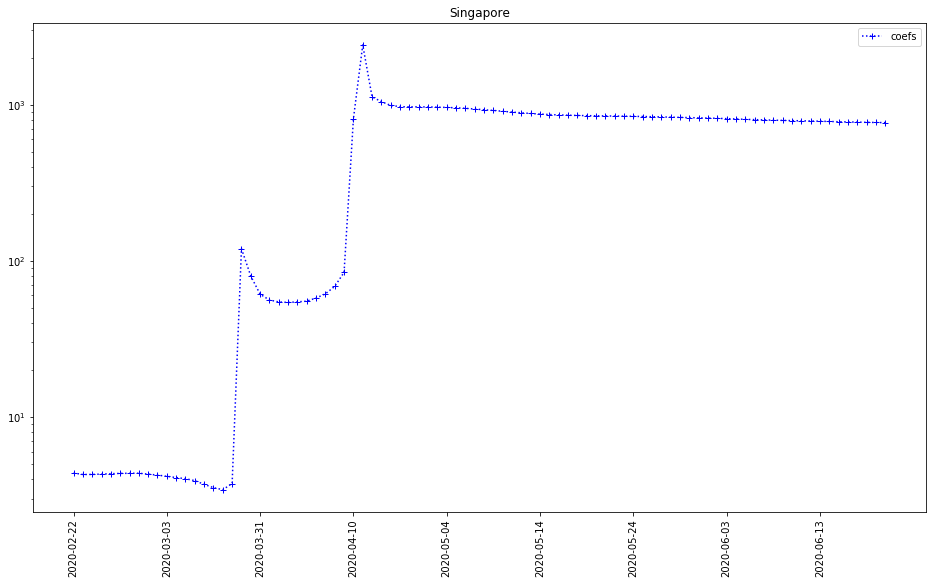

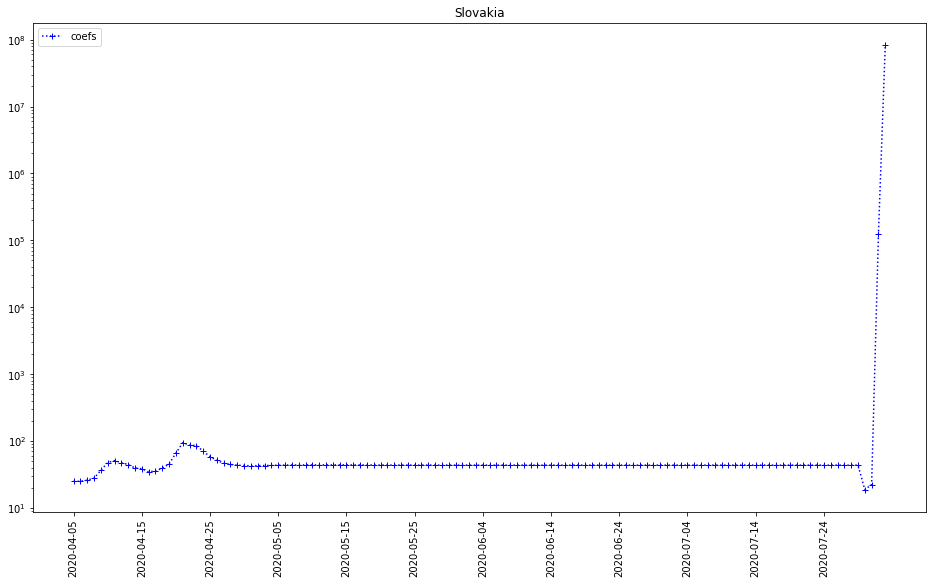

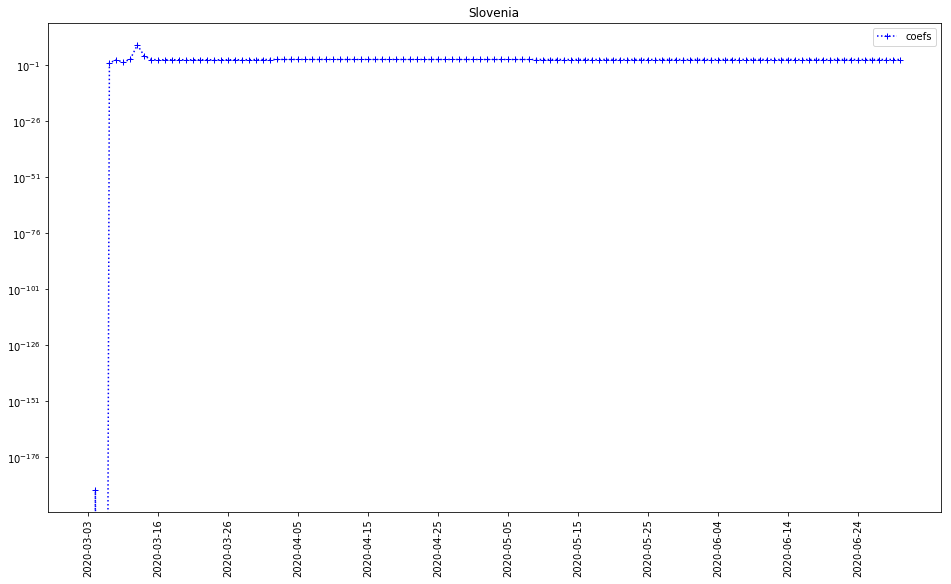

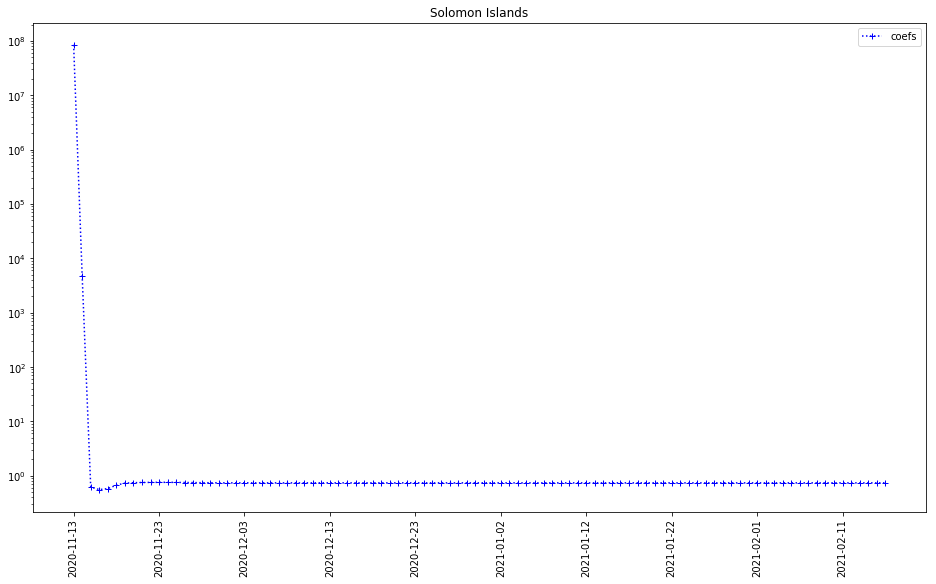

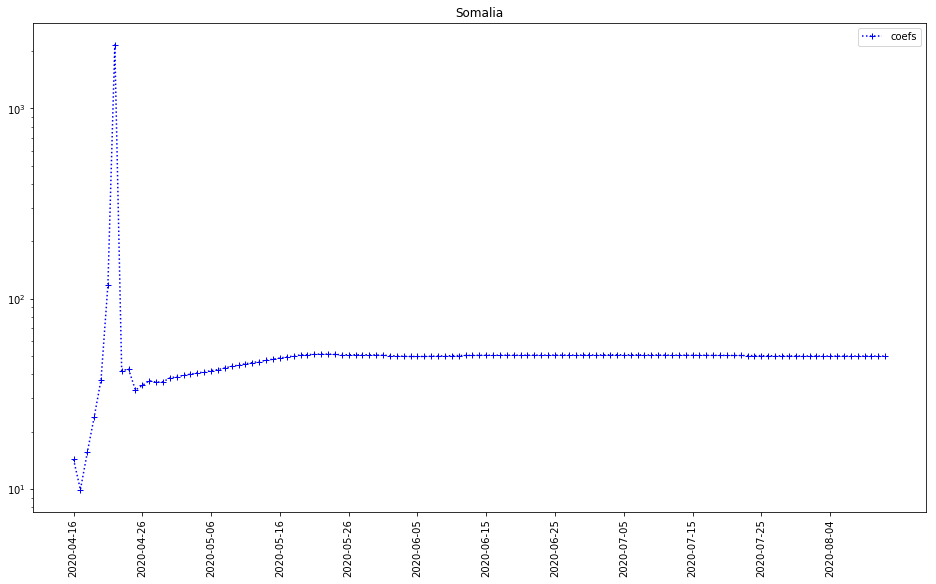

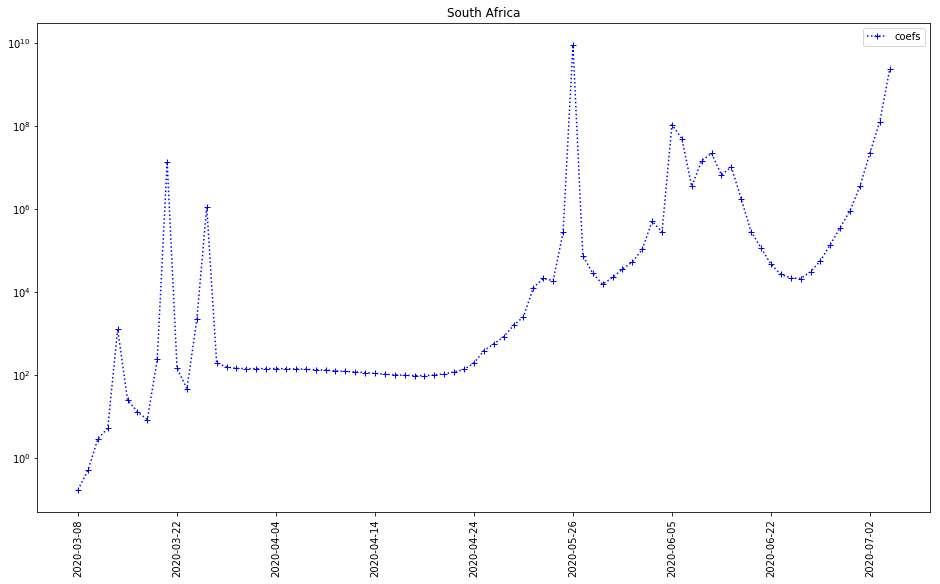

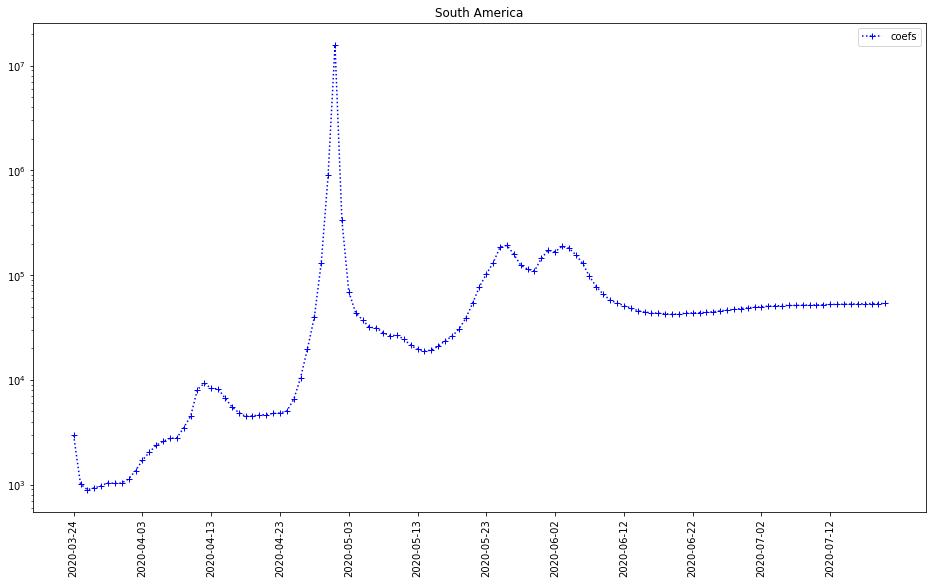

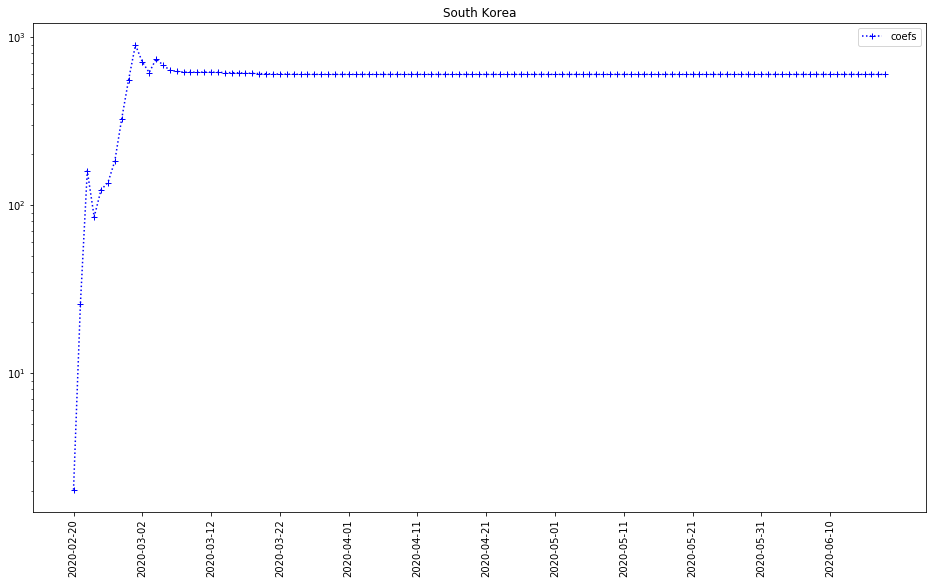

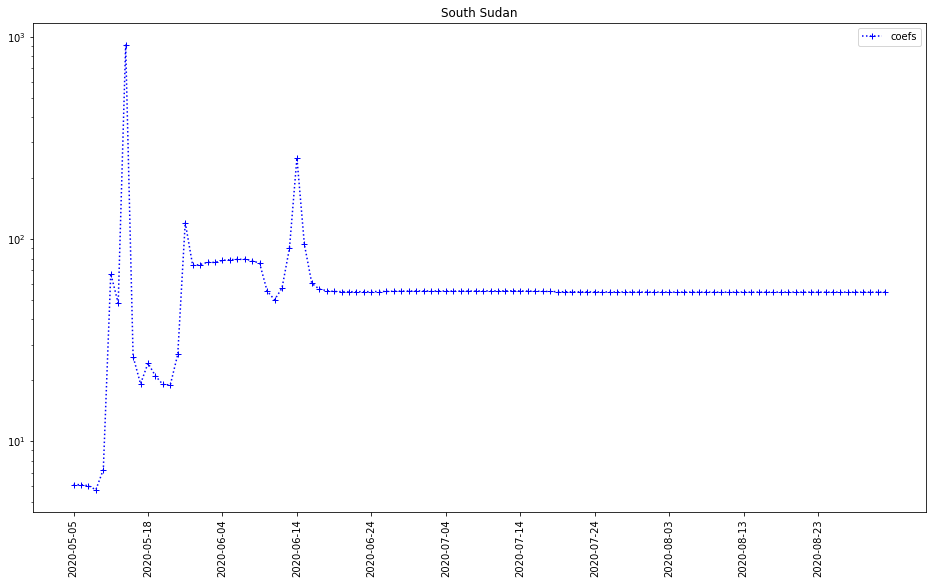

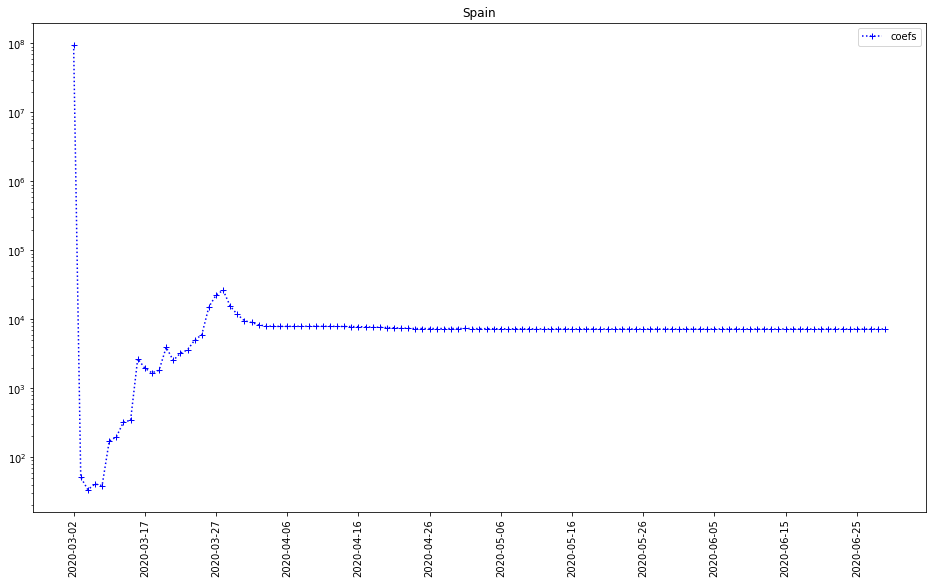

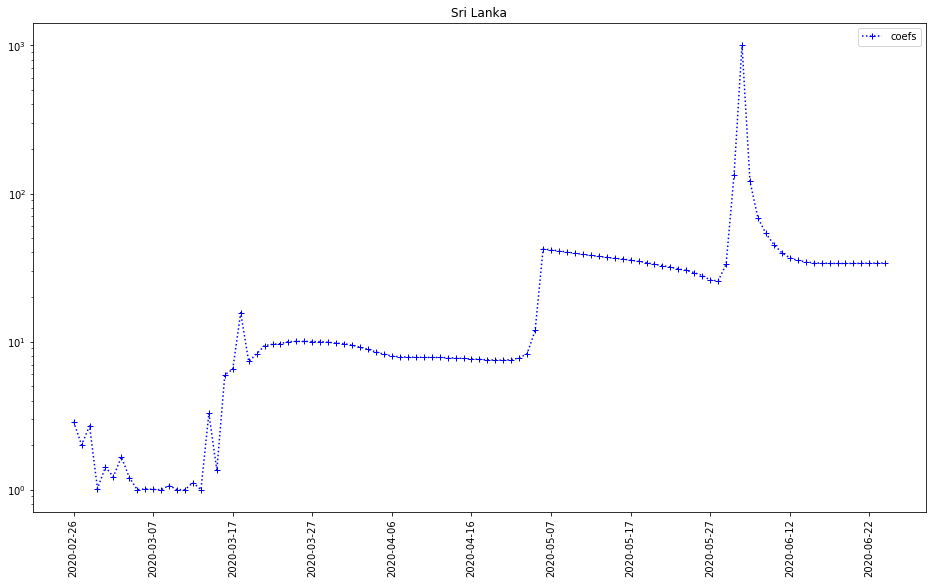

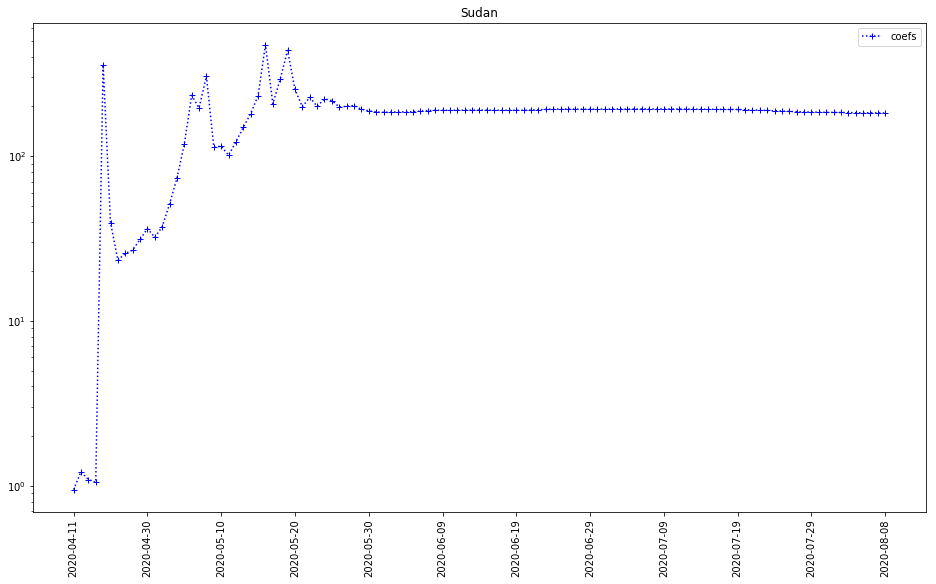

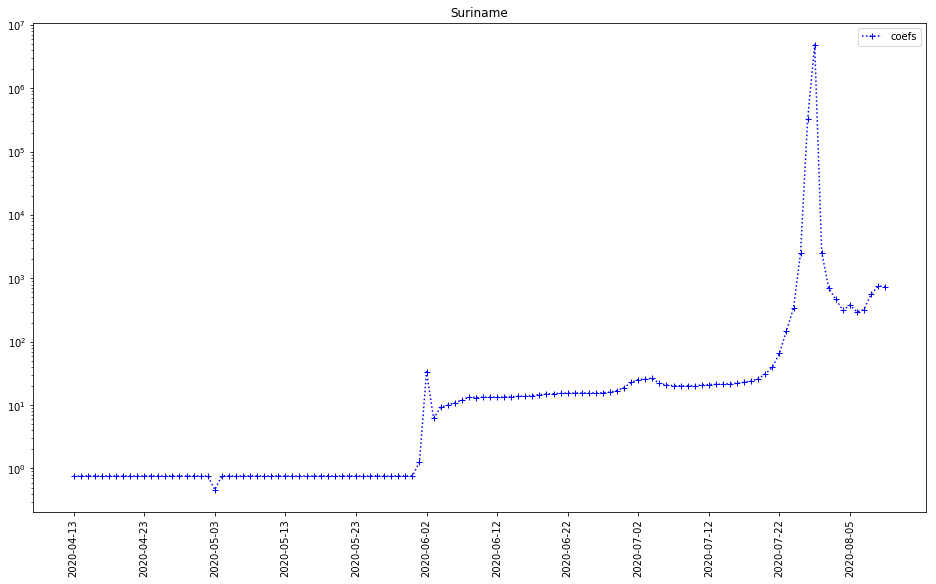

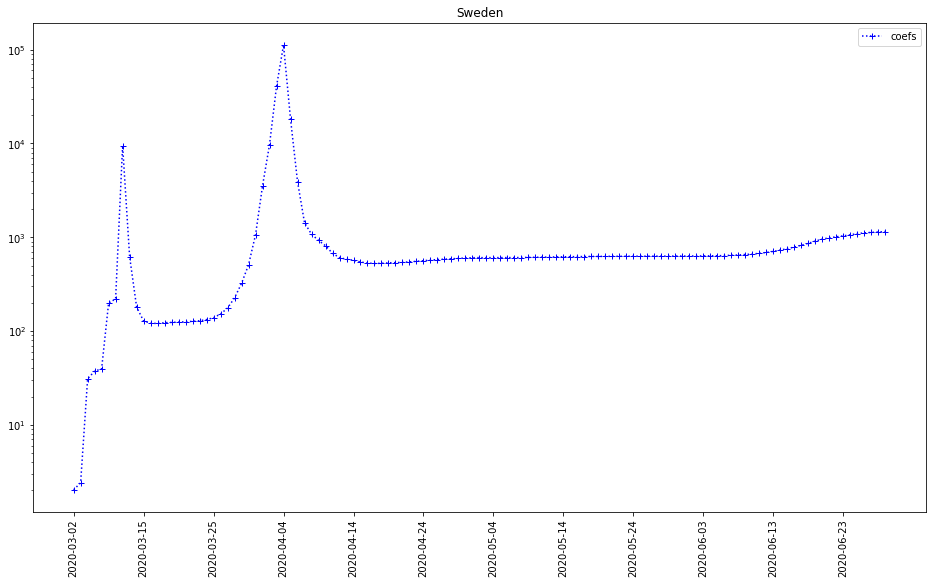

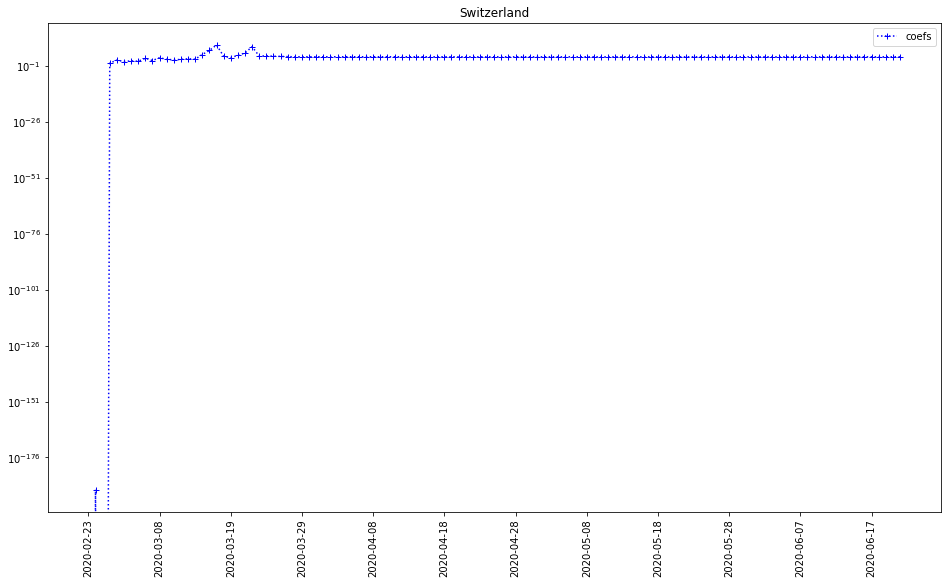

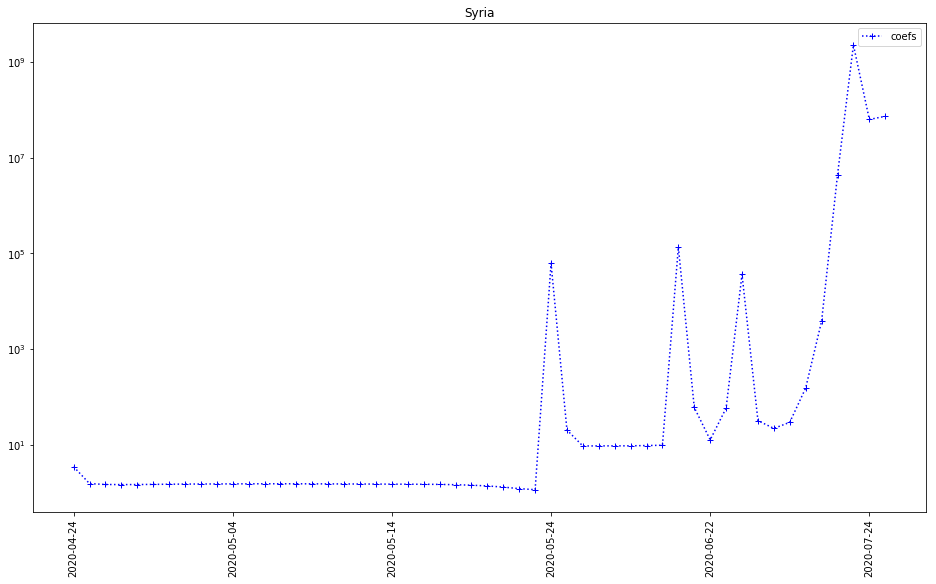

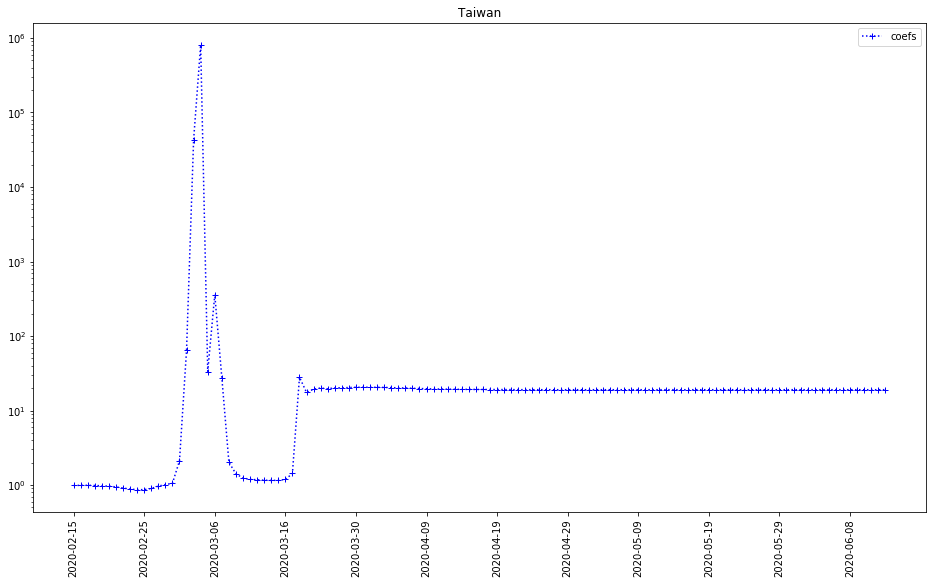

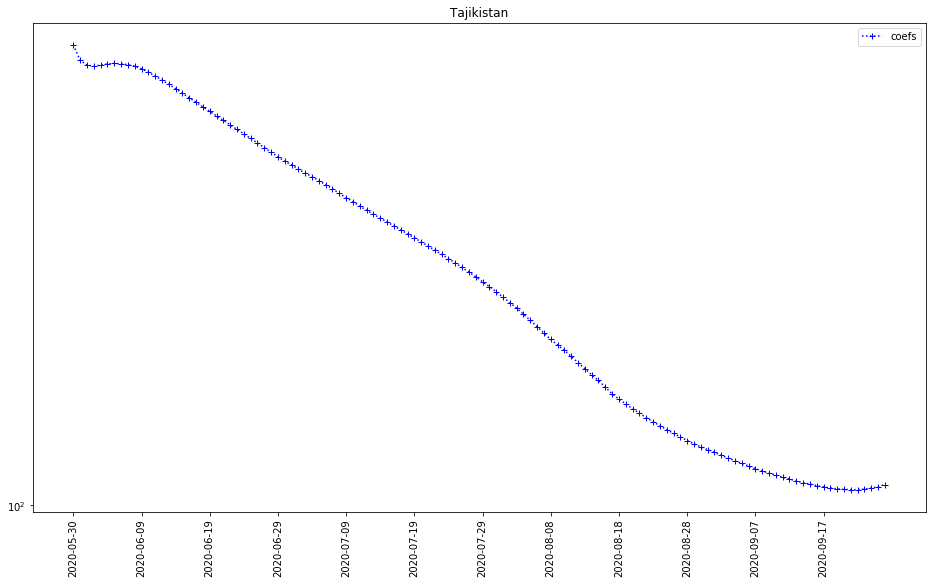

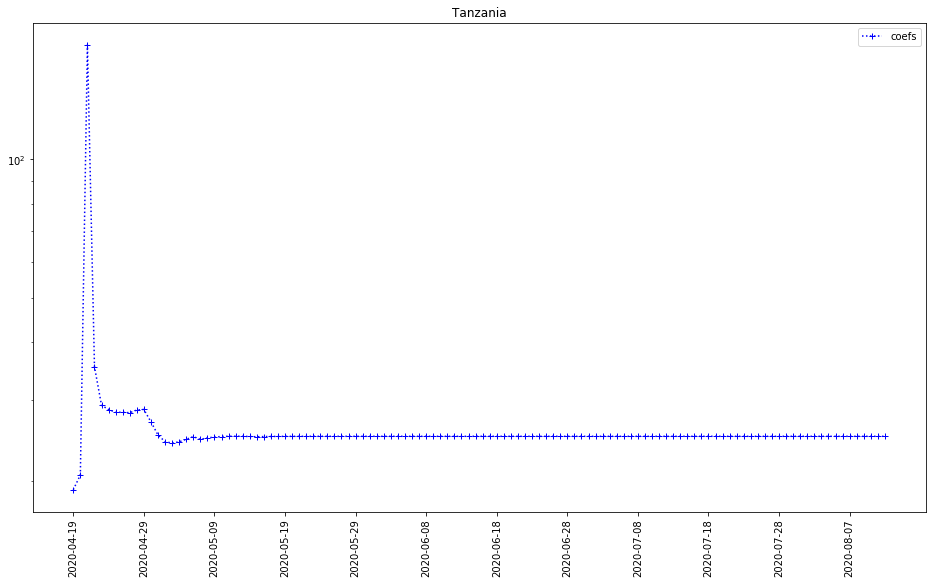

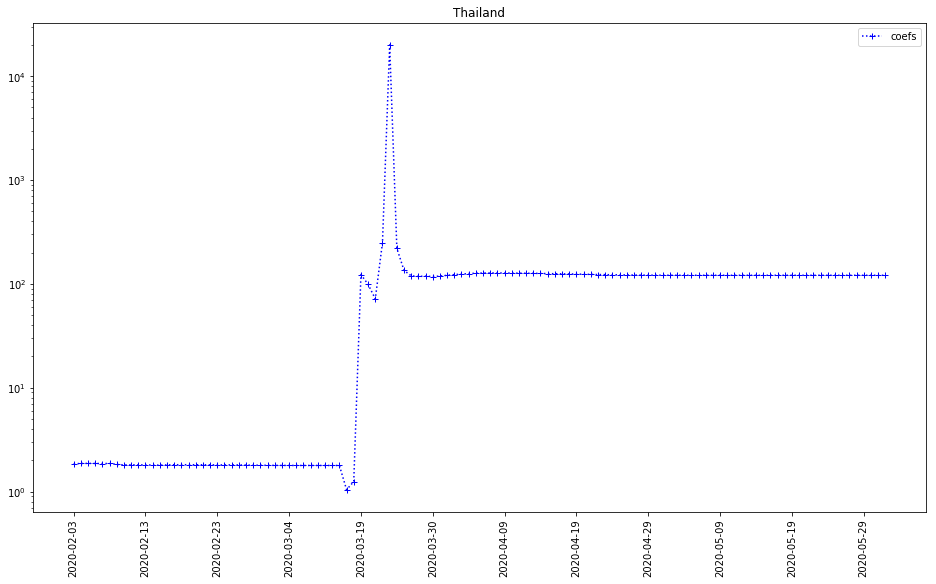

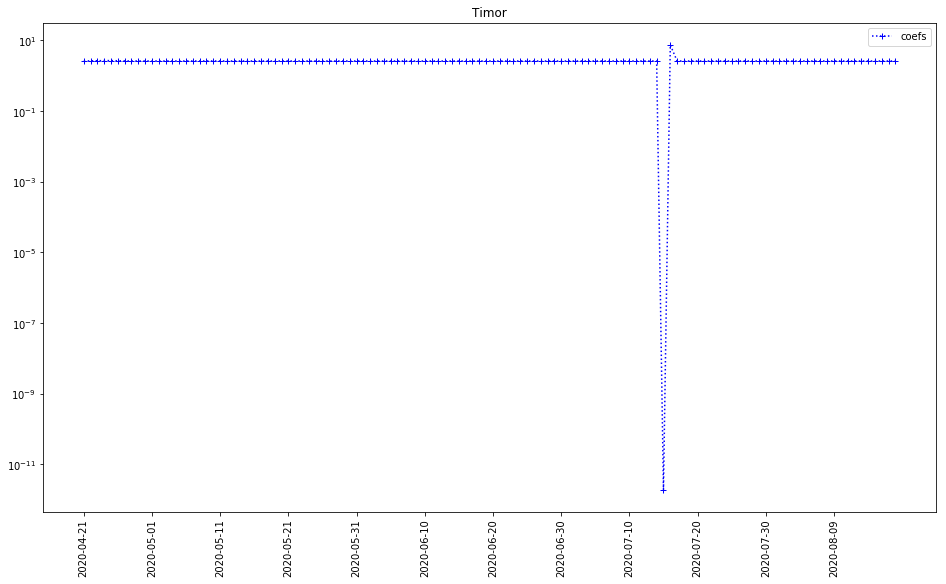

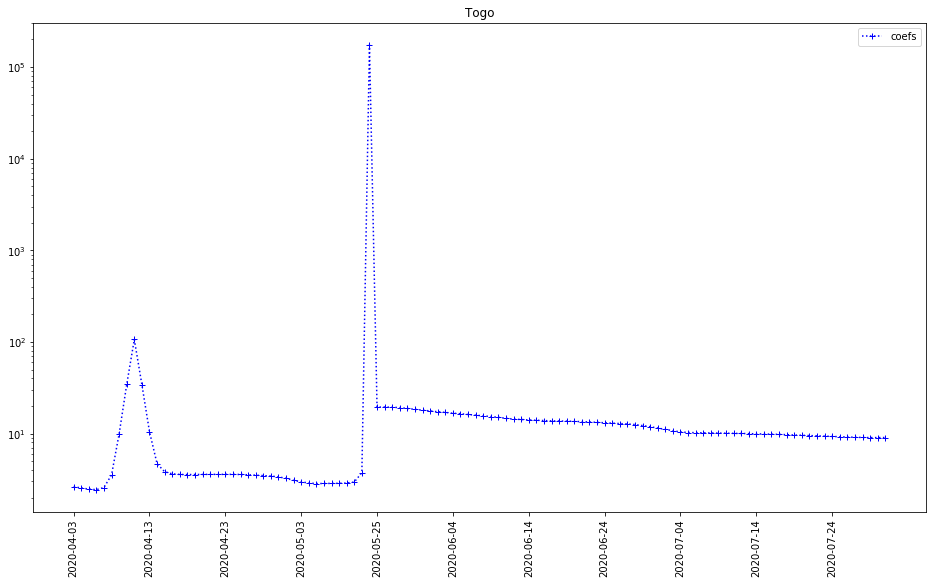

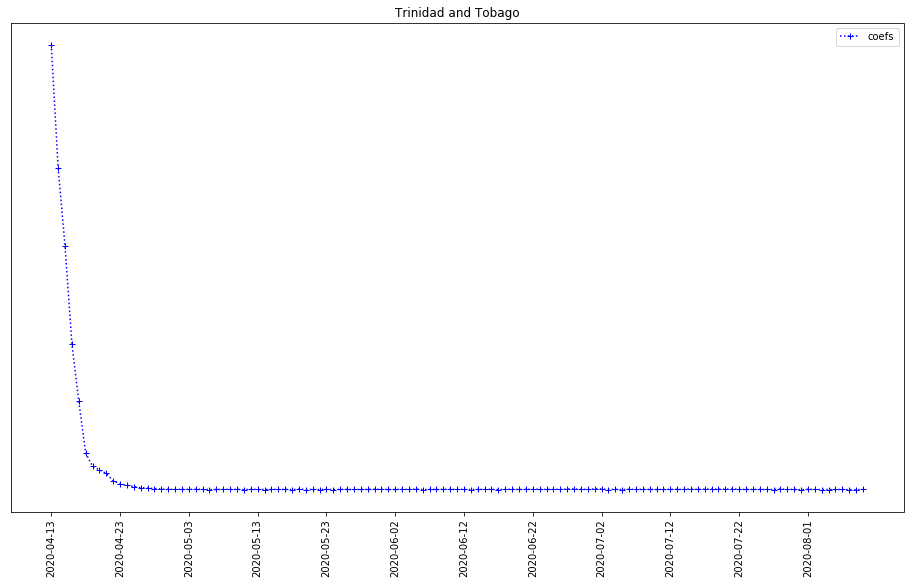

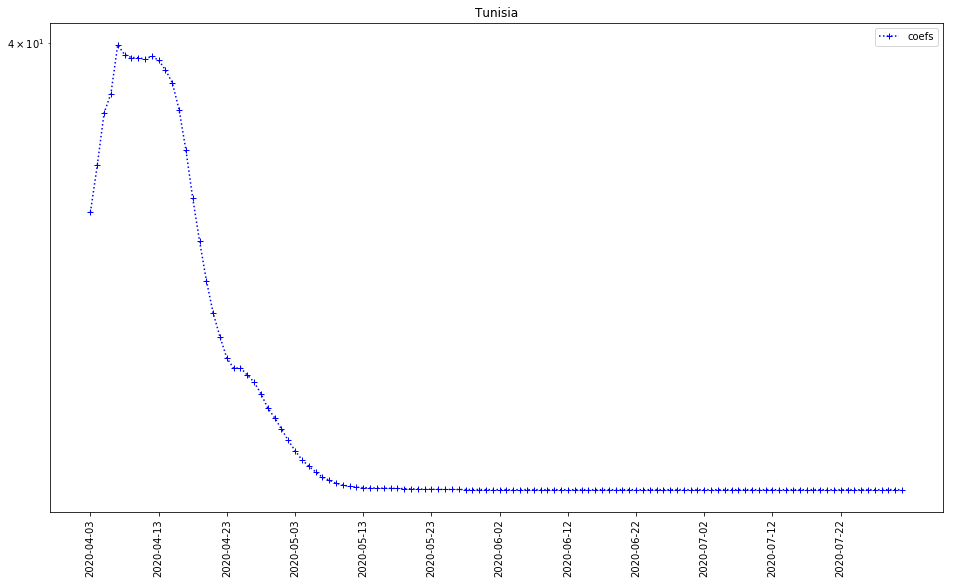

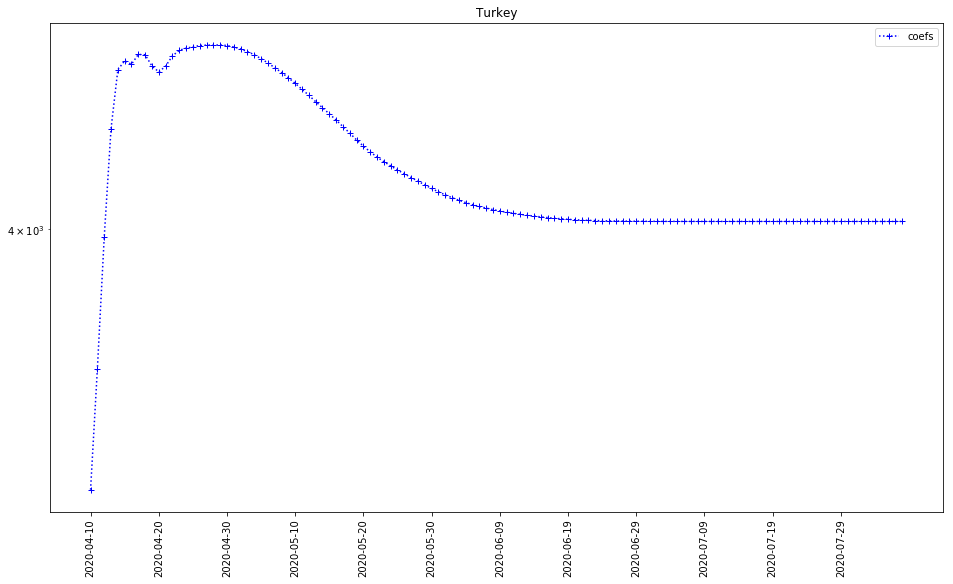

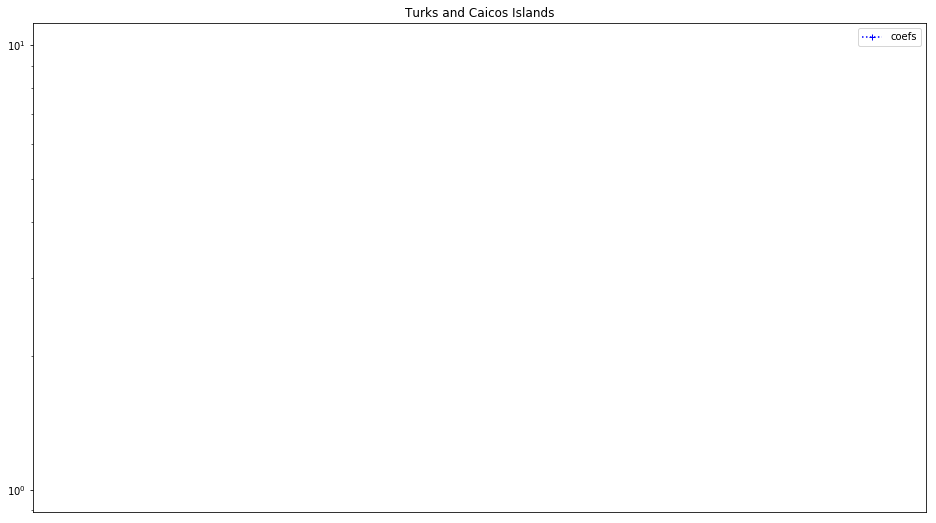

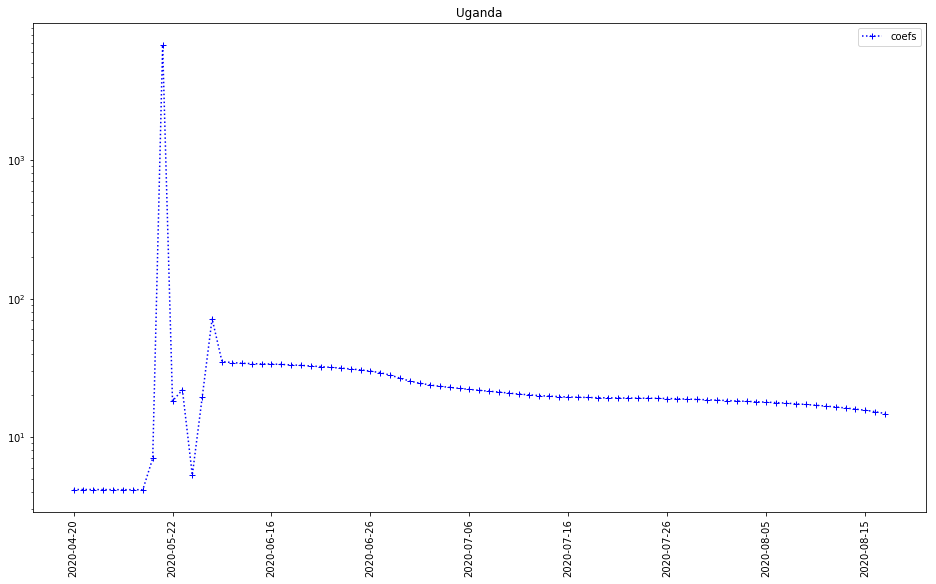

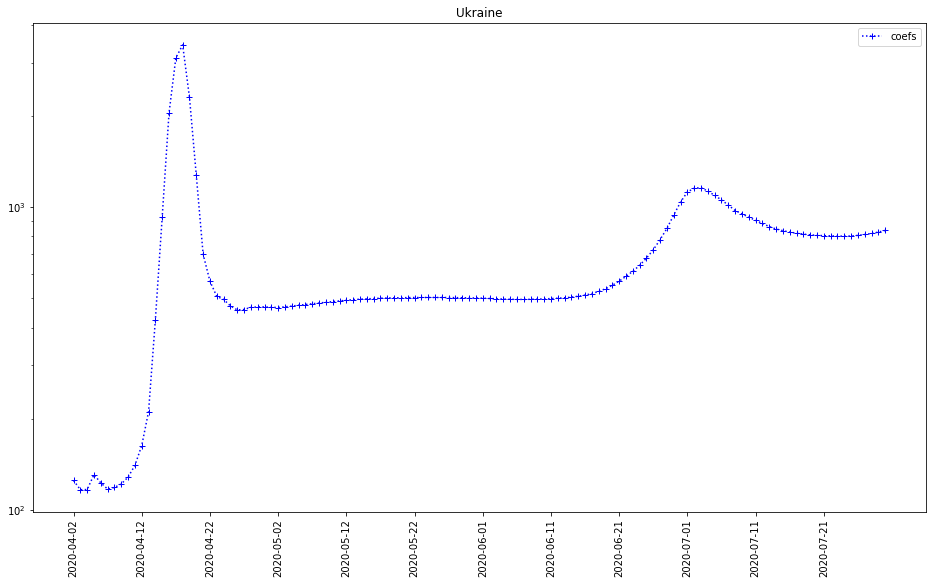

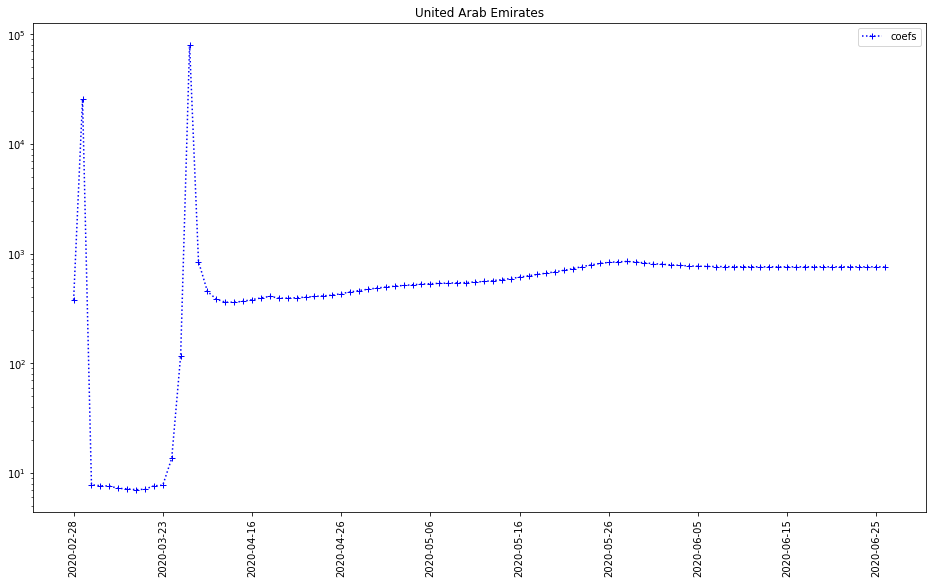

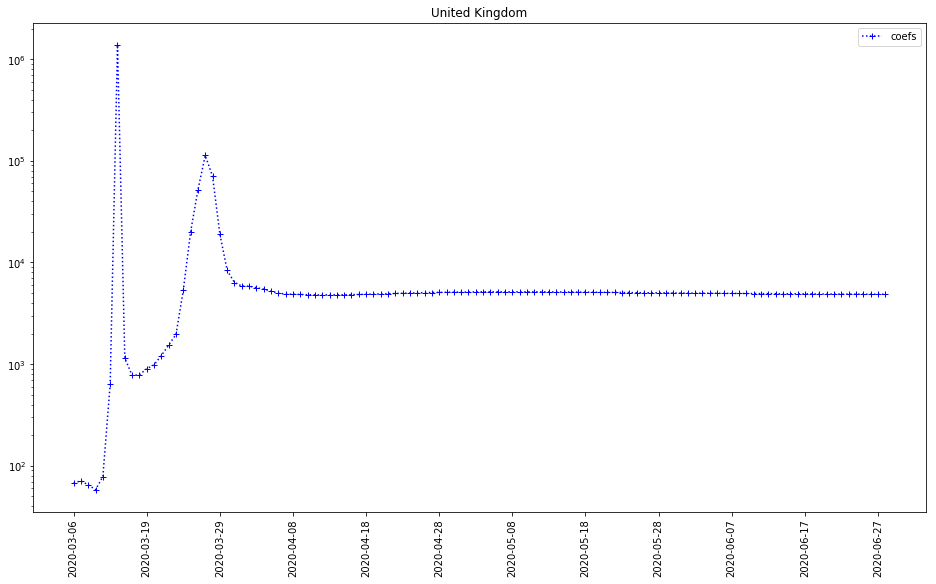

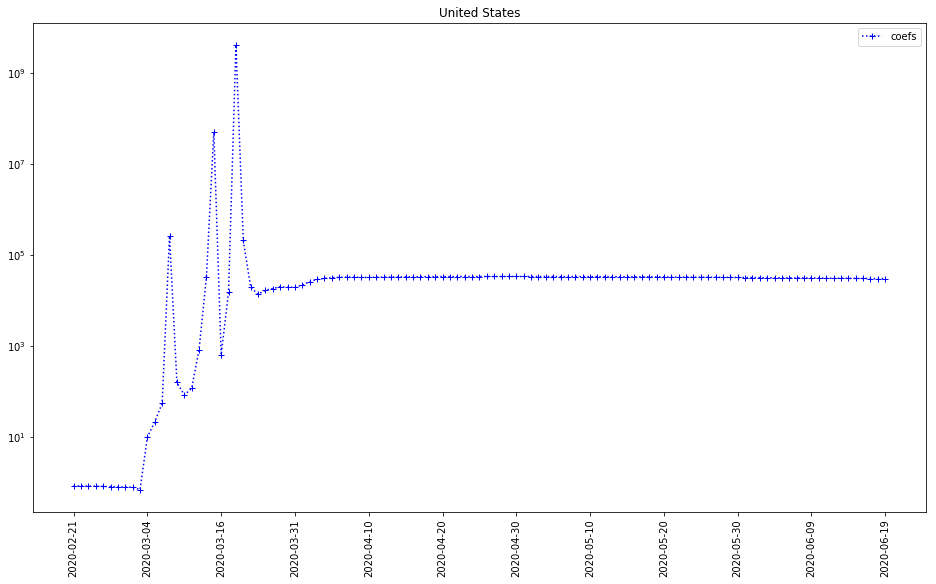

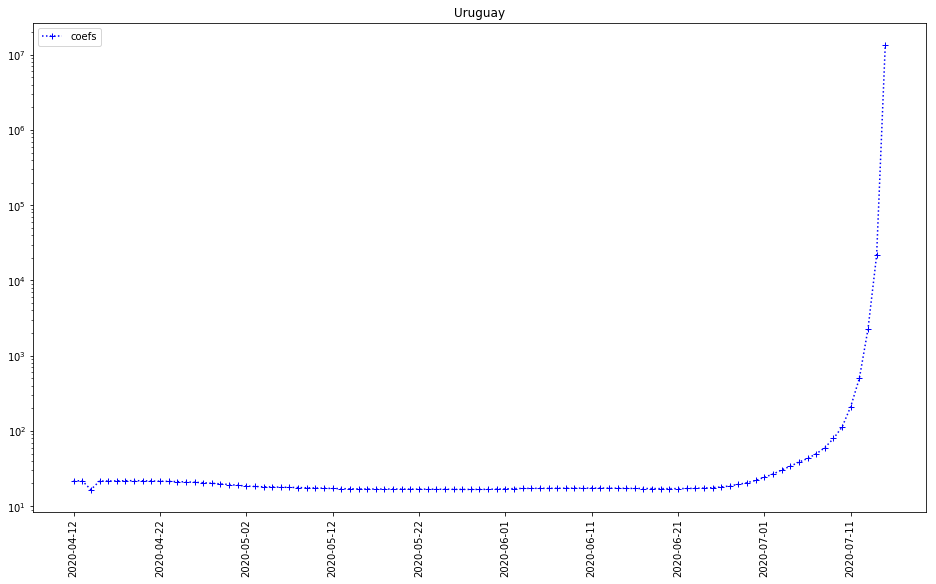

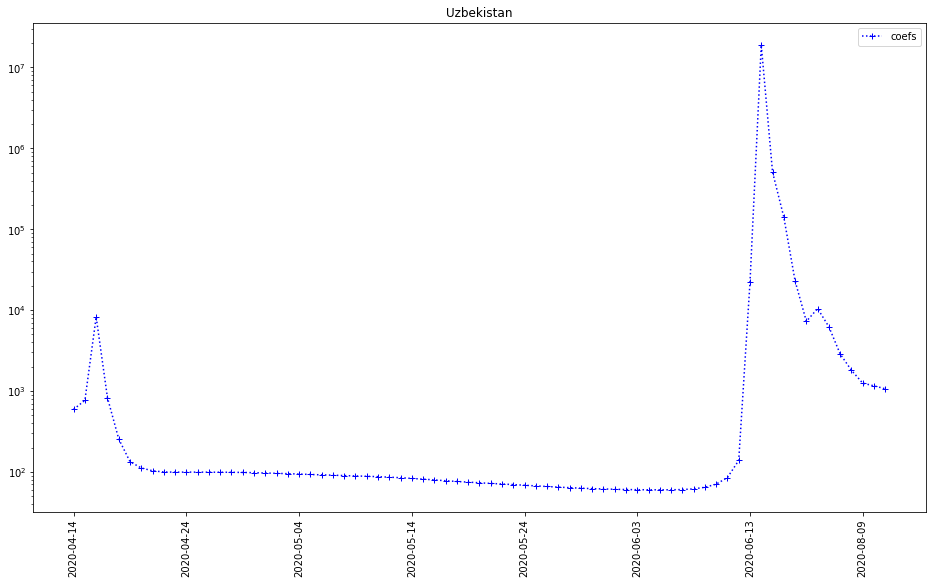

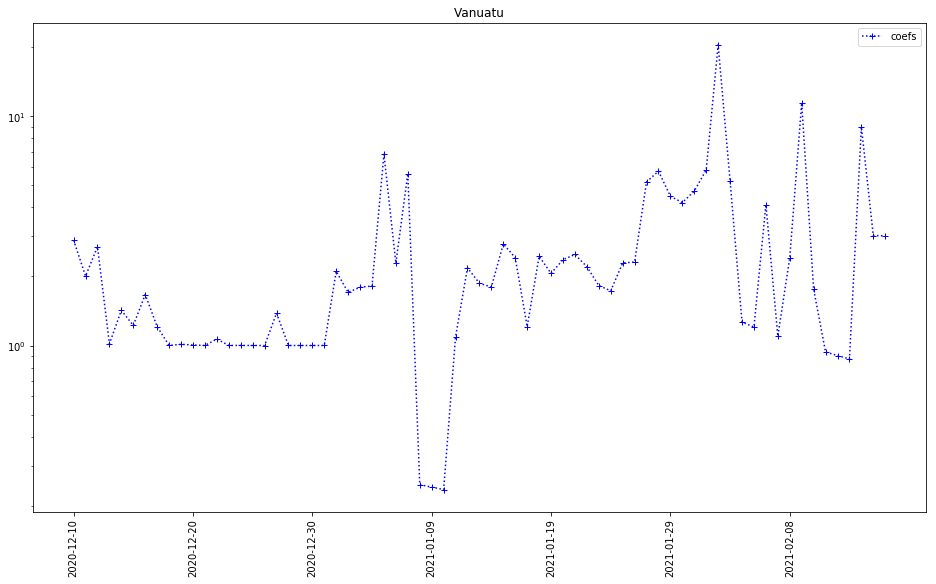

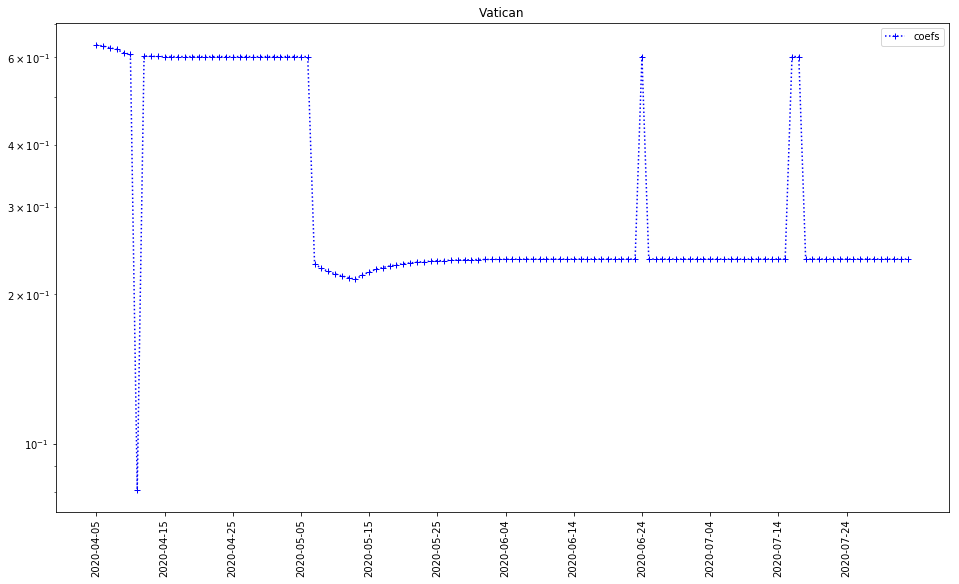

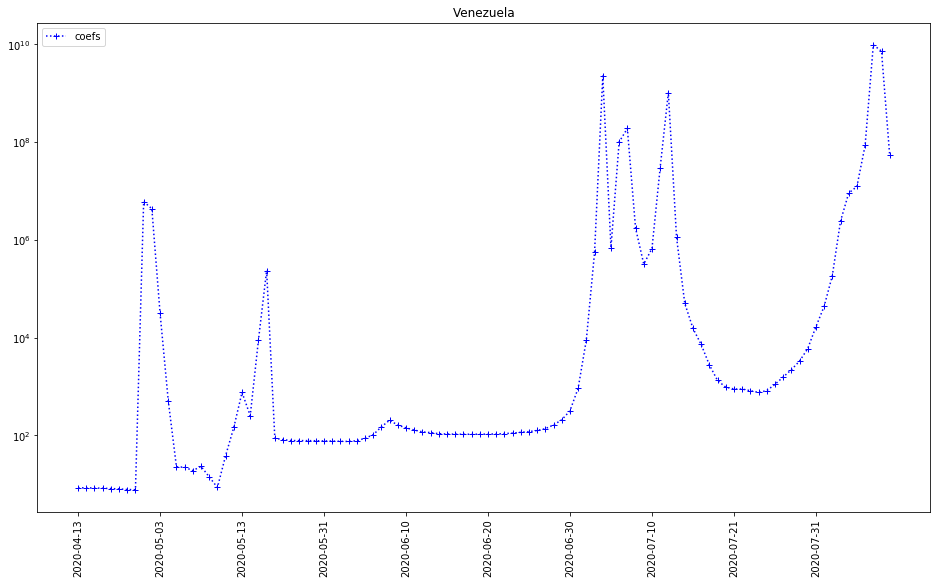

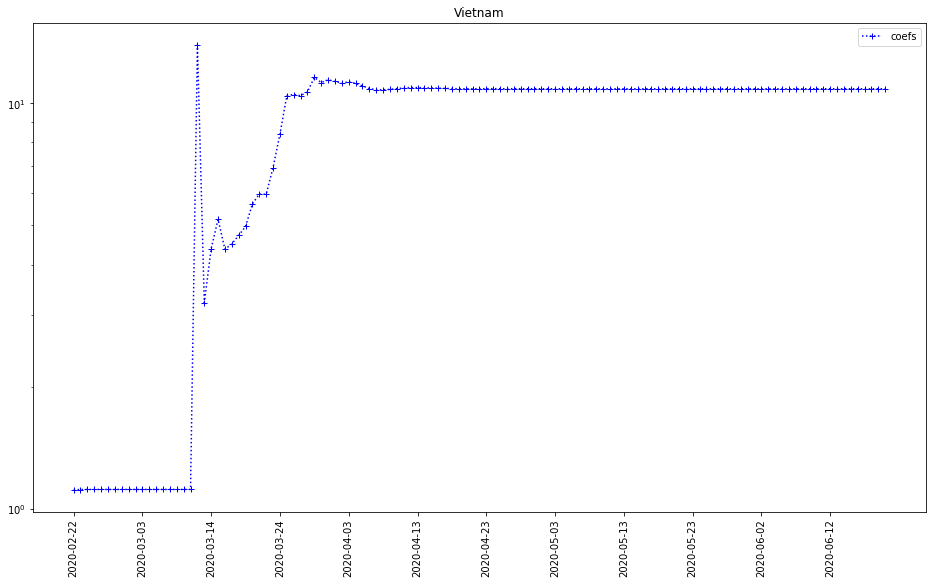

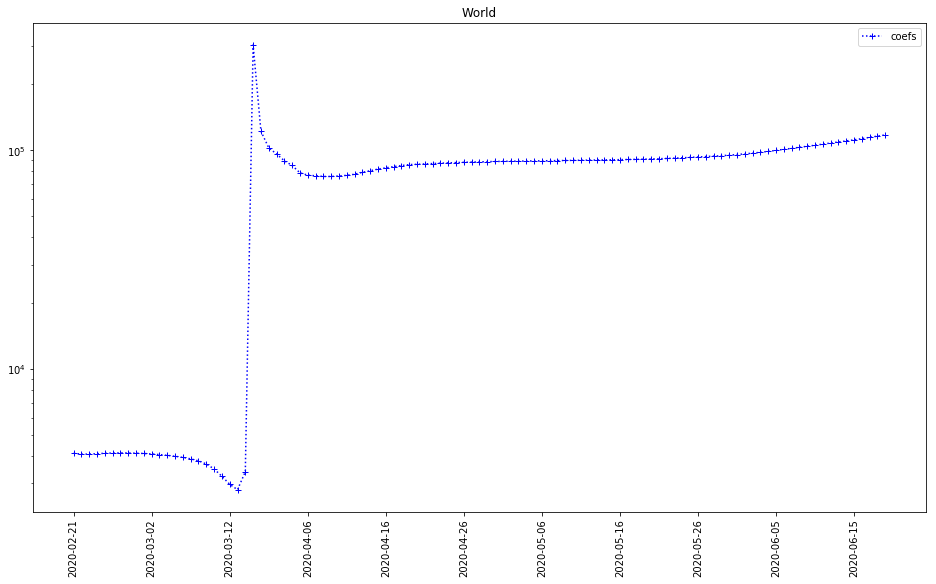

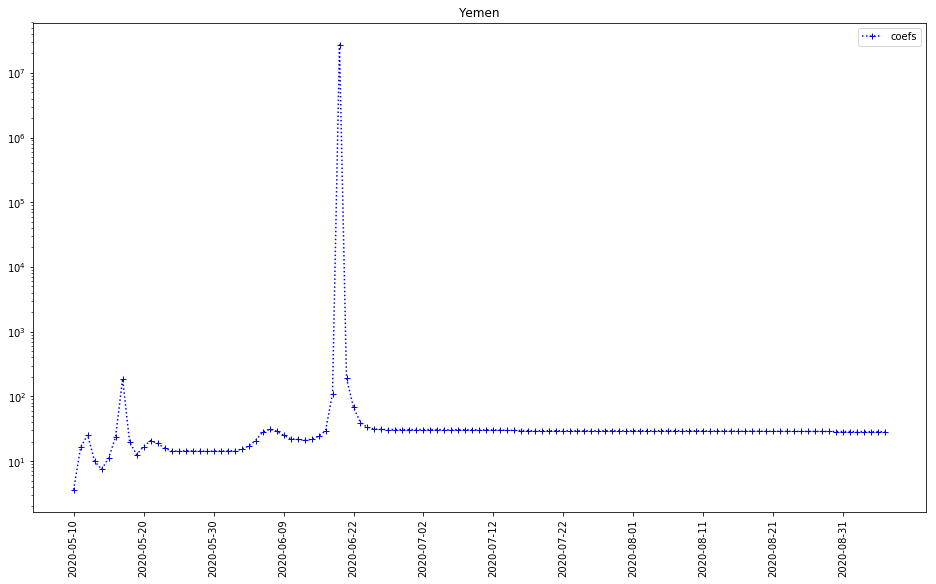

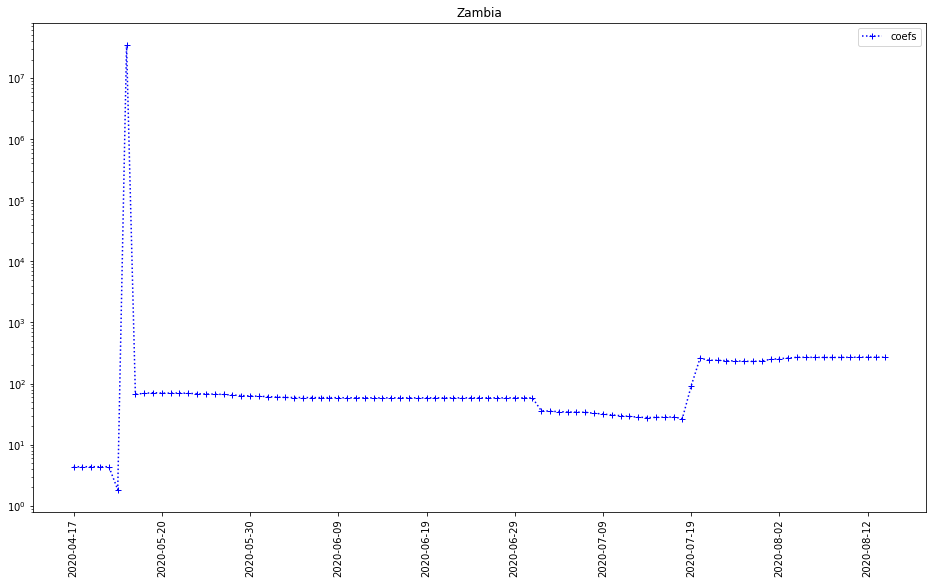

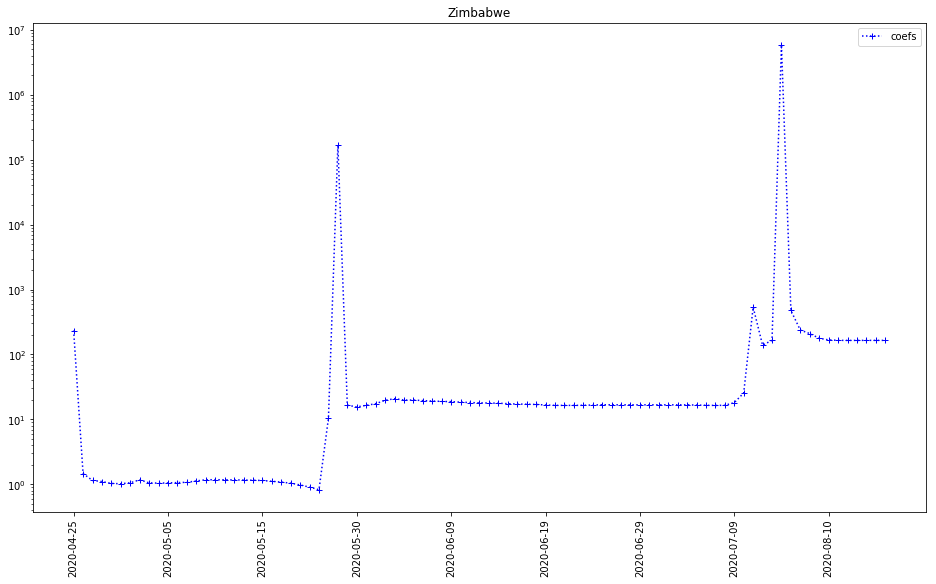

In [5]:
mundo = pd.read_csv('mundo.csv',sep=',')
mundo.fillna(0,inplace=True)
paises = mundo['location'].unique()
#paises = paises[-53:]
#paises = ['United States']
inicio = 30
fim=150

def gauss(x,a,b,c):
    return  a * np.exp(-(x - b) ** 2 / (2 * c ** 2))


for pais in paises:
    print(pais)
    
    dados = mundo[mundo['location']==pais]

    media = dados['new_cases'].rolling(7).mean()
    media[:6] = dados['new_cases'].values[:6]
    dataX = dados['date']
    x = ar(range(len(media)))
    y = ar(media.values)
    

    coefs = []
    difs = []

    datas = []
    for f in range(inicio,fim):
        try:
            treinoX = x[:f]
            treinoY = y[:f]
            #print(treinoY)
            popt,pcov = curve_fit(gauss,treinoX,treinoY,[1, 1, 100], maxfev=5000)
            #print('fff')
            datas.append(dataX.values[f])
            coefs.append(popt[0])
            #print(f,len(coefs),len(datas))
            if(len(difs) > 0):
                difs.append(abs(popt[0]-coefs[-2]))
            else:
                difs.append(popt[0])
        except:
            #print('ERRO2')
            pass
    #print(len(coefs),len(datas))
    datas = ar(datas)
    fig = plt.figure(figsize=(16,9))
    plt.plot(datas,coefs,'b+:',label='coefs')
    plt.yscale('log')
    plt.title(pais)
    idx = list(range(0,len(datas),10))
    print(idx)
    plt.xticks(datas[idx], datas[idx], rotation='vertical')
    #plt.hlines(1000,0,fim-inicio)
    plt.legend()

    try:
        plt.savefig('graficos/'+pais+'.png')
    except:
        print('ERRO:',pais)
        pass


In [17]:
mundo = pd.read_csv('mundo.csv',sep=',')
mundo.fillna(0,inplace=True)
paises = mundo['location'].unique()
paises = paises[30:]
#paises = ['United States']
inicio = 30
fim=150

def gauss(x,a,b,c):
    return  a * np.exp(-(x - b) ** 2 / (2 * c ** 2))


for pais in paises:
    print(pais)
    
    dados = mundo[mundo['location']==pais]

    media = dados['new_cases'].rolling(7).mean()
    media[:6] = dados['new_cases'].values[:6]
    dataX = dados['date']
    x = ar(range(len(media)))
    y = ar(media.values)
    

    coefs = []
    difs = []
    datas = []
    for f in range(inicio,fim):
        try:
            treinoX = x[f-30:f]
            treinoY = y[f-30:f]
            model = LinearRegression()
            model.fit(treinoX.reshape(-1, 1), treinoY)
            datas.append(dataX.values[f])
            coefs.append(model.coef_[0])
            if(len(difs) > 0):
                difs.append(abs(model.coef_[0]-coefs[-2]))
            else:
                difs.append(0)
        except:
            #print('ERRO2')
            pass
    #print(len(coefs),len(datas))
    datas = ar(datas)
    fig = plt.figure(figsize=(16,9))
    plt.plot(datas,difs,'b+:',label='coefs')
    plt.title(pais)
    idx = list(range(0,len(datas),10))
    #print(idx)
    plt.xticks(datas[idx], datas[idx], rotation='vertical')
    #plt.hlines(1000,0,fim-inicio)
    plt.legend()

    try:
        plt.savefig('linear/'+pais+'.png')
    except:
        print('ERRO:',pais)
        pass
    
    fig.clf()
    plt.close()
    

Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Europe
European Union
Faeroe Islands
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guatemala
Guernsey
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
International
Iran
Iraq
Ireland
Isle of Man
Israel
Italy
Jamaica
Japan
Jersey
Jordan
Kazakhstan
Kenya
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Marshall Islands
Mauritania
Mauritius
Mexico
Micronesia (country)
Moldova
Monaco
Mongolia
Montenegro
Morocco
Mozambique
Myanmar
Namibia
Nepal
Netherlands
New Zealand
Nicaragua


In [33]:
mundo = pd.read_csv('mundo.csv',sep=',')
mundo.fillna(0,inplace=True)
paises = mundo['location'].unique()
#paises = paises[-53:]
#paises = ['United States']

for pais in paises:
    print(pais)
    
    dados = mundo[mundo['location']==pais]
    media = dados['new_cases'].rolling(7).mean()
    media[:6] = dados['new_cases'].values[:6]
    dataX = dados['date'].reset_index(drop=True)
    y = media.values
    fig = plt.figure(figsize=(16,9))
    plt.plot(dataX,y,label='Novos Casos')
    plt.title(pais)
    idx = list(range(0,len(dataX),10))
    
    plt.xticks(dataX[idx], dataX[idx], rotation='vertical')
    plt.legend()

    try:
        plt.savefig('curva/'+pais+'.png')
    except:
        print('ERRO:',pais)
        pass
    
    fig.clf()
    plt.close()
    

Afghanistan
Africa
Albania
Algeria
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Asia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Europe
European Union
Faeroe Islands
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guatemala
Guernsey
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
International
Iran
Iraq
Ireland
Isle of Man
Israel
Italy
Jamaica
Japan
Jersey
Jordan
Kazakhstan
Kenya
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesoth

In [189]:
paises

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Europe', 'European Union', 'Faeroe Islands', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambi